# Predictive Modeling for Insurance Claim Probability based on Comprehensive Car Policy Features and Safety Ratings

PROBLEM STATEMENT---
    Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

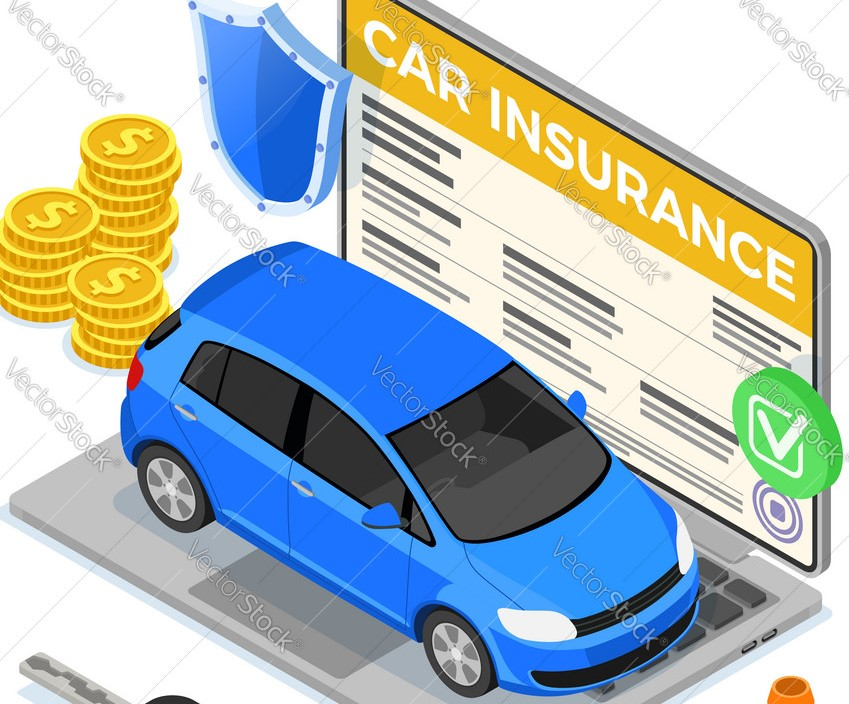

import os 
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import string
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

import imblearn
from sklearn.svm import SVC
import math
import scipy 
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc, roc_auc_score, classification_report, confusion_matrix

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import string
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

import imblearn
from sklearn.svm import SVC
import math
import scipy 
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc, roc_auc_score, classification_report, confusion_matrix

In [2]:
car=pd.read_csv("Insurance_Data (1).csv")

In [3]:
car_in=car.copy()

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
car_in.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

In [6]:
car_in=car_in.drop(['policy_id'],axis=1)

Descriptive Statistics on Car Insurance Dataset---NUMERICAL COLUMNS

In [7]:
car_in.describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
is_claim                0.000000     0.000000      0.000000      1.000000

In [8]:
car_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

Checking for Duplicate Values---

In [9]:
print('No of Duplicated Rows ==',car_in.duplicated().sum())

No of Duplicated Rows == 0


In [10]:
car_in.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

listing only Numerical Columns and categorical variables

In [11]:
categorical = car_in.select_dtypes(include ="object")
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)
print("****"*30)
#numerical features
numerical= car_in.select_dtypes(include =("float64","int64"))
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 27
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
************************************************************************************************************************
Numerical Features in DataSet: 16
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',


Univariate Analysis on numerical columns:

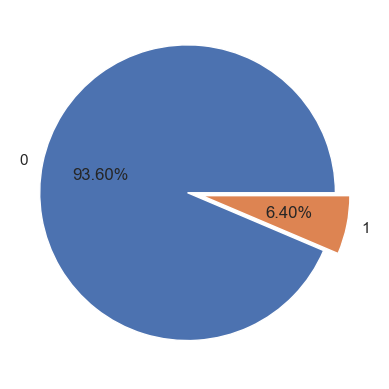

In [12]:
plt.pie(car_in['is_claim'].value_counts(),labels = car_in['is_claim'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

In [13]:
def num_dist(column,target='is_claim'):
    plt.figure(figsize=(12,4))
    #plt.subplot(1,3,1)
    #plt.subplot(5,4,6)
    sns.histplot(data=car_in,x=column,kde=True,hue=target,palette='Set2')
    plt.show()

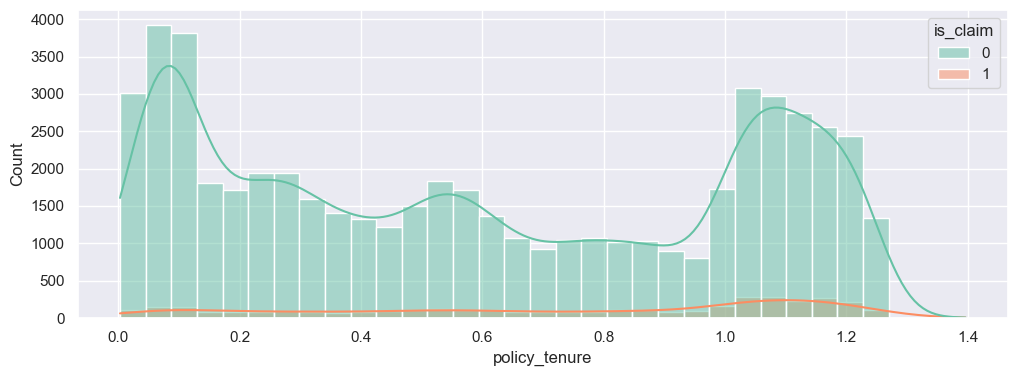

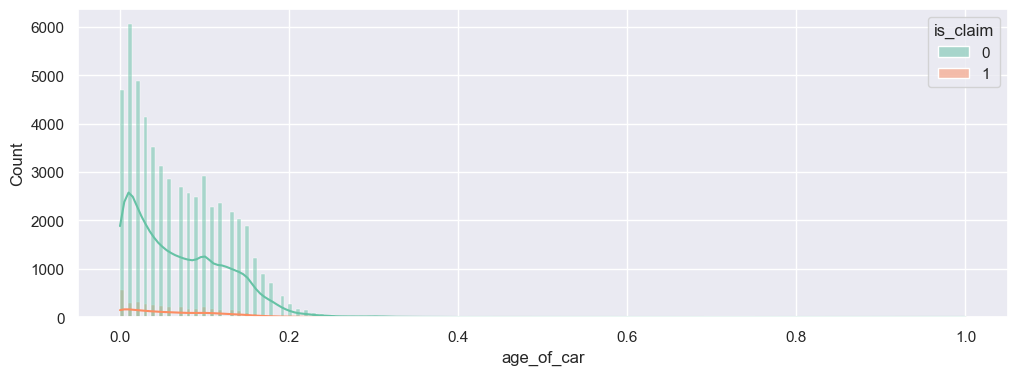

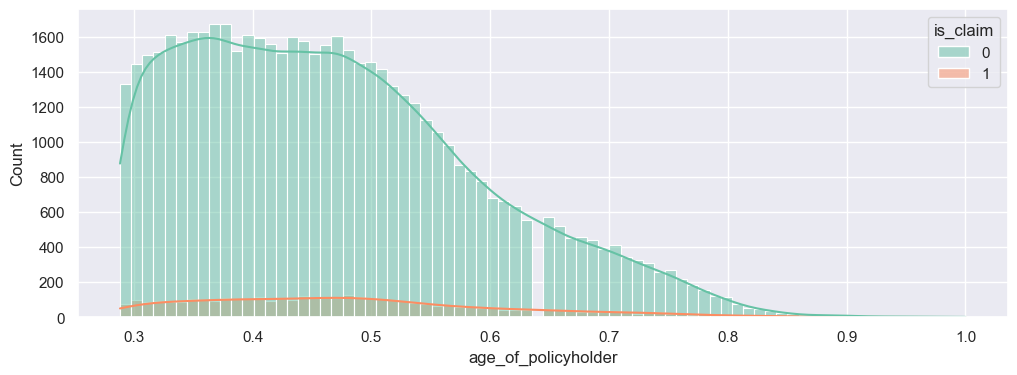

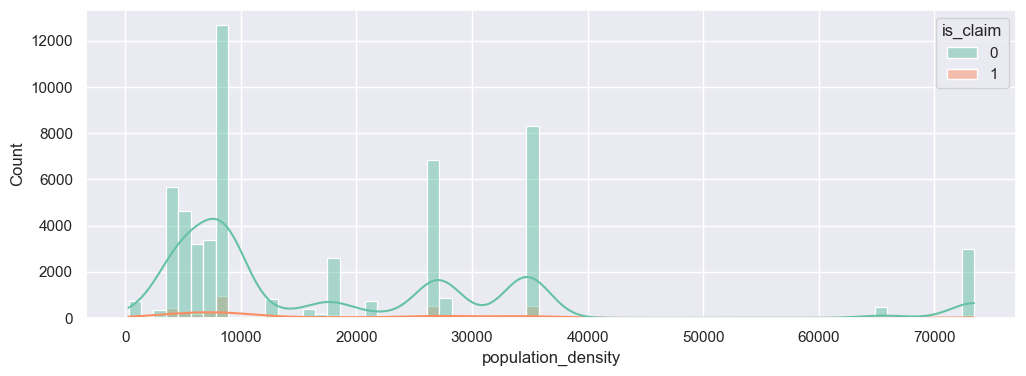

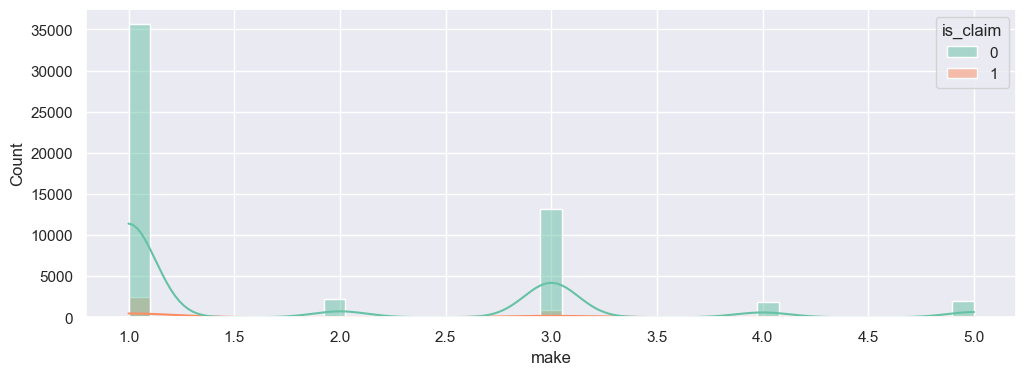

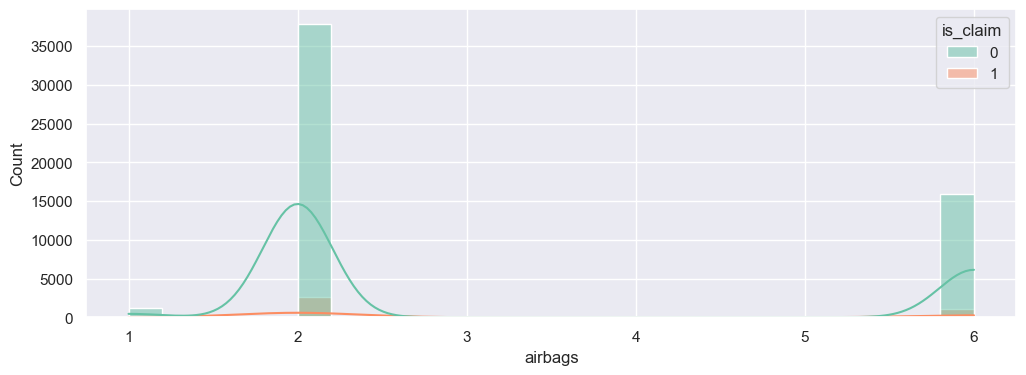

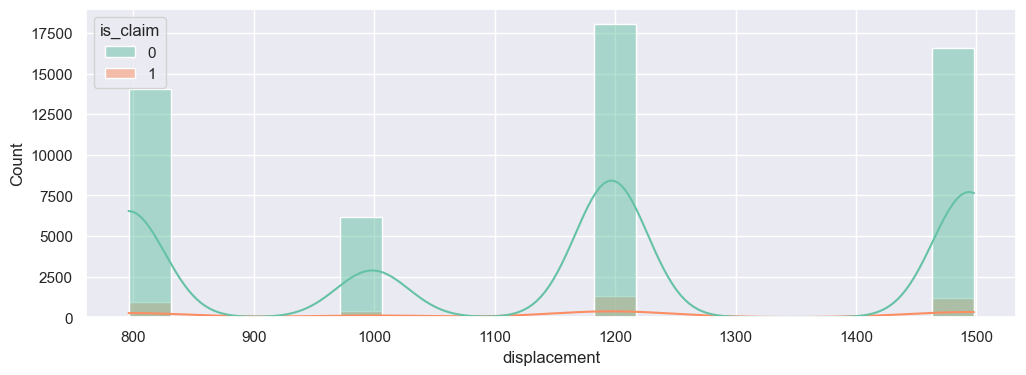

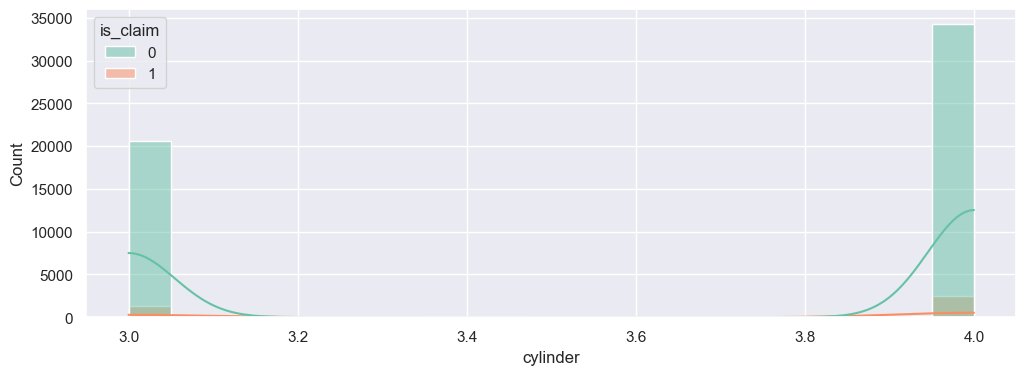

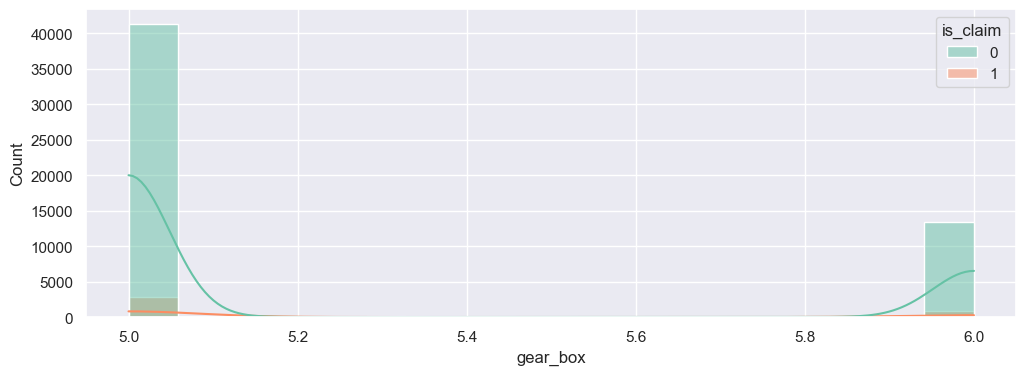

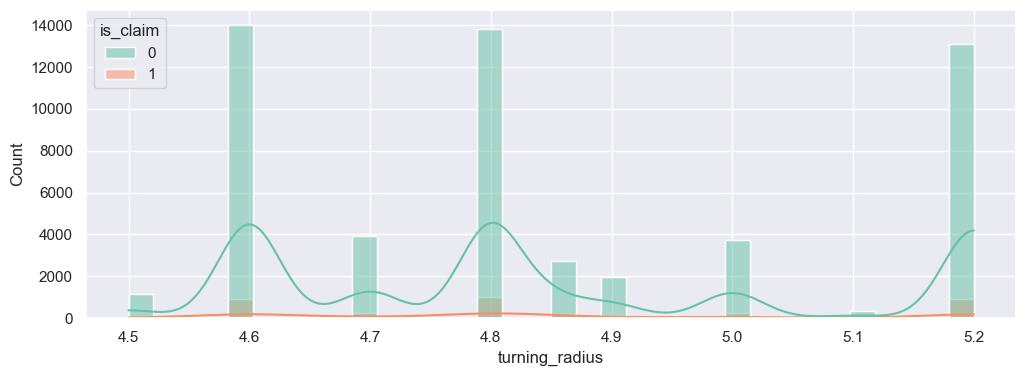

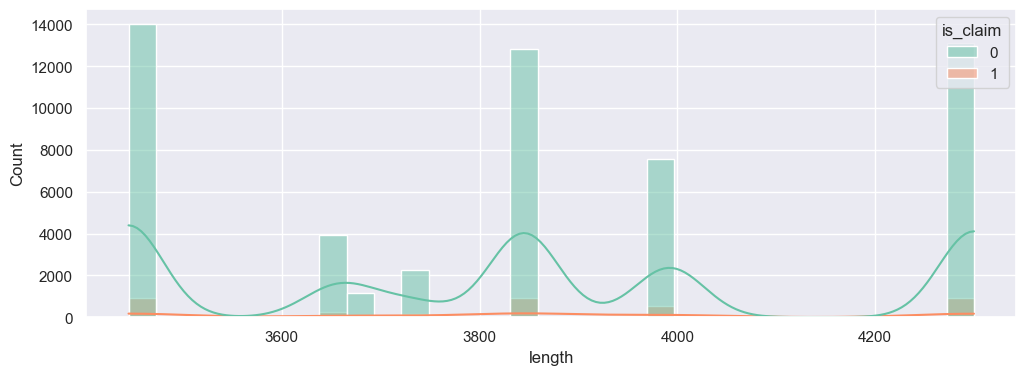

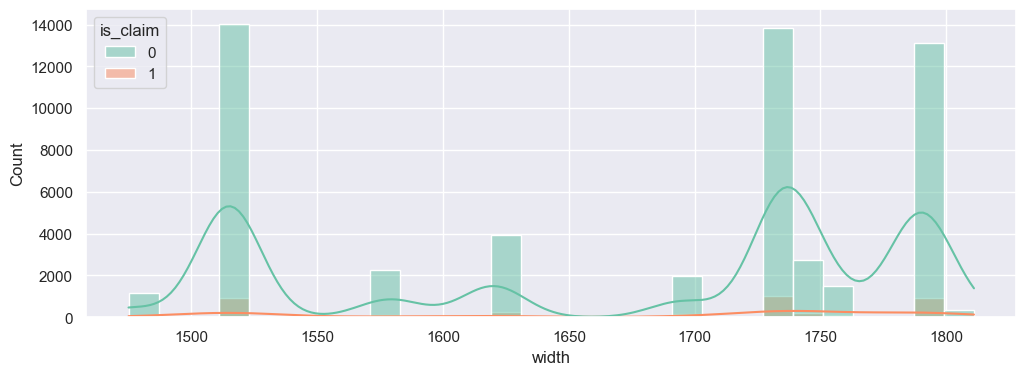

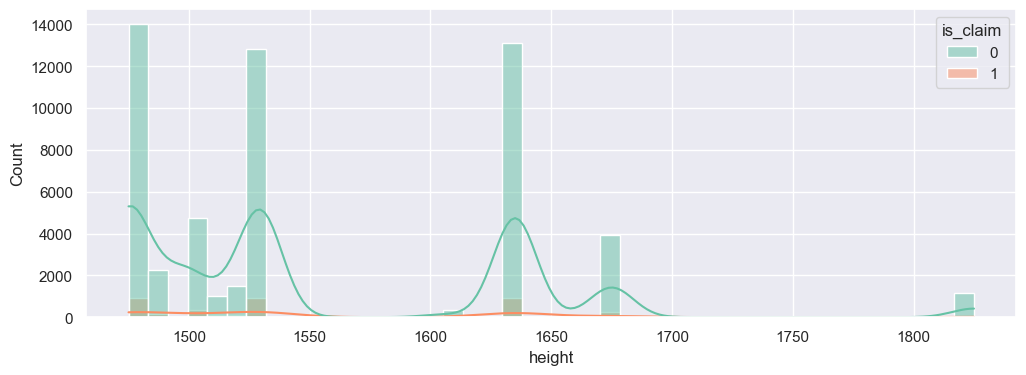

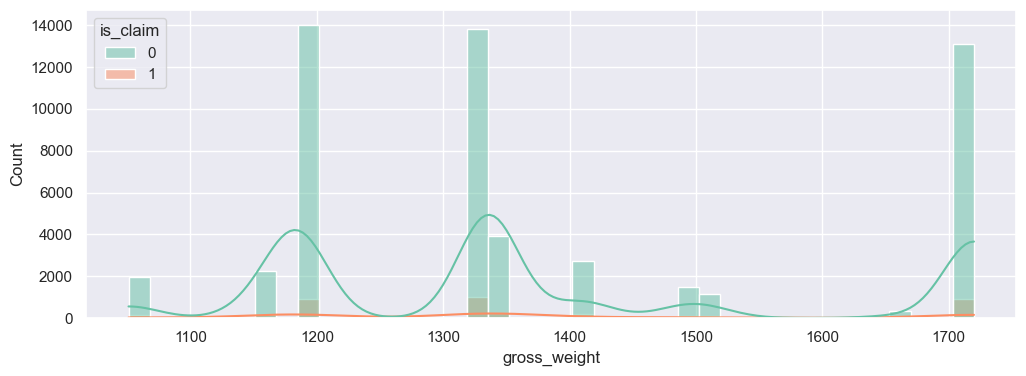

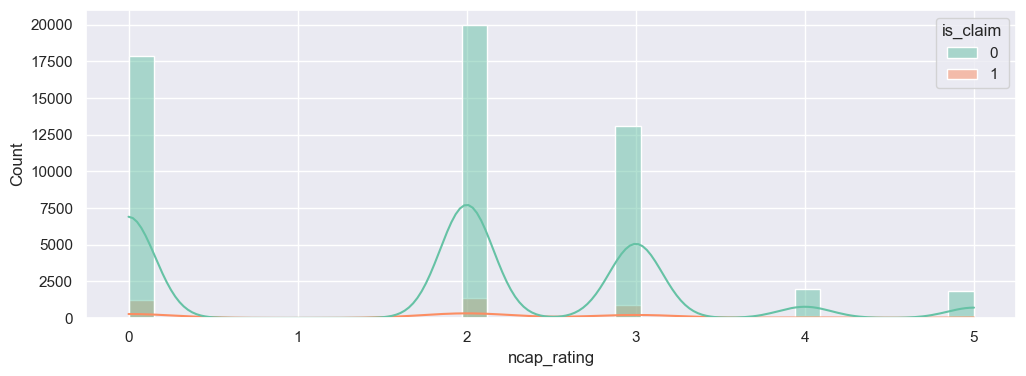

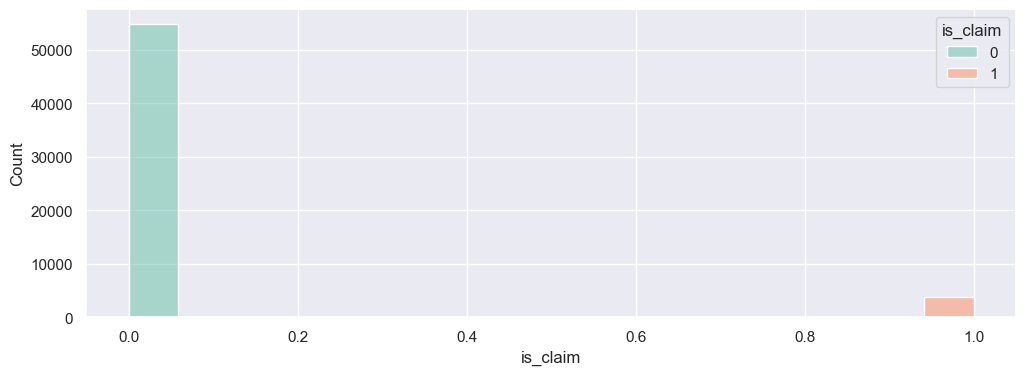

In [14]:
for col in numerical:
    num_dist(col)

Univariate Analysis on Categorical Values---

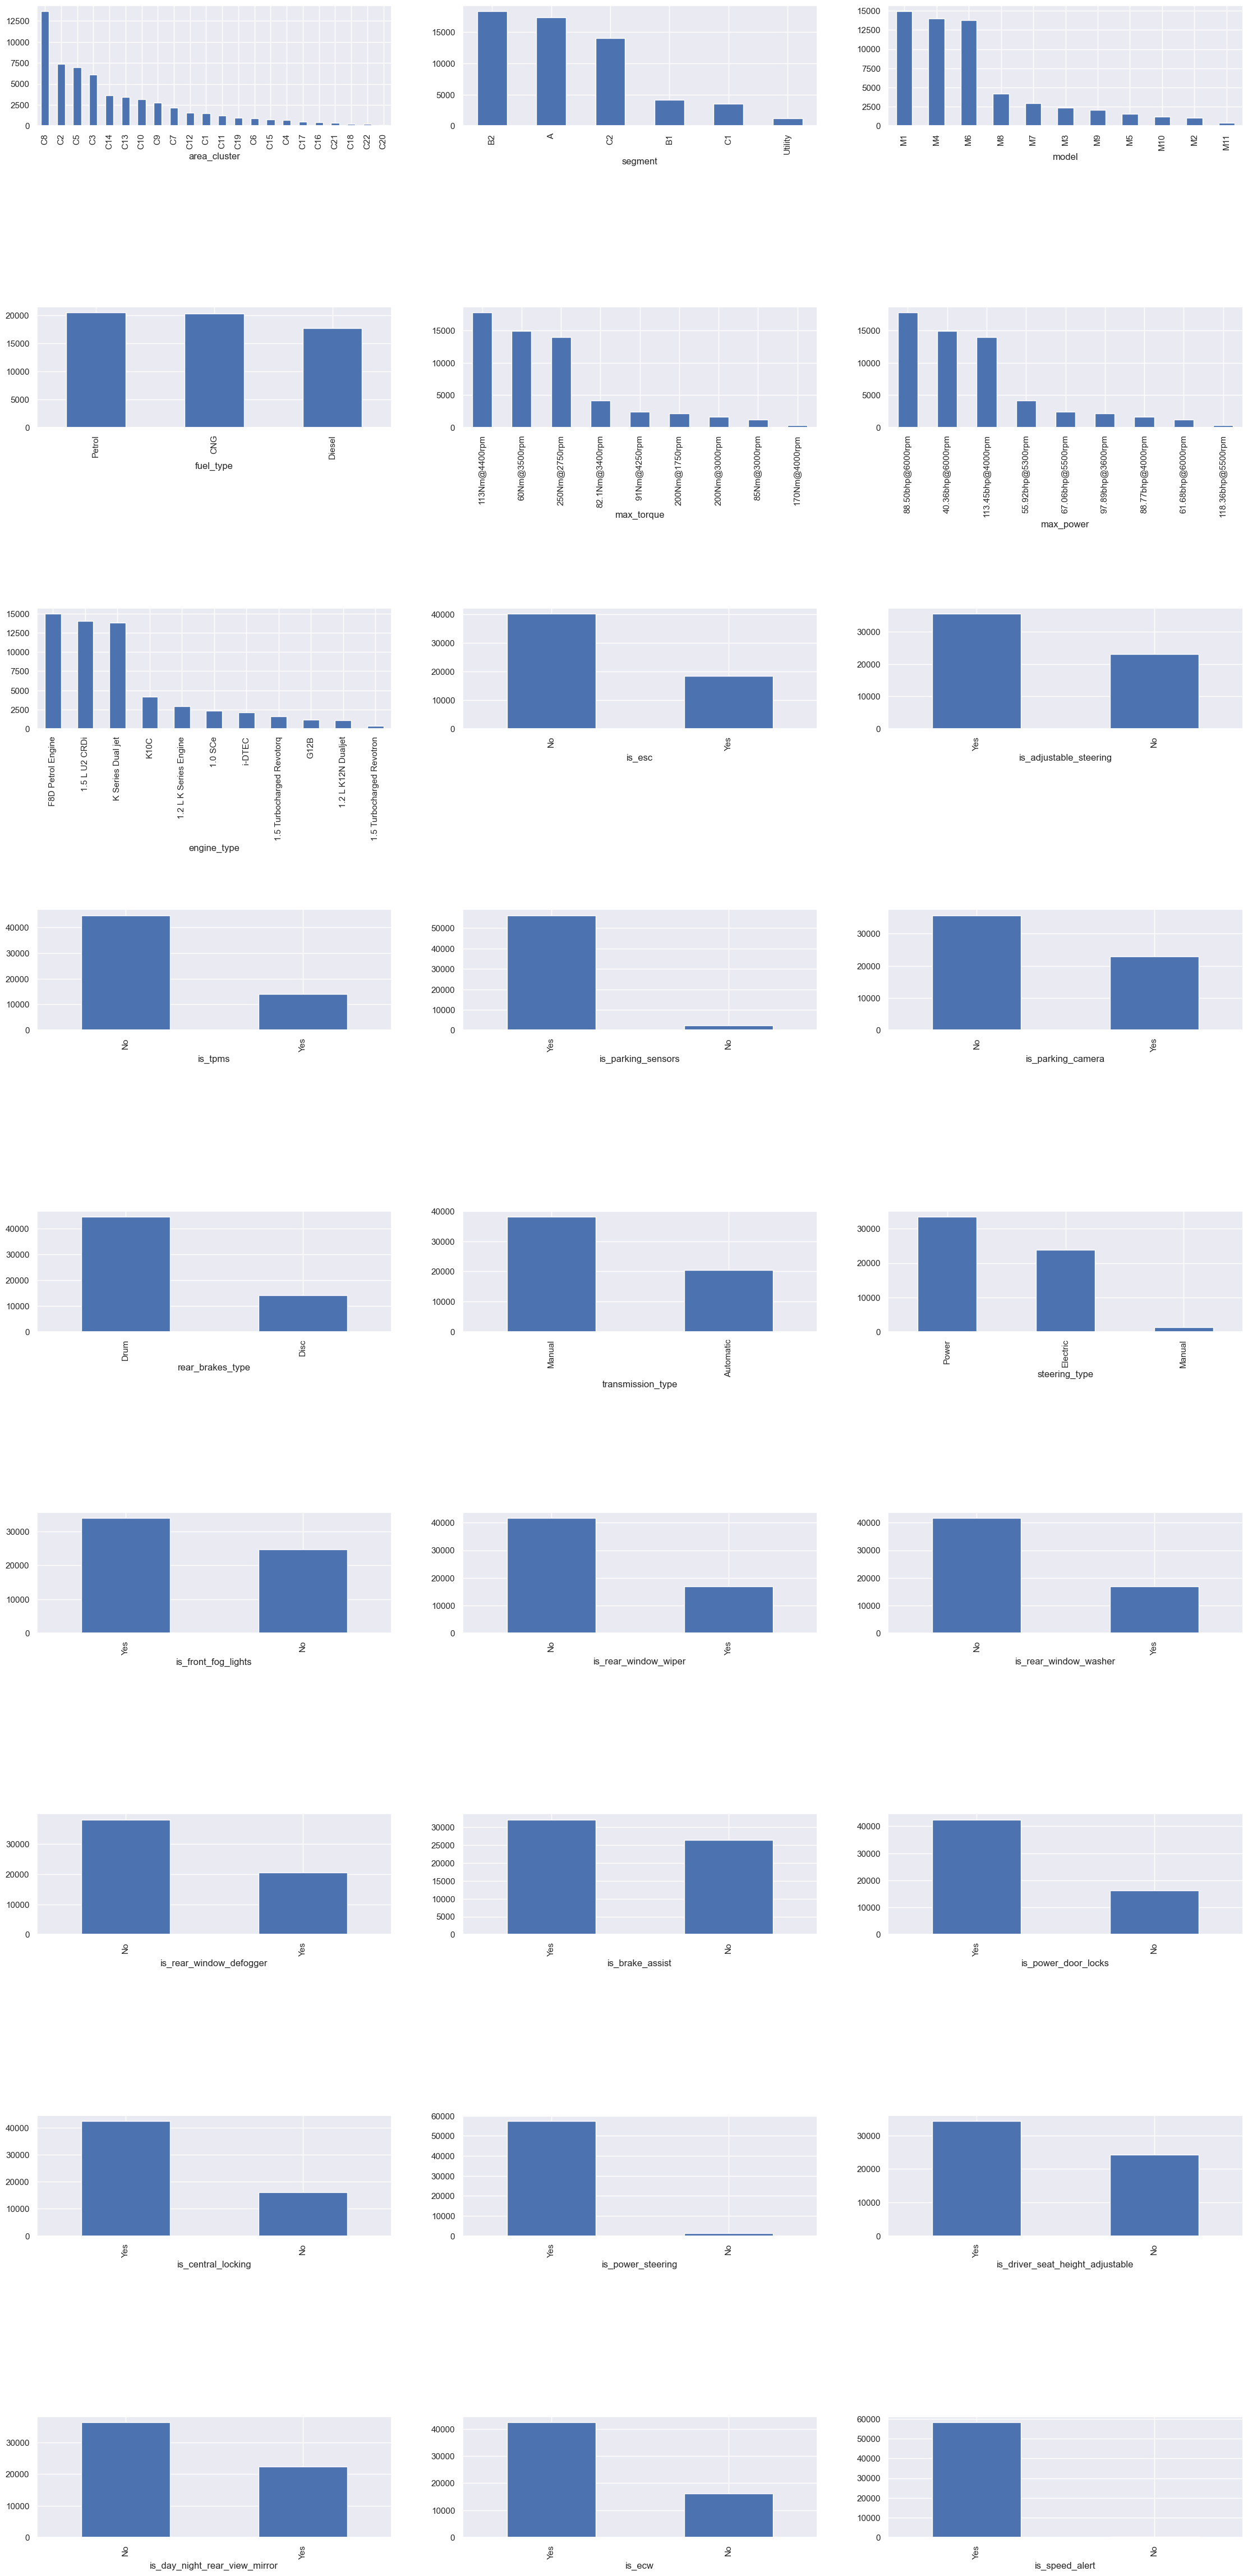

In [15]:
plt.figure(figsize=(20,8))
row = 14
col=3
iterator=1
for i in  categorical.columns:
    plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.5)
    plt.subplot(row,col,iterator)
   
    car_in[i].value_counts().plot(kind='bar' )
    #plt.title(f'{column.title()}',weight='bold')
    #plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
#car_in[i].value_counts()
plt.show()

Checking Outlier on numerical----

In [16]:
numerical.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [17]:
number=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim']

In [18]:
list(enumerate(number))

[(0, 'policy_tenure'),
 (1, 'age_of_car'),
 (2, 'age_of_policyholder'),
 (3, 'population_density'),
 (4, 'make'),
 (5, 'airbags'),
 (6, 'displacement'),
 (7, 'cylinder'),
 (8, 'gear_box'),
 (9, 'turning_radius'),
 (10, 'length'),
 (11, 'width'),
 (12, 'height'),
 (13, 'gross_weight'),
 (14, 'ncap_rating'),
 (15, 'is_claim')]

In [19]:

def plot_boxplots_numerical(data):
    # Select only numerical columns from the DataFrame
    numerical_data = data.select_dtypes(include=['number'])

    num_cols = numerical_data.shape[1]
    num_rows = (num_cols - 1) // 3 + 1  # 3 columns per row

    fig, axes = plt.subplots(num_rows, 4, figsize=(14, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical_data.columns):
        row_idx = i // 4
        col_idx = i % 4
        ax = axes[row_idx, col_idx]
        
        sns.boxplot(x=numerical_data[column], ax=ax,palette='flare')
        ax.set_title(f'Box Plot of {column}')
        ax.set_xlabel(column)

    # Remove empty subplots
    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

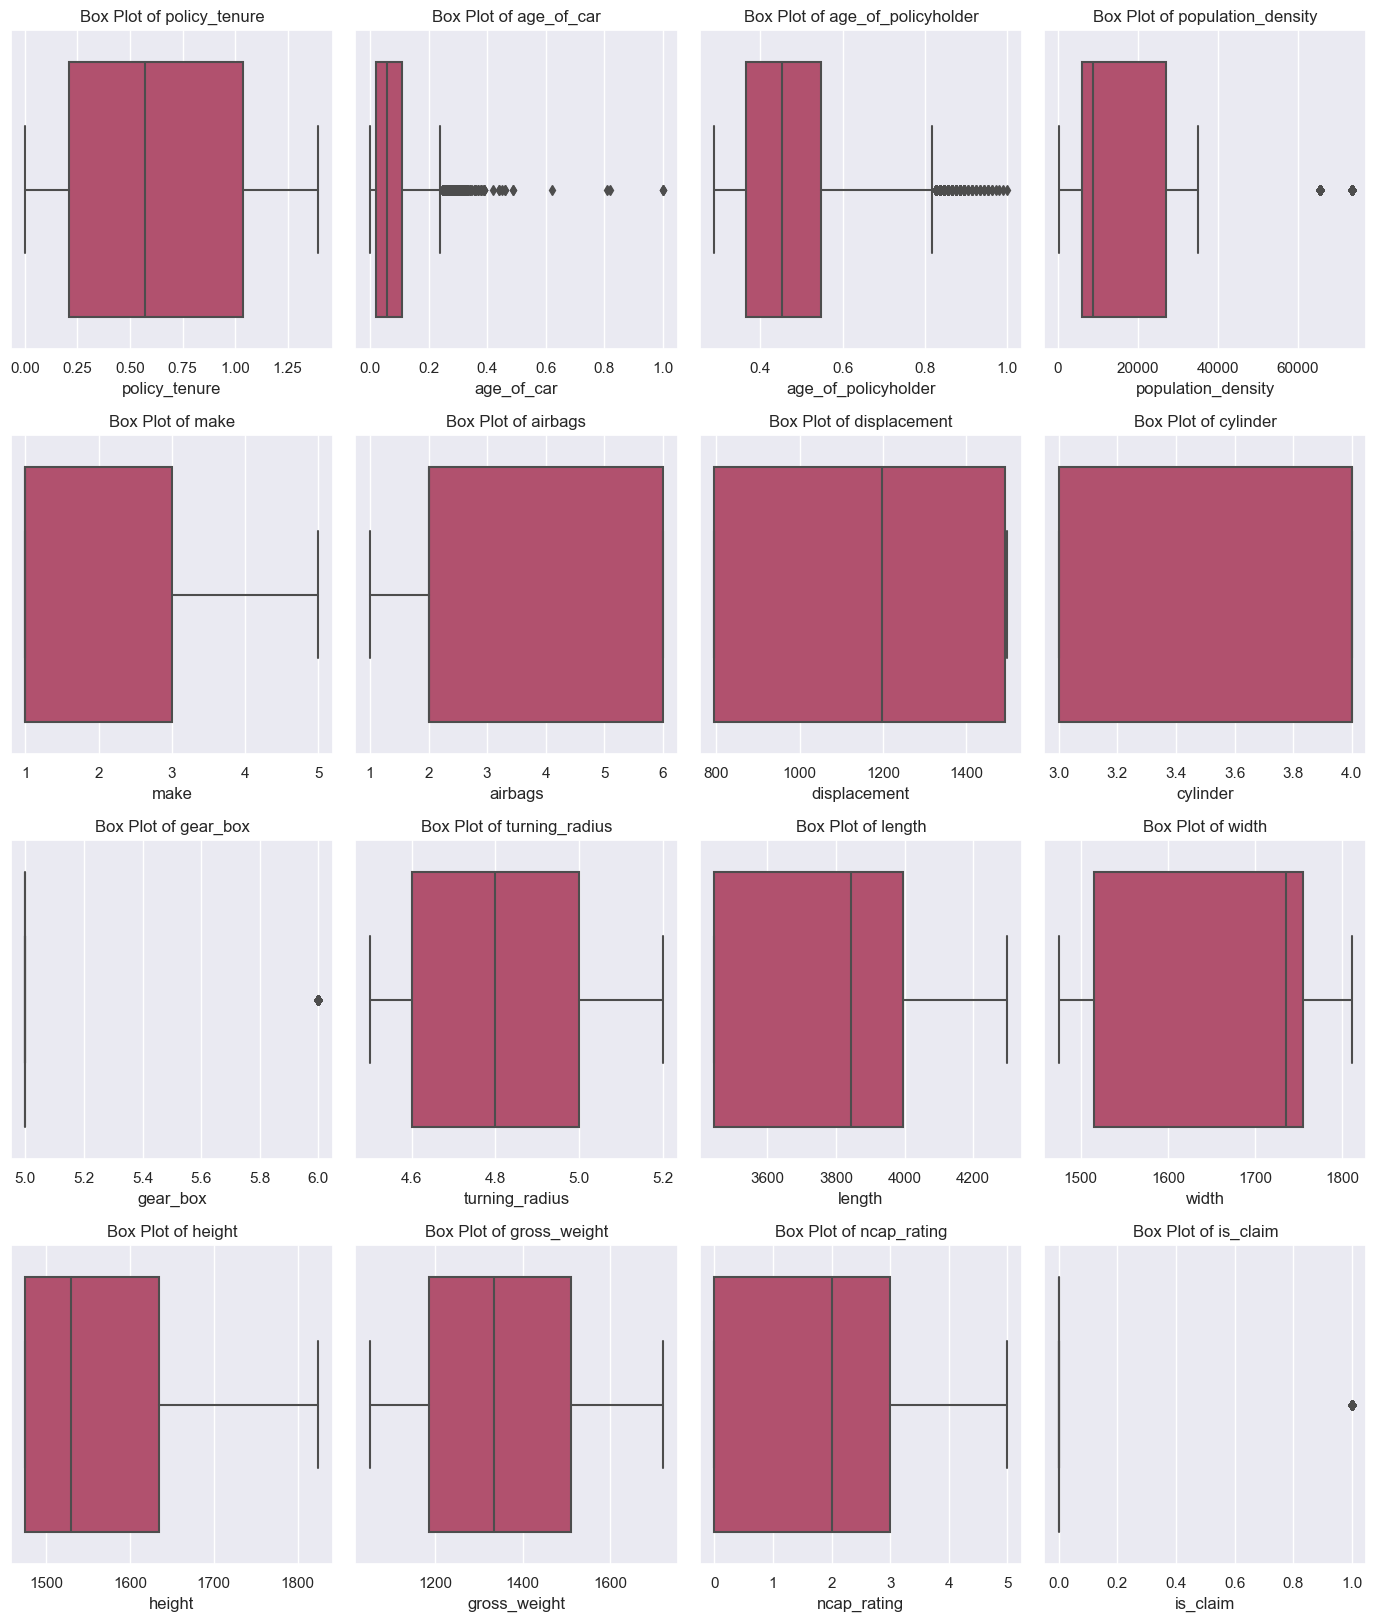

In [20]:
plot_boxplots_numerical(car_in)

In [21]:
#sns.pairplot(data=car_in,hue='is_claim',size=3)

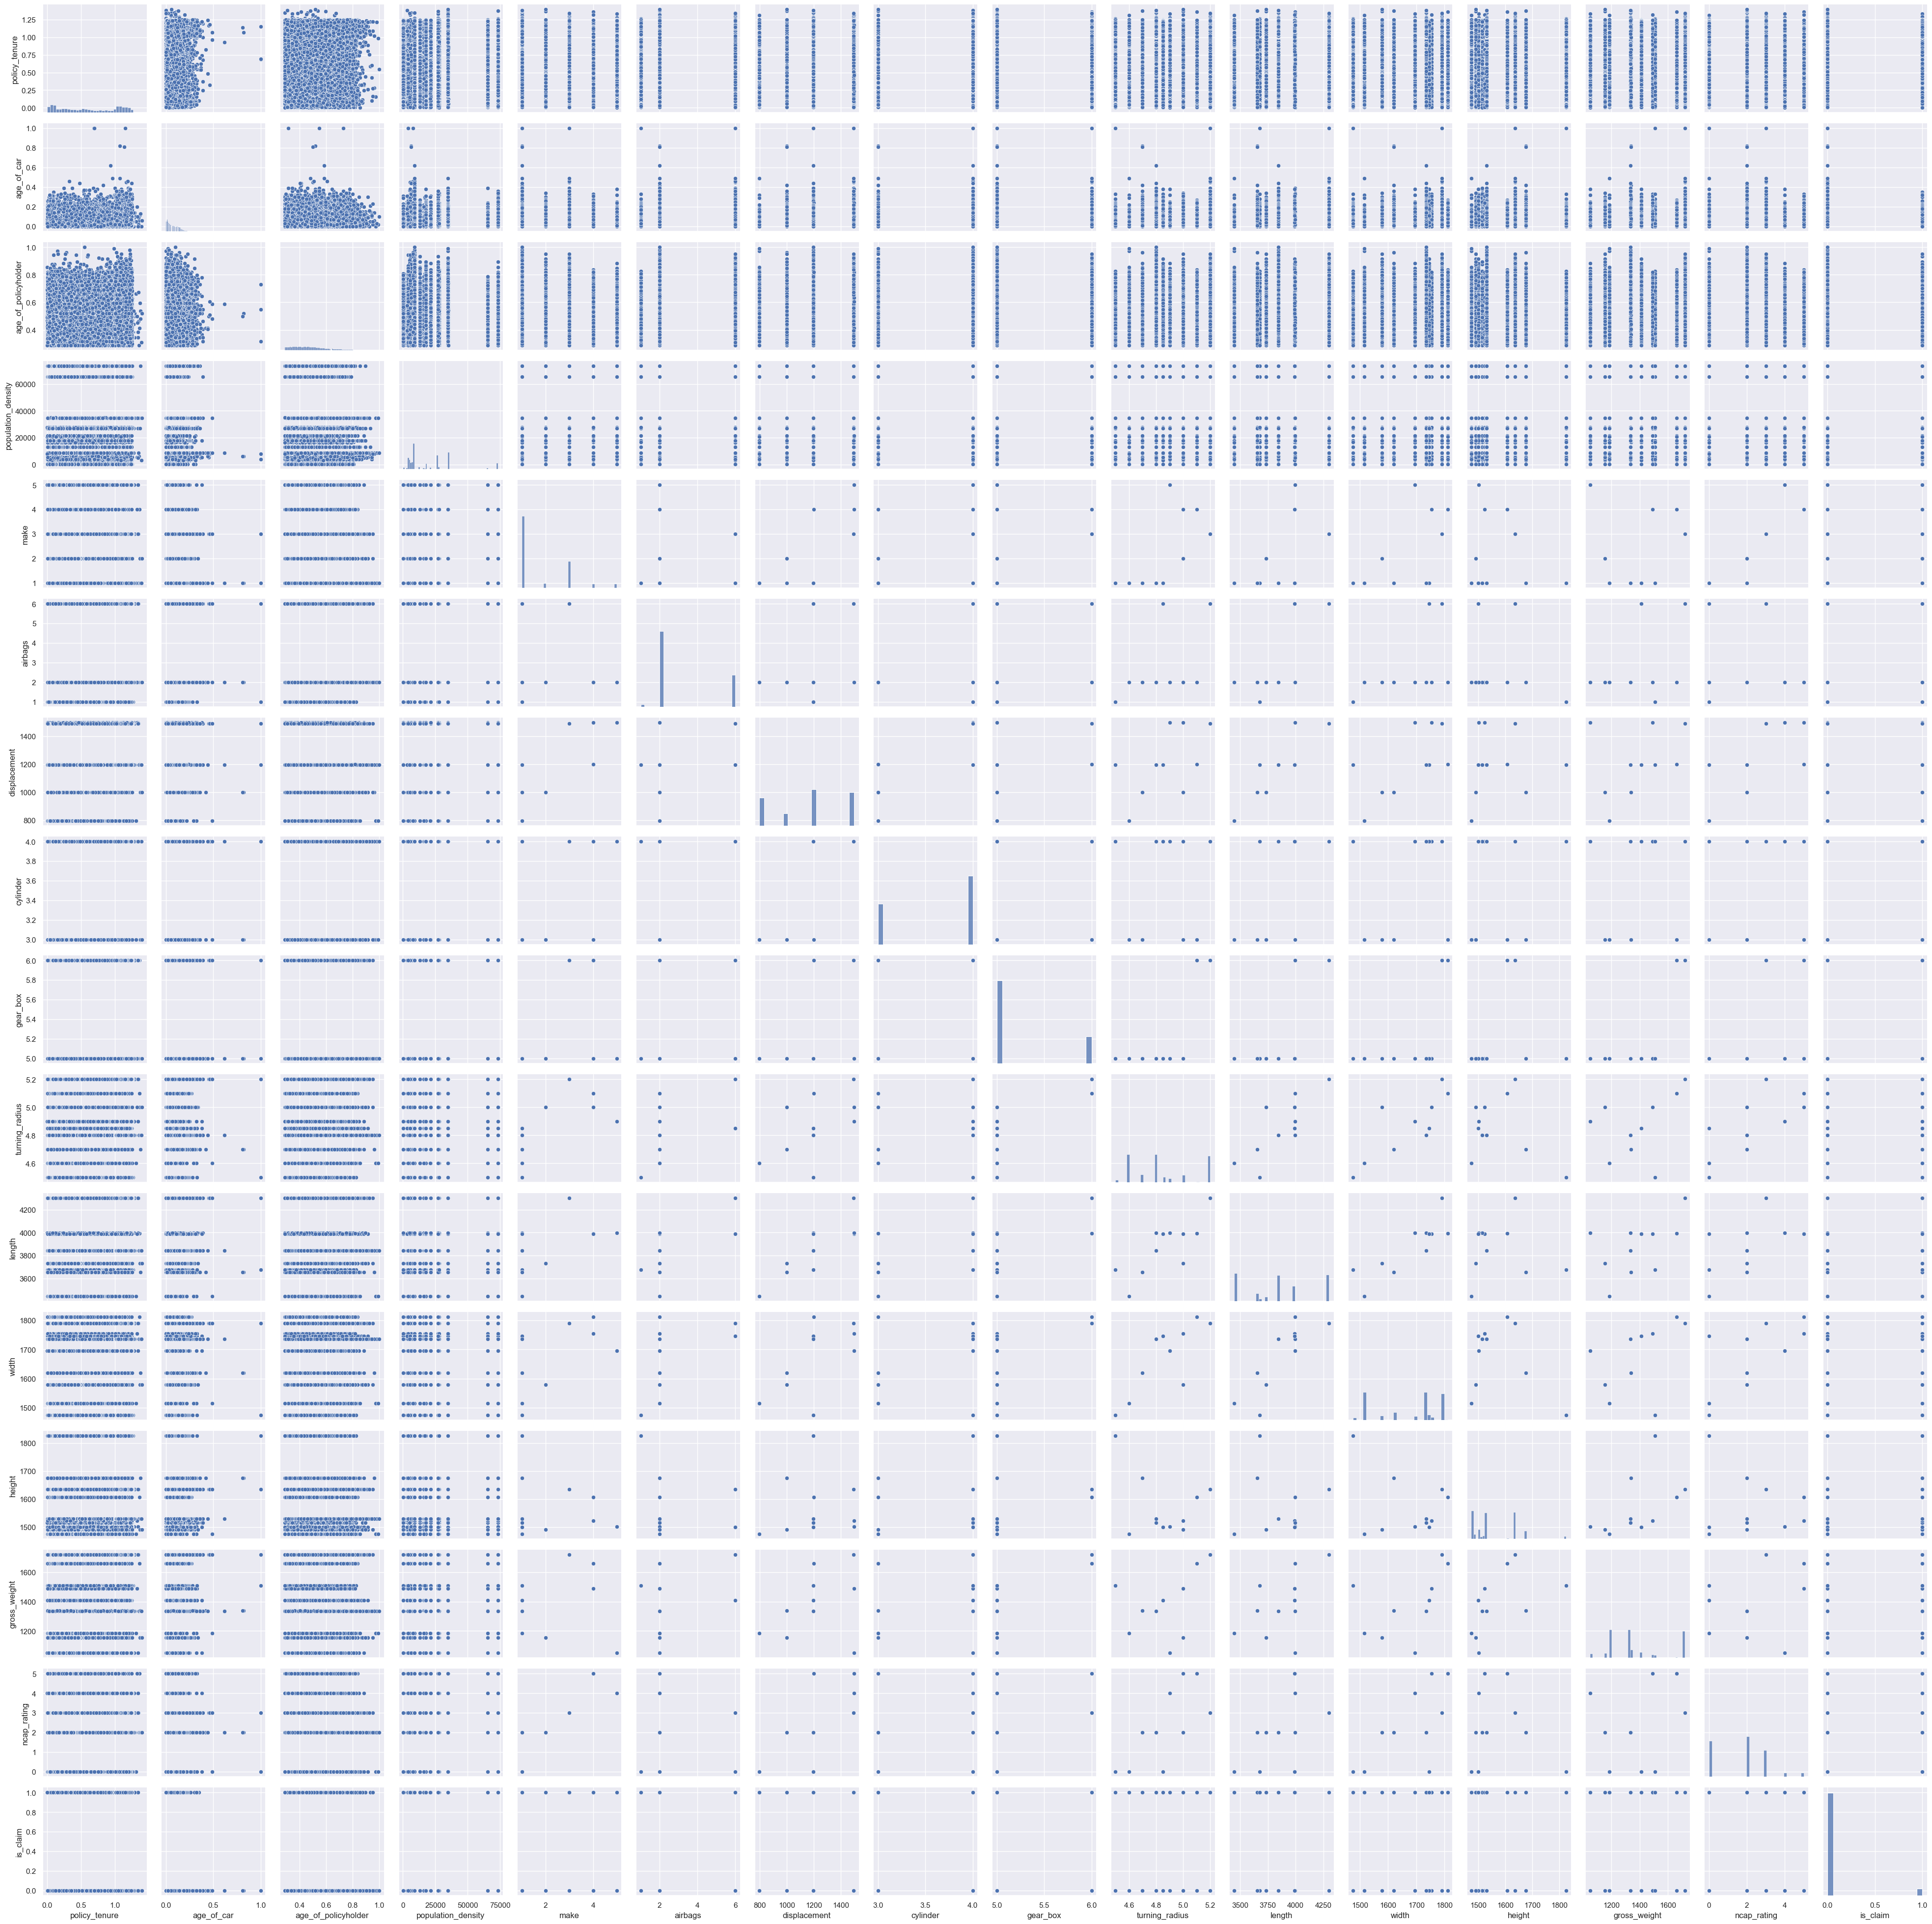

In [22]:
g = sns.PairGrid(car_in)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Insights
Most people(7000) have policy active for 0.1 years

Majority people opt for insurance immediately when they purchase a car

Most policy holders are 0.3-0.4 yrs of age

Most people prefer 'make 1' car followed by 'make 3' and least preferred is '2' '4' and '5'

No. of airbags in most cars is '2'(40k+) while 2nd most popular choice is '6' (17k approx)

'1' airbag is present in almost 1000 cars while no car has '3' ,'4' or '5' airbags.

Most cars have ncap rating of '2' (20k+) followed by rating '0' (approx 19k)

Safer cars with rating '4' and '5' are least (<2.5k both)

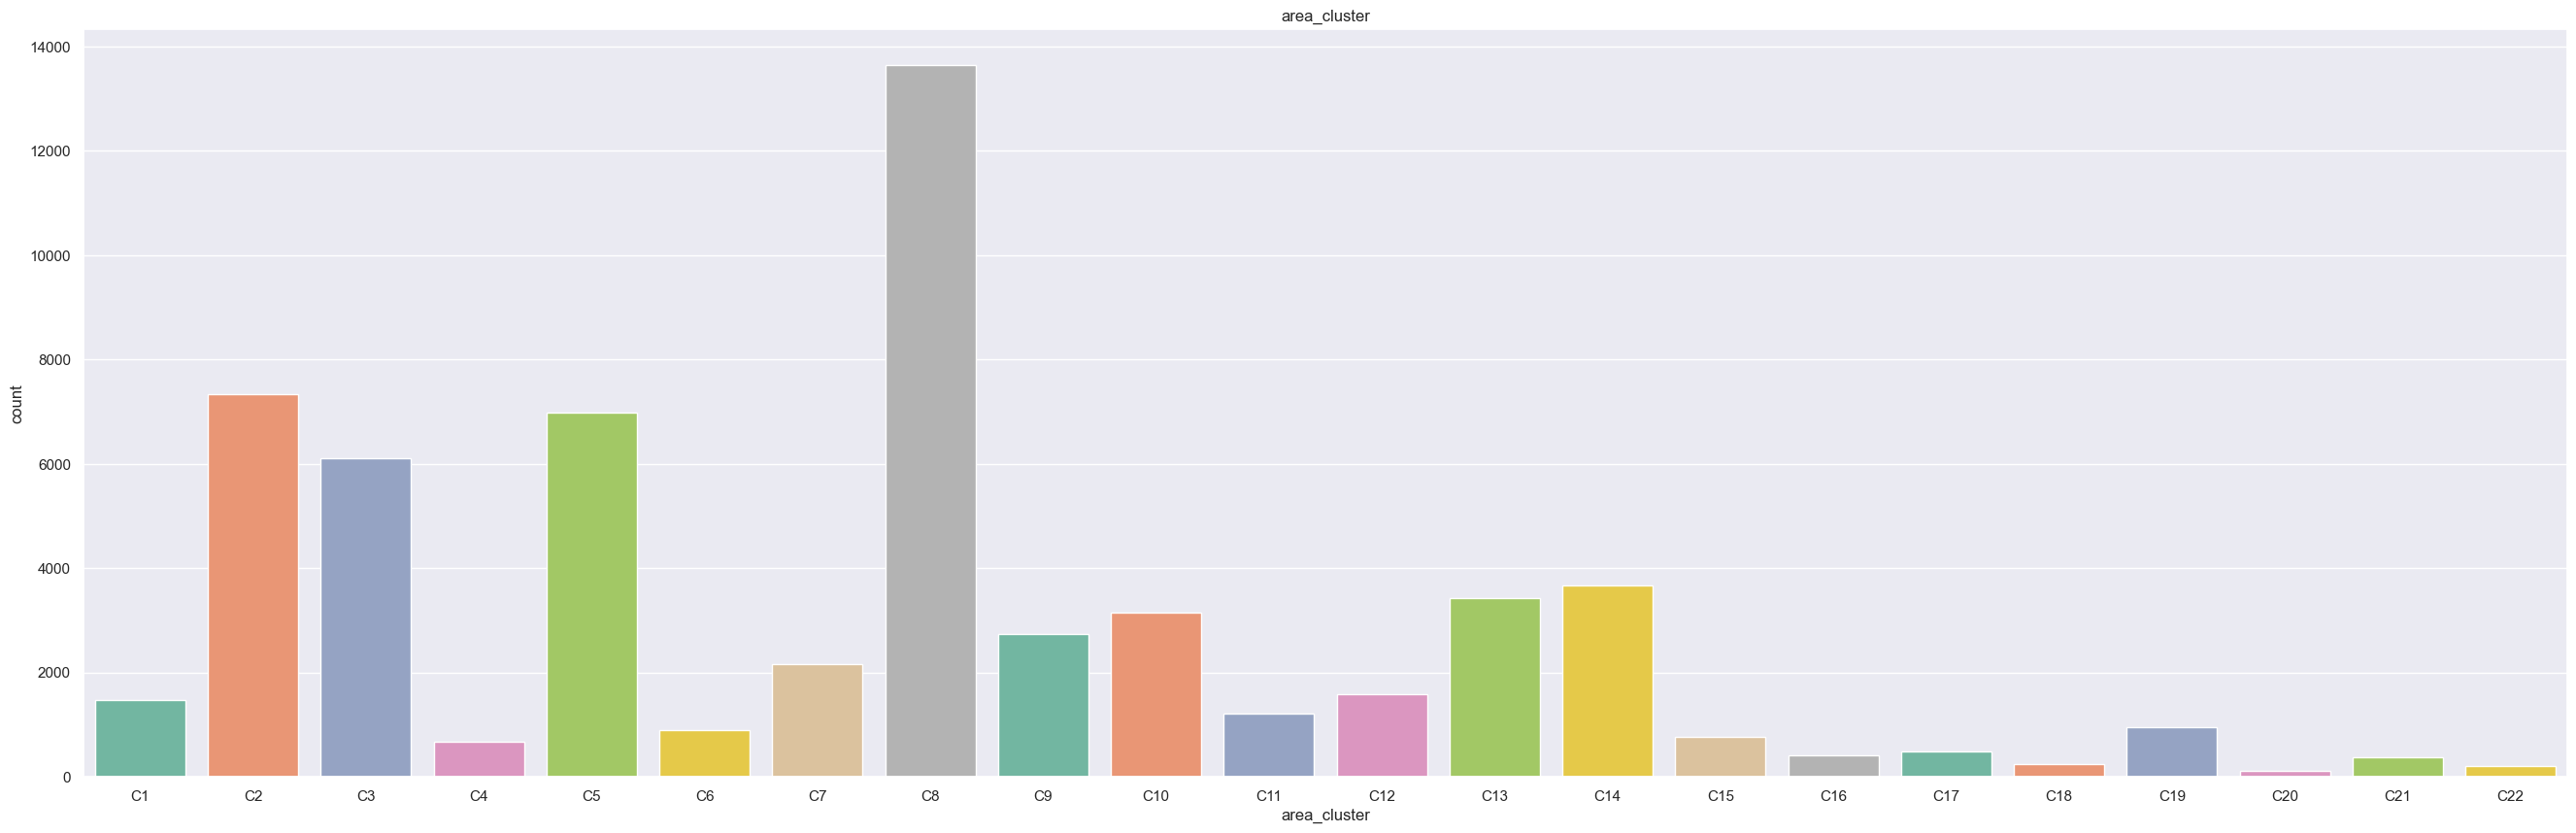

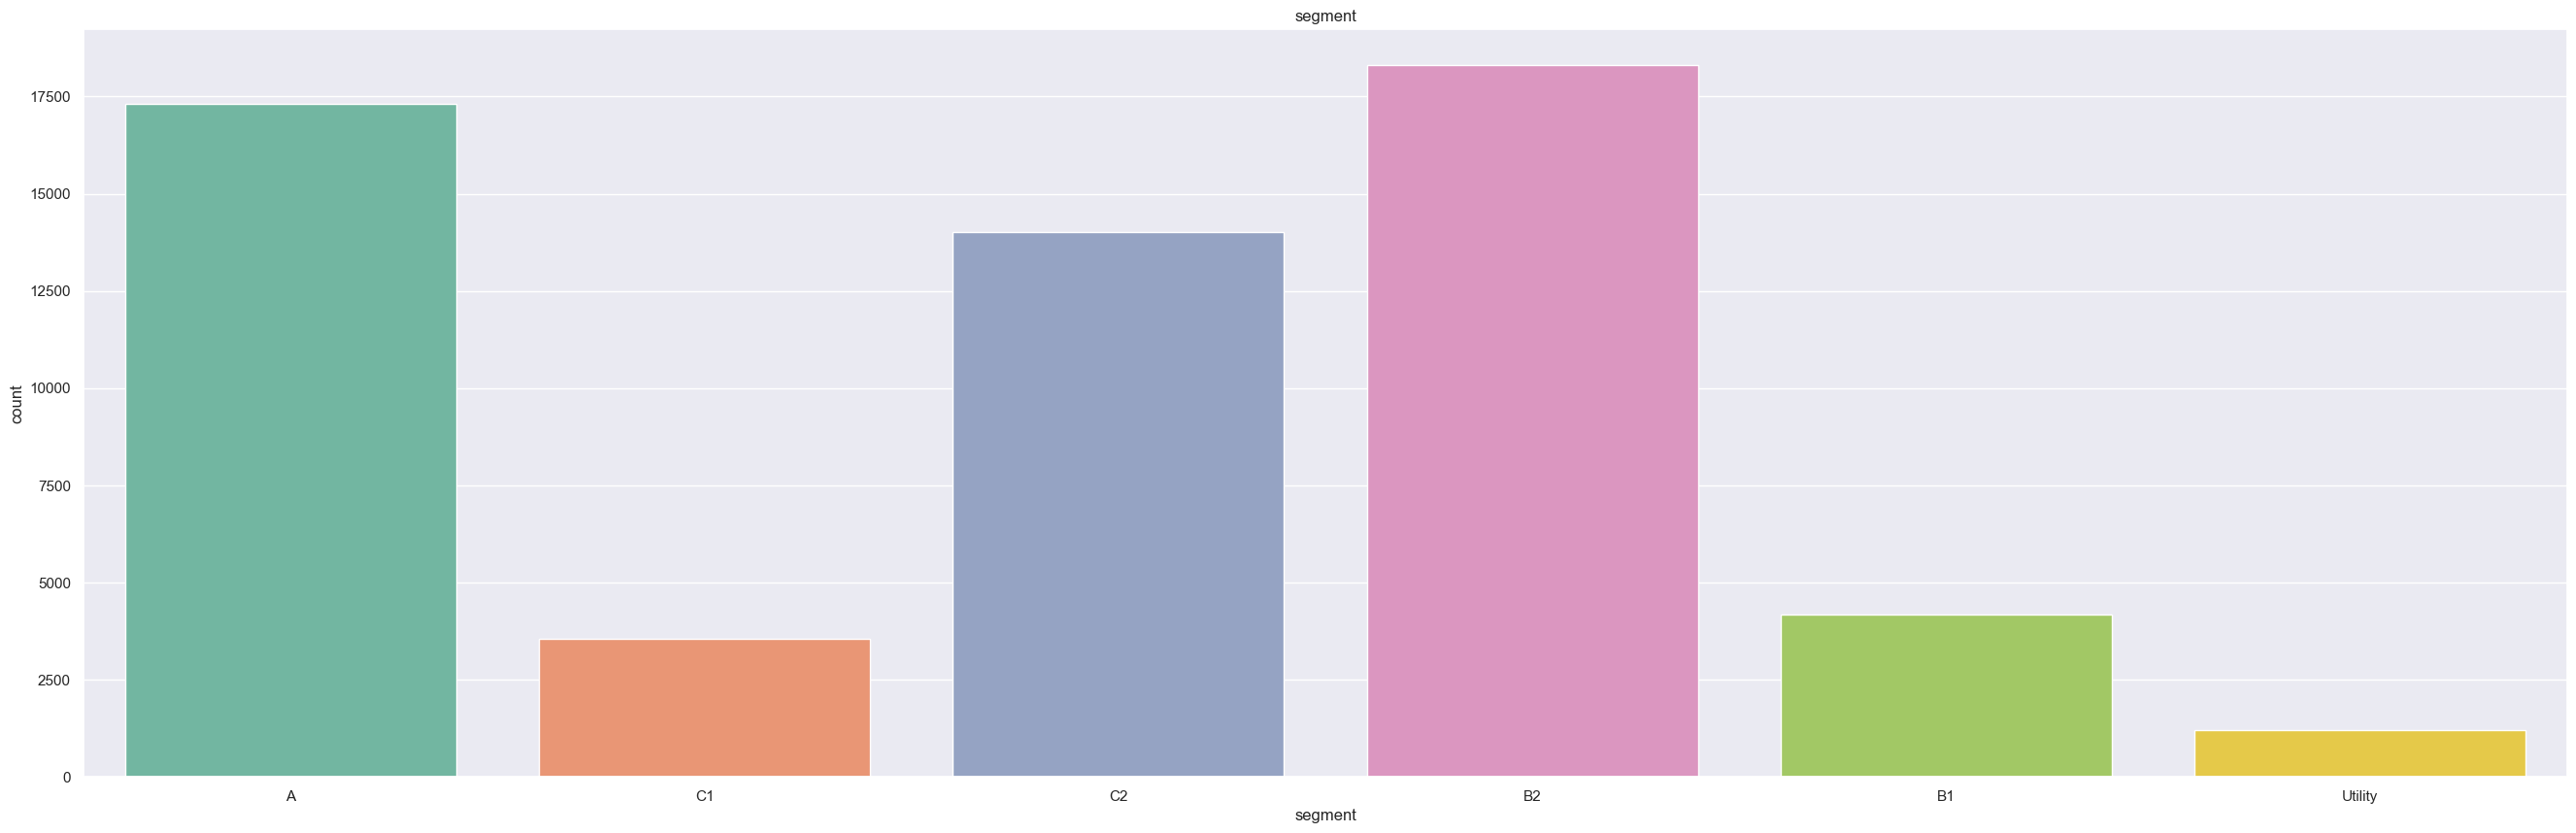

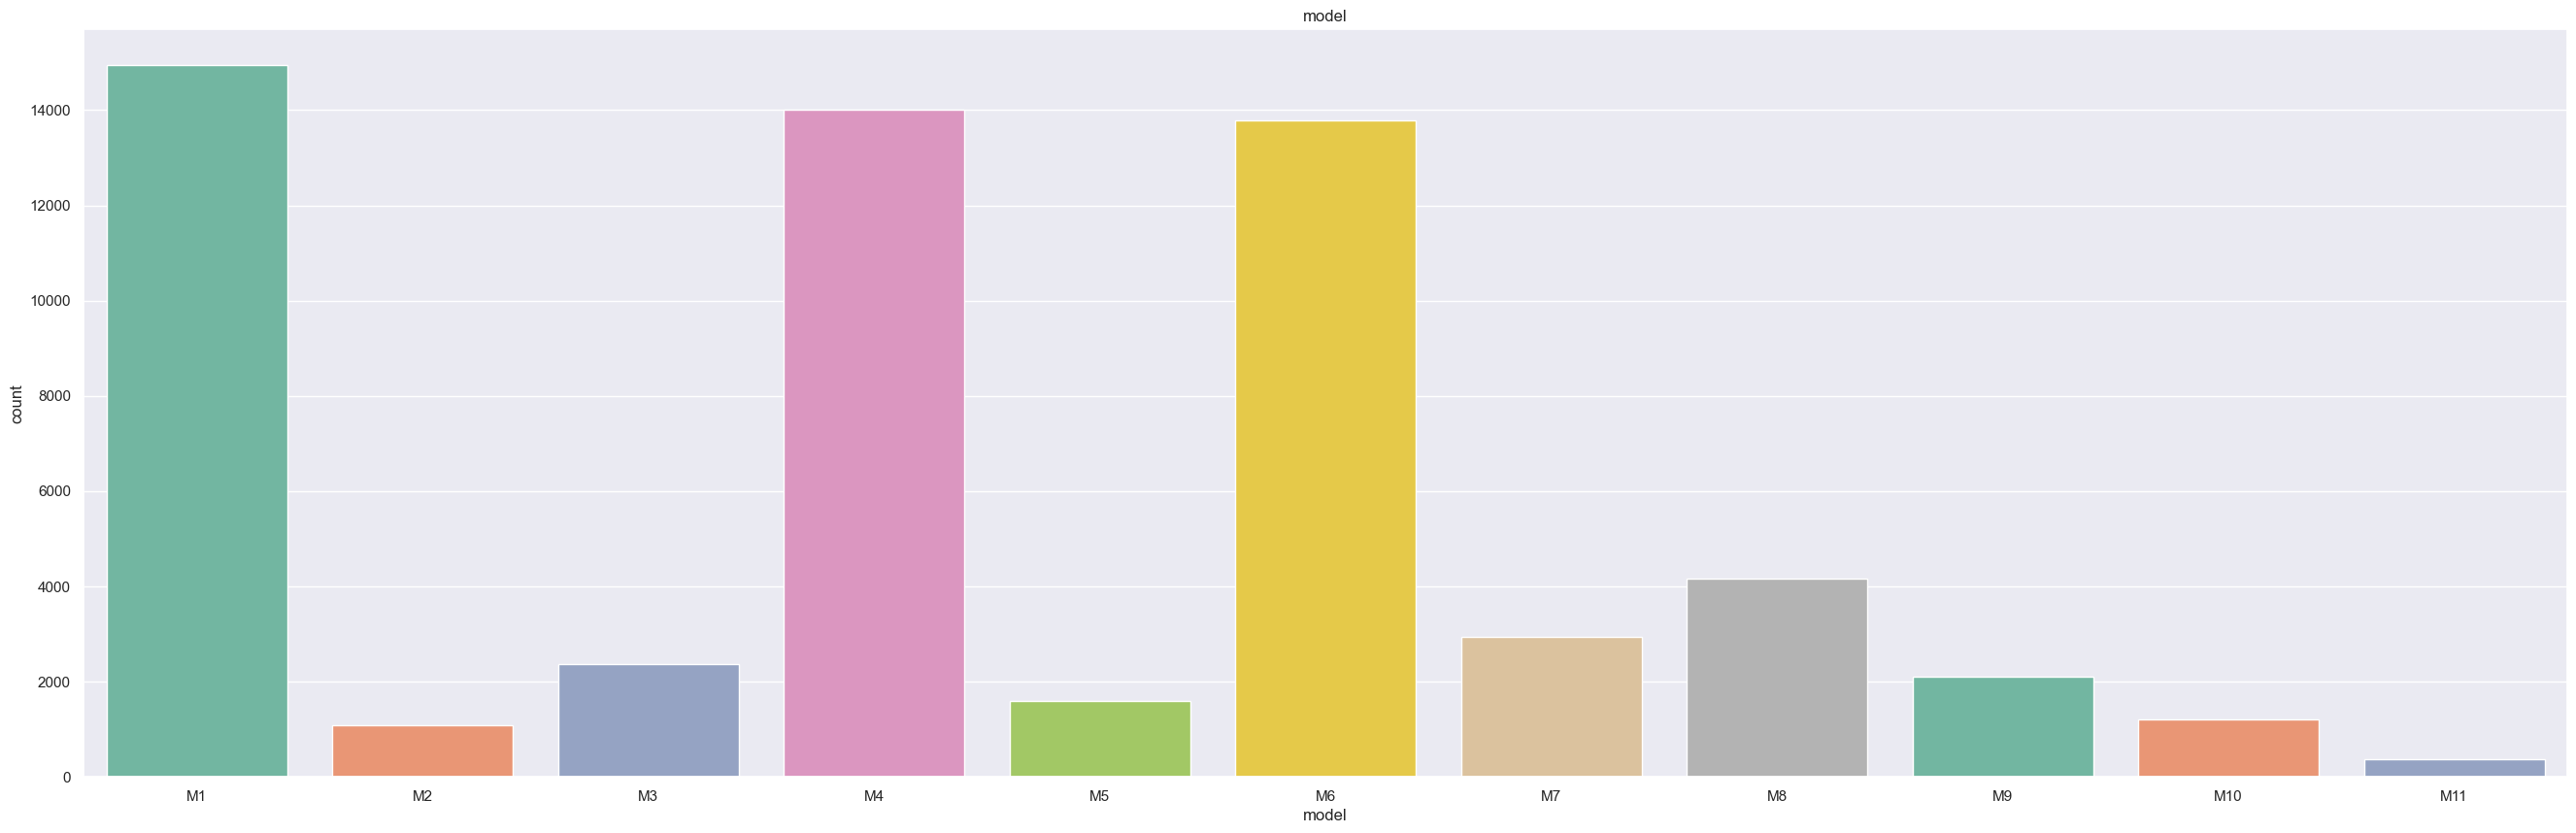

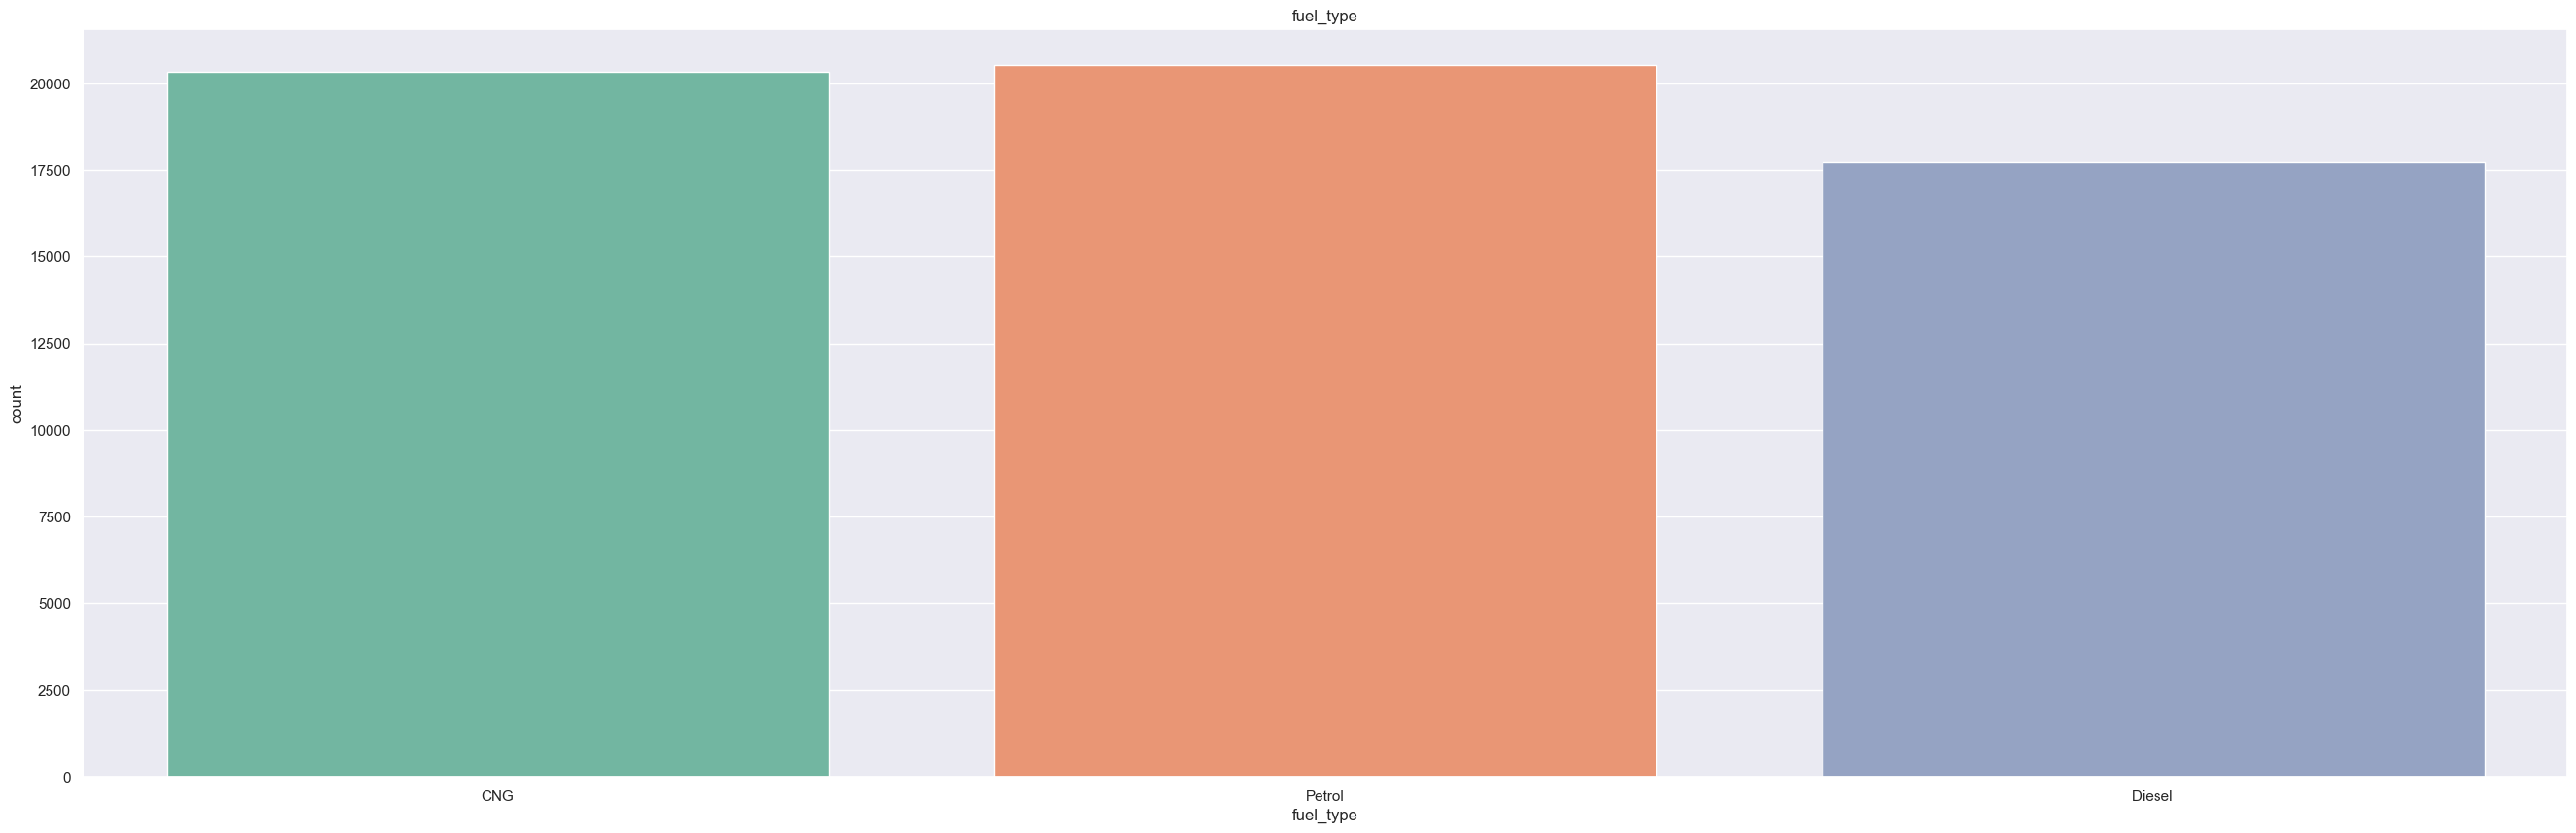

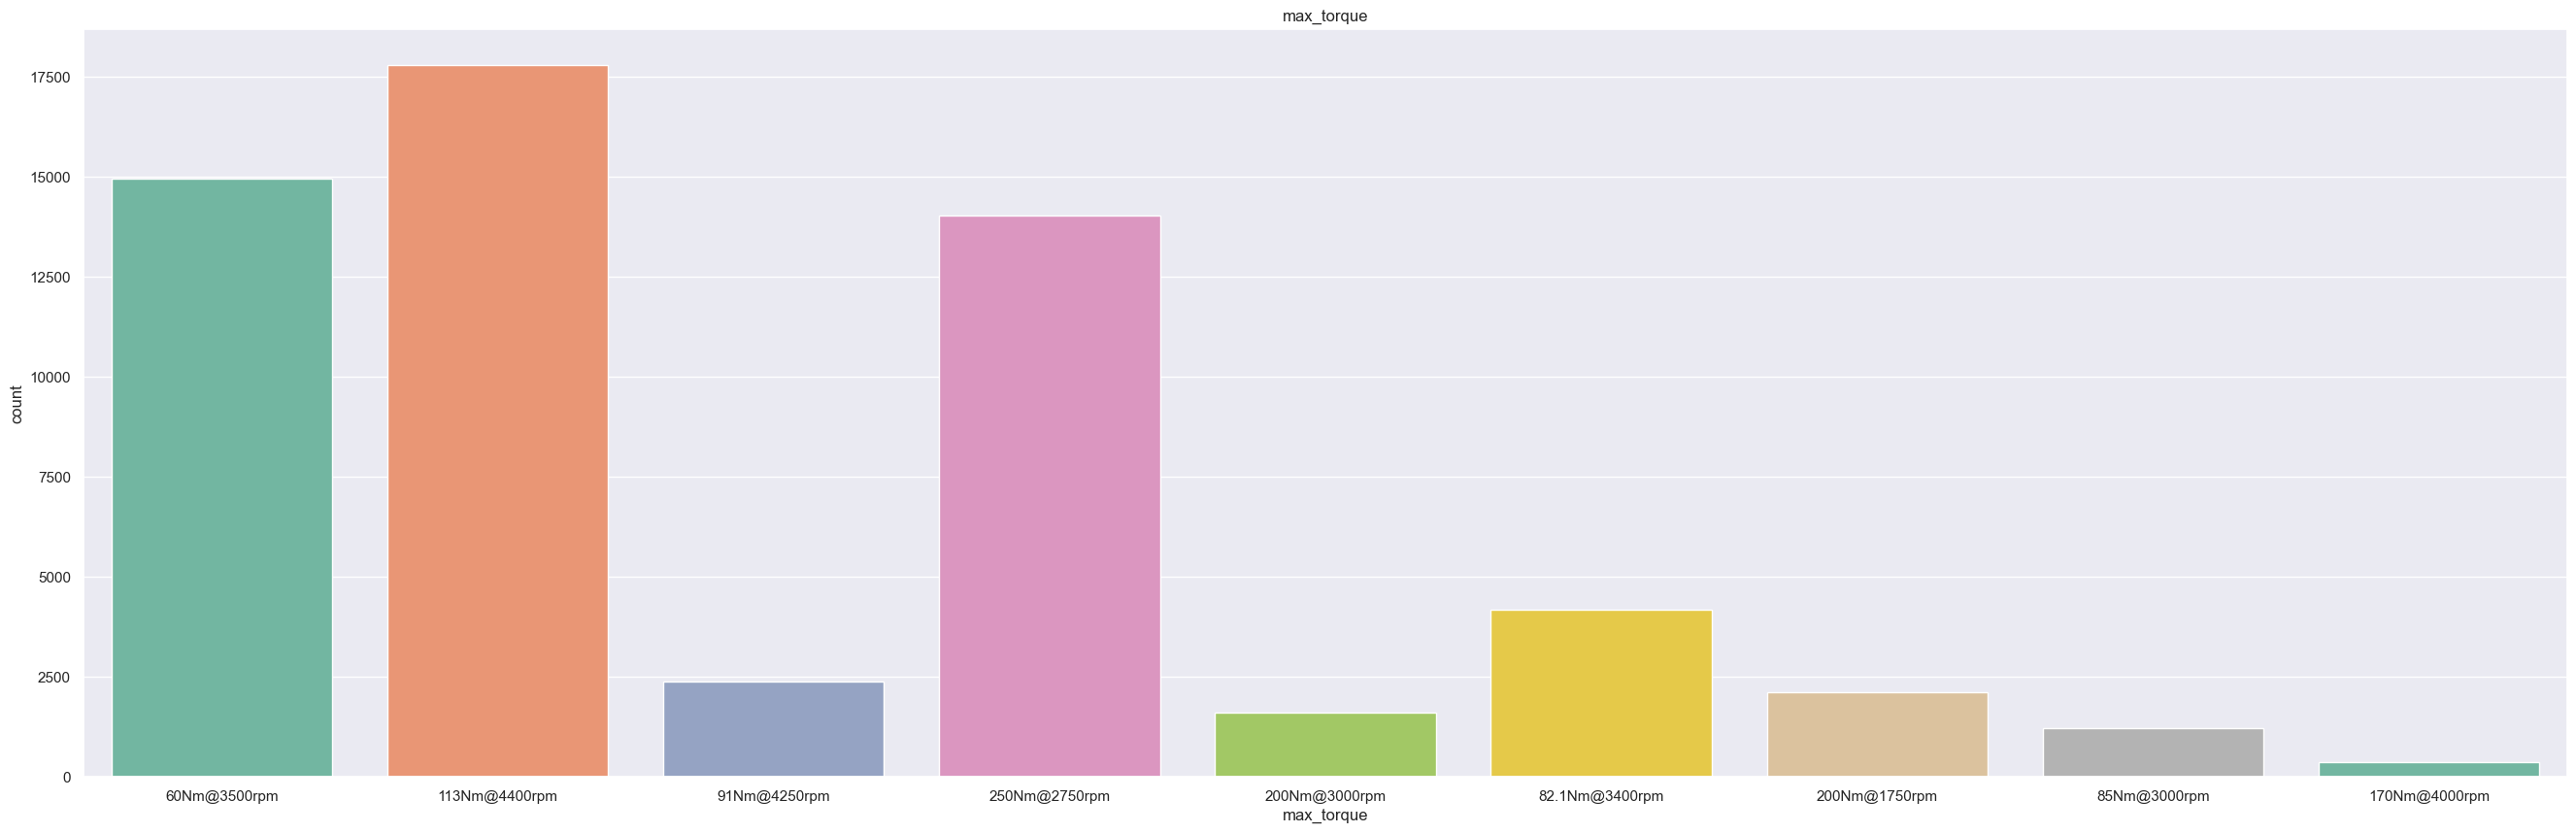

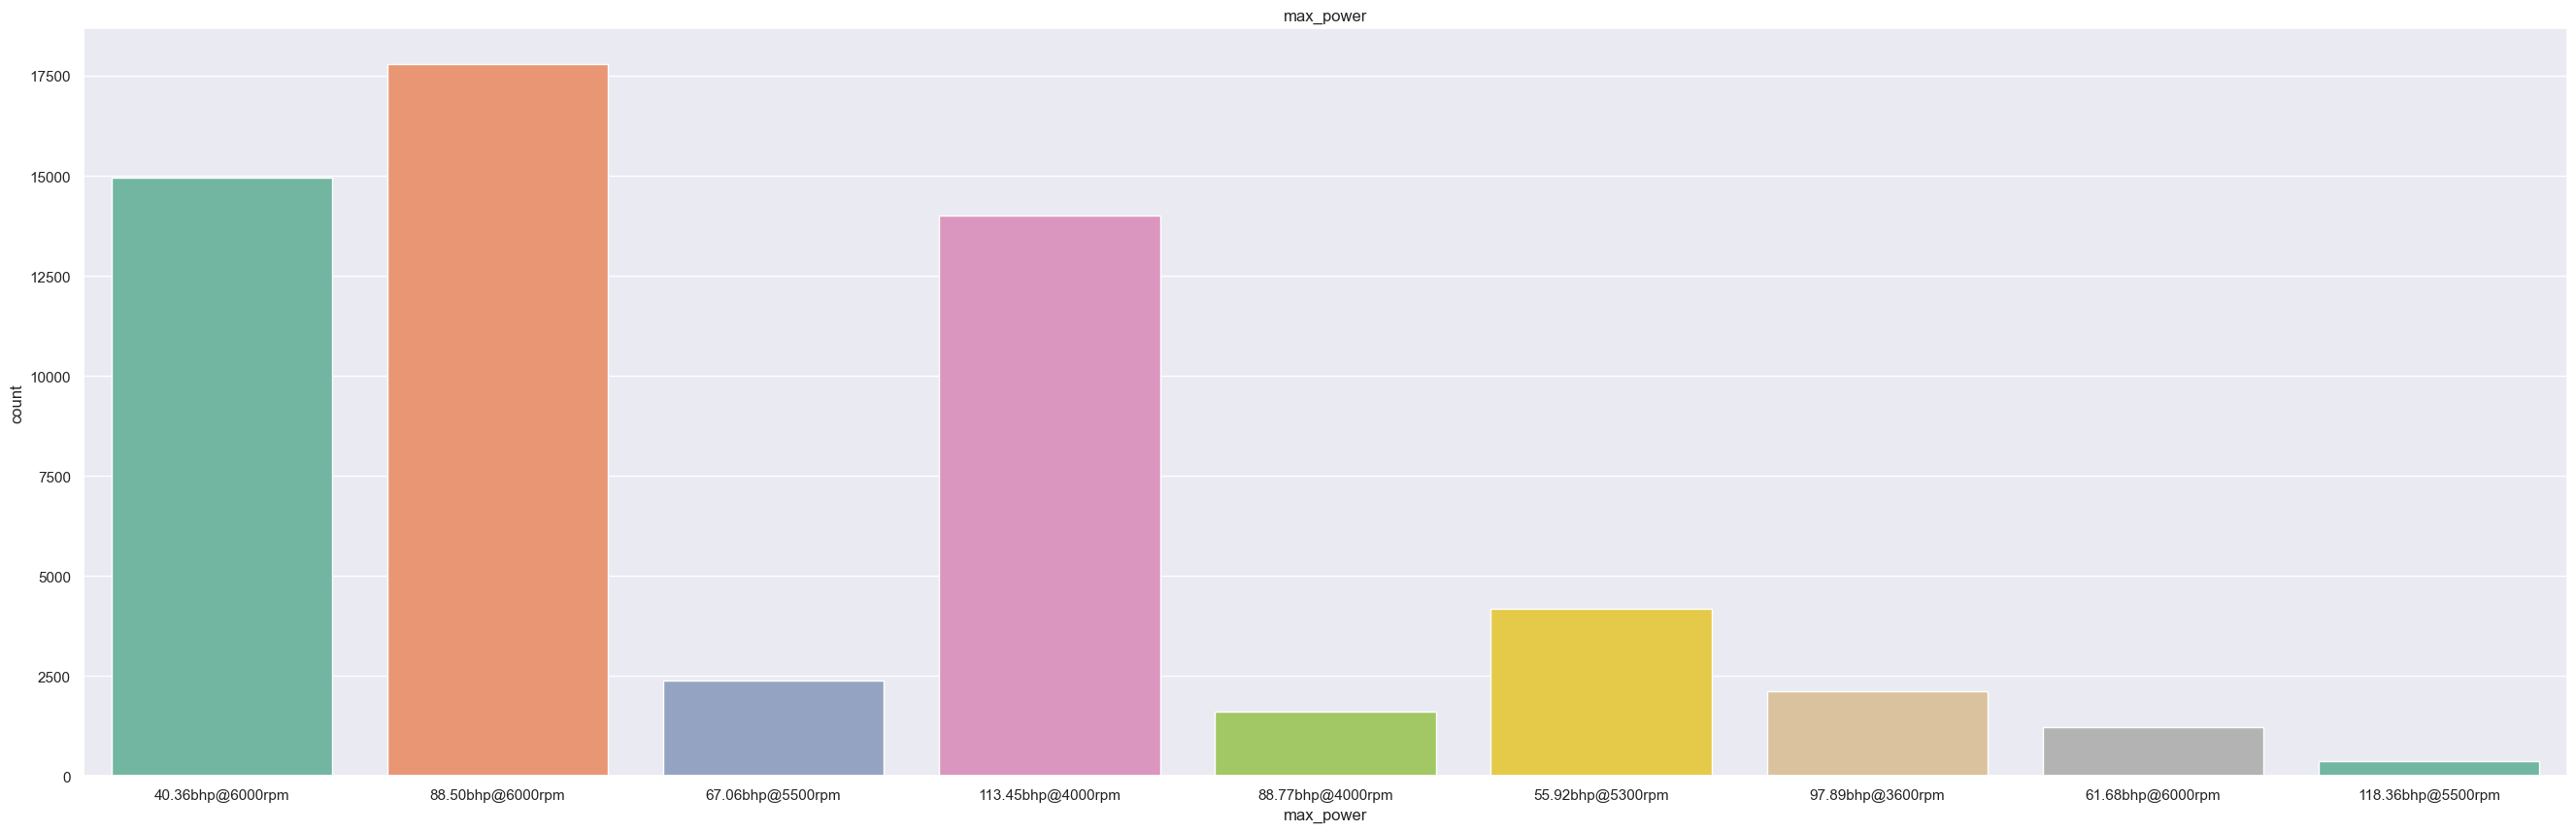

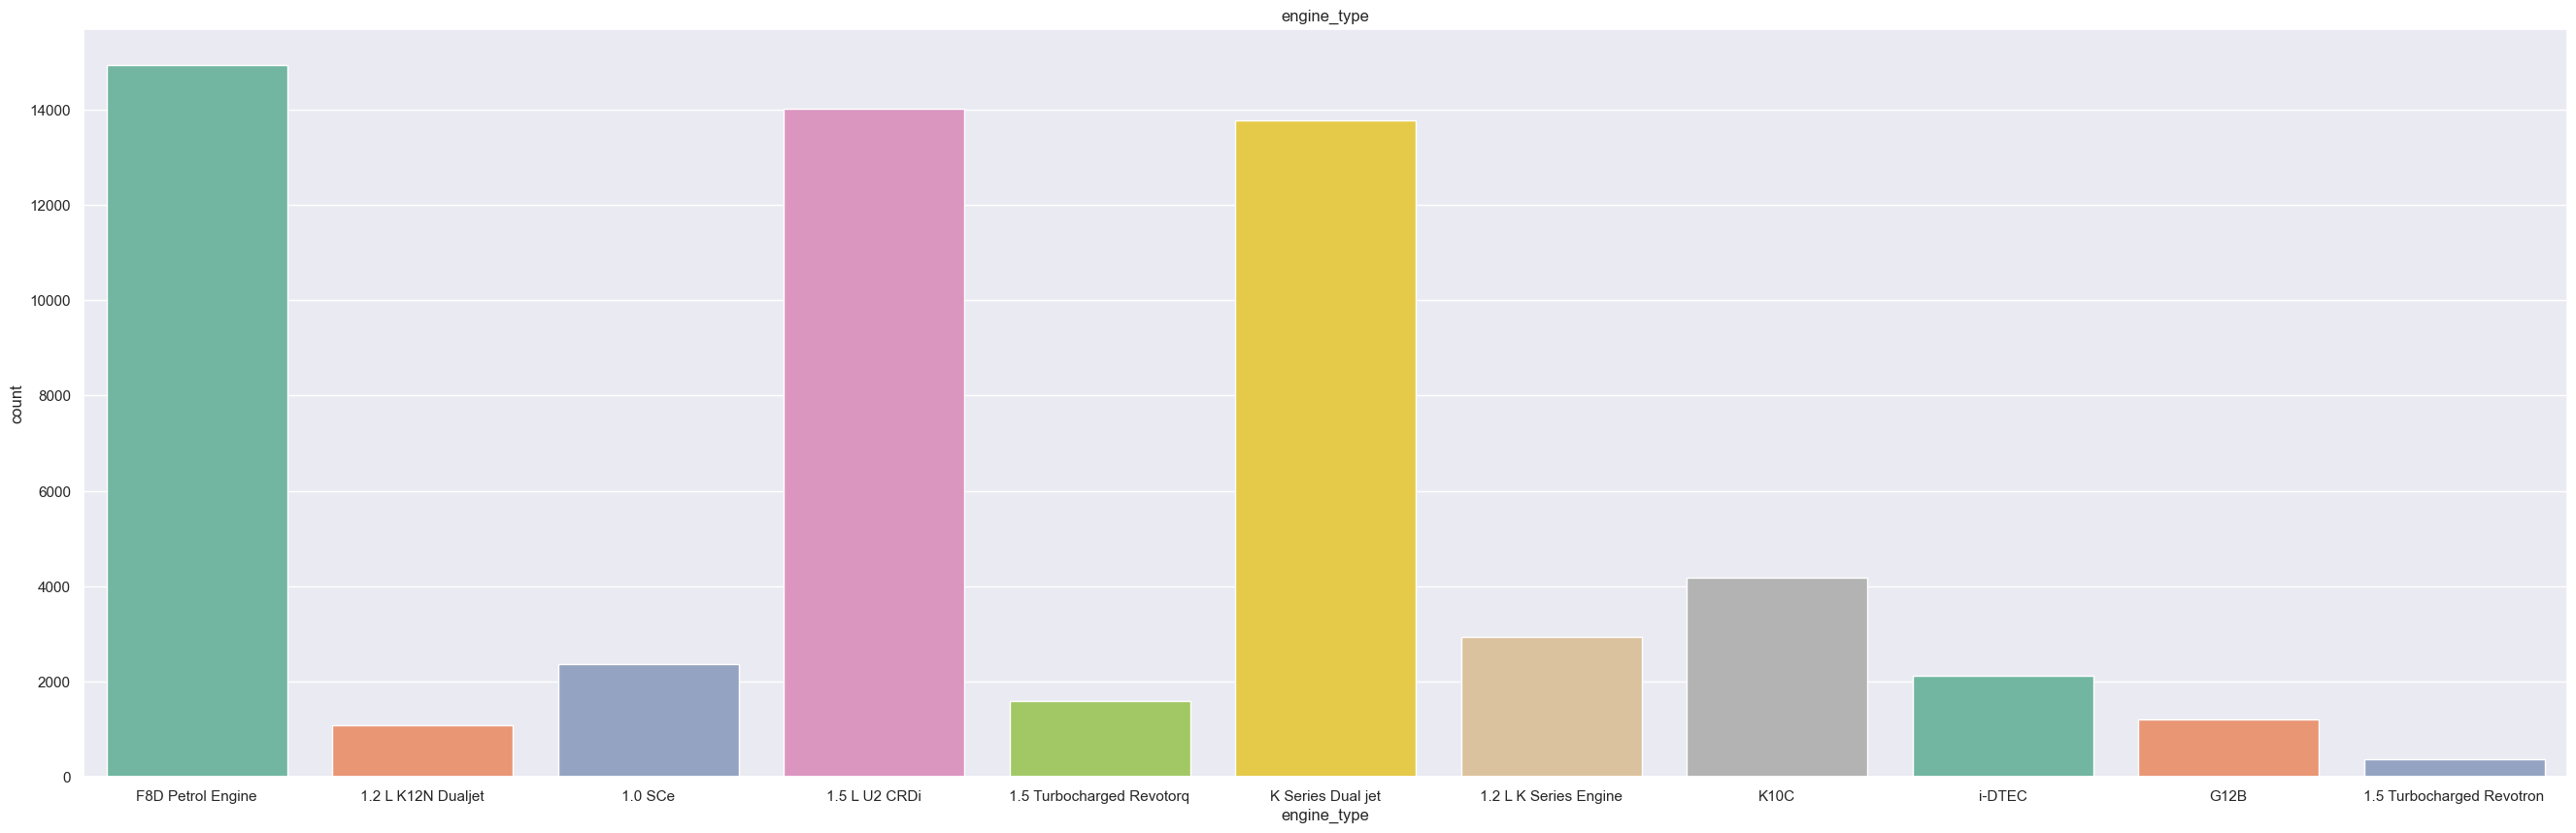

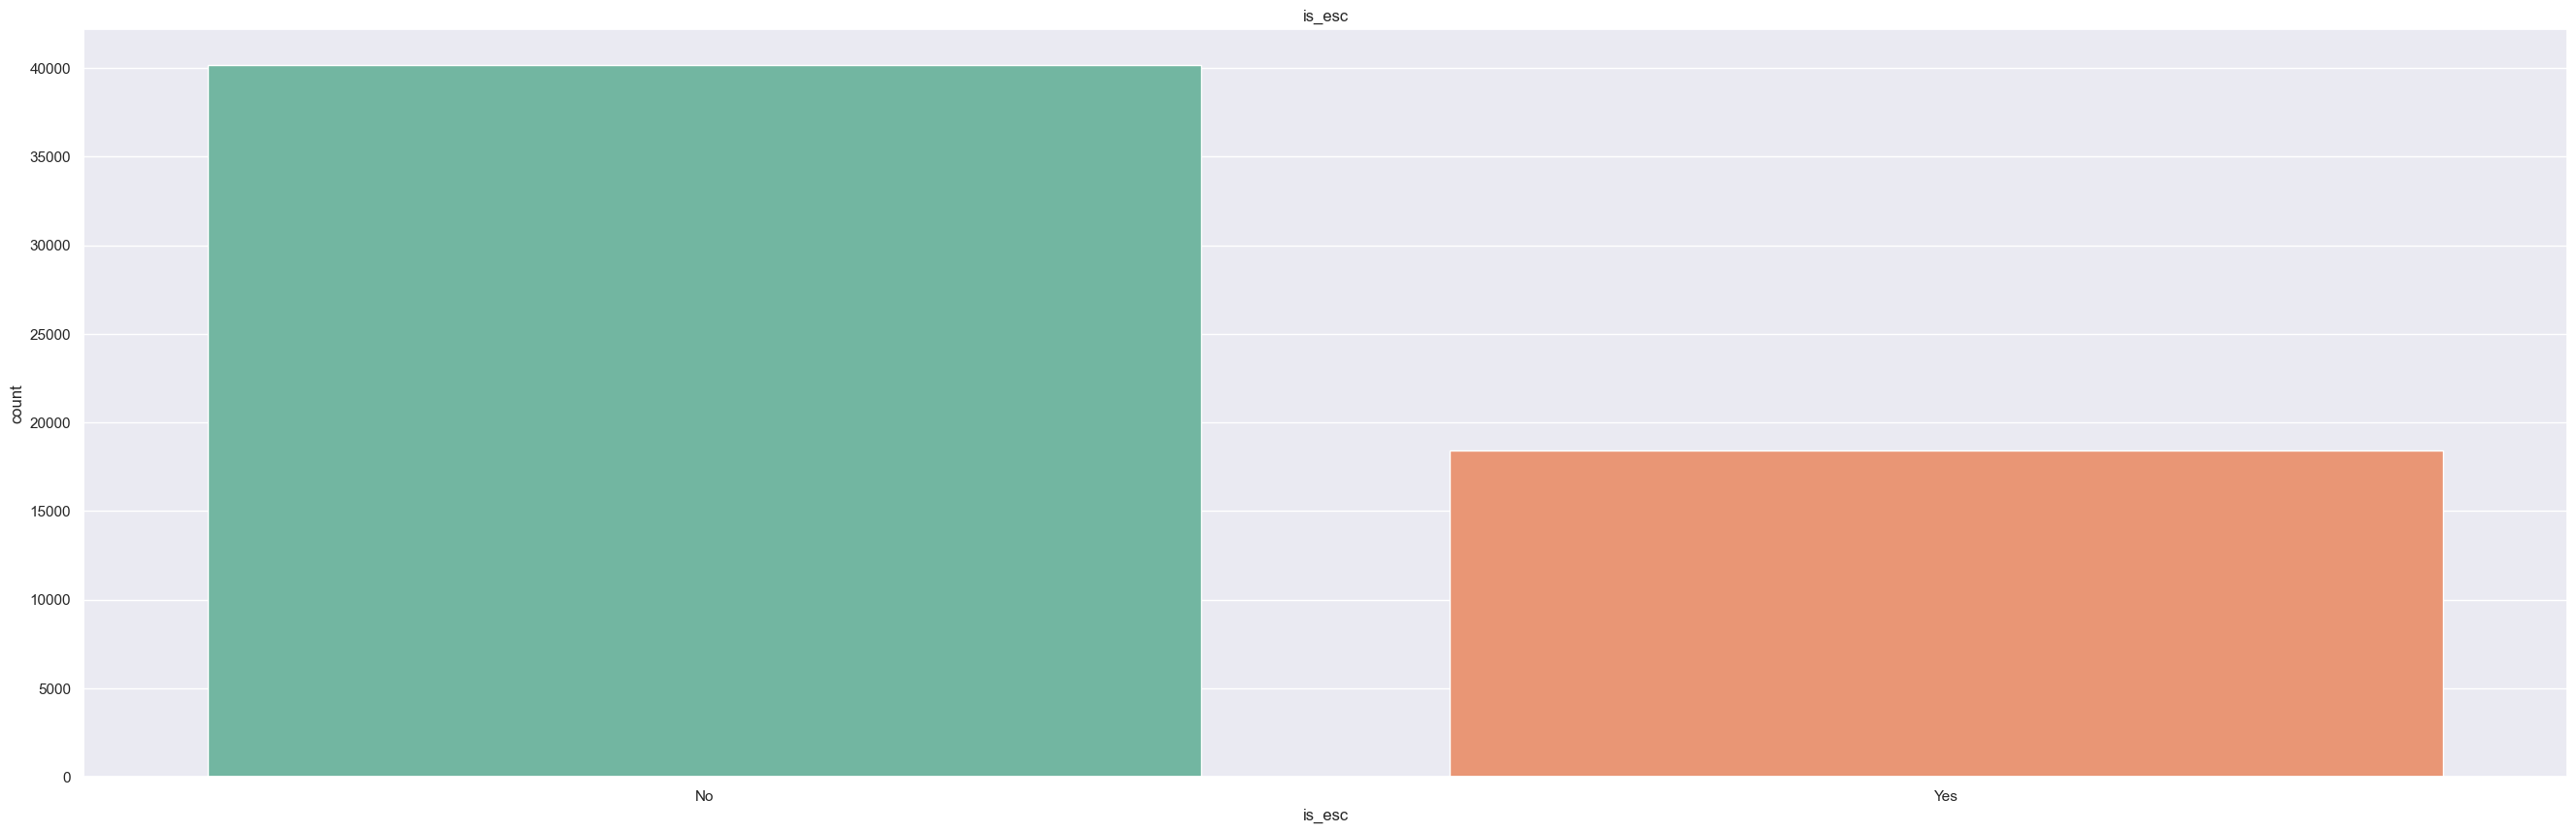

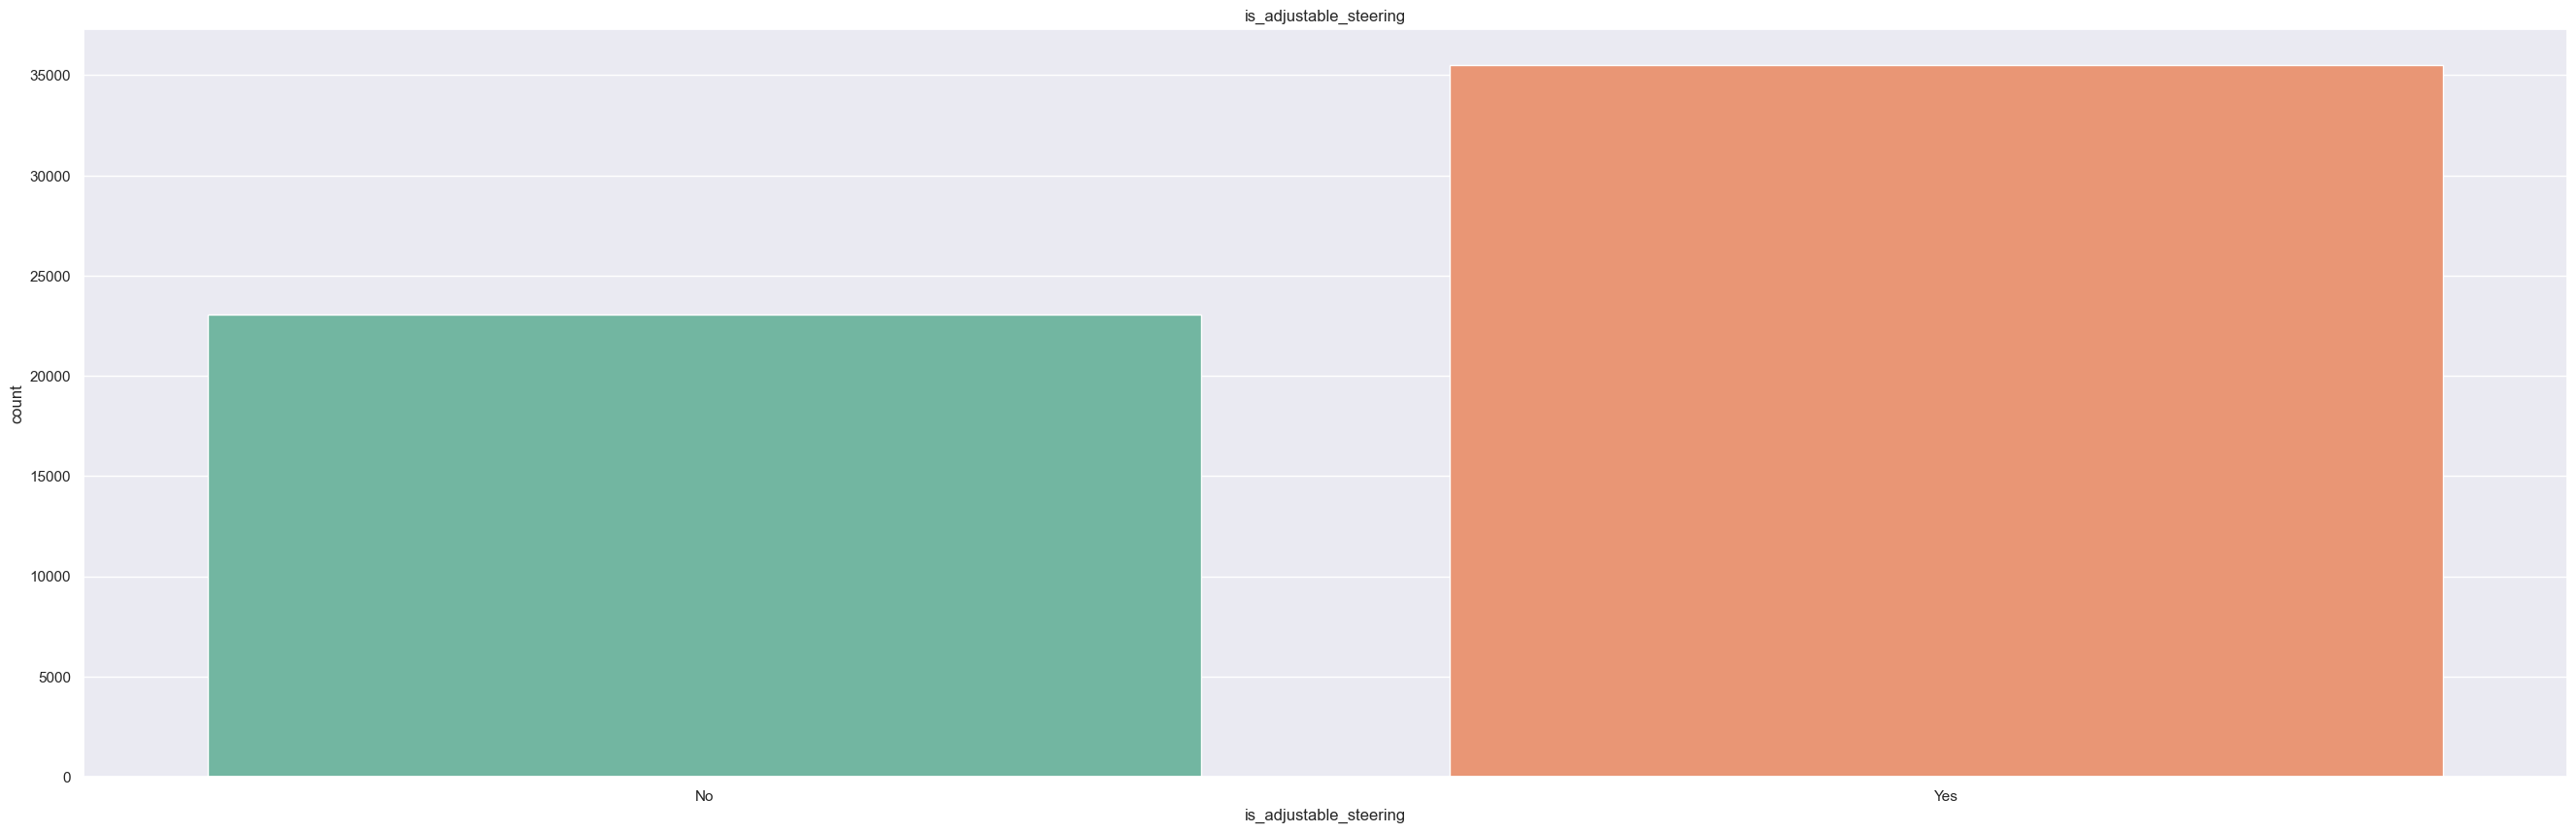

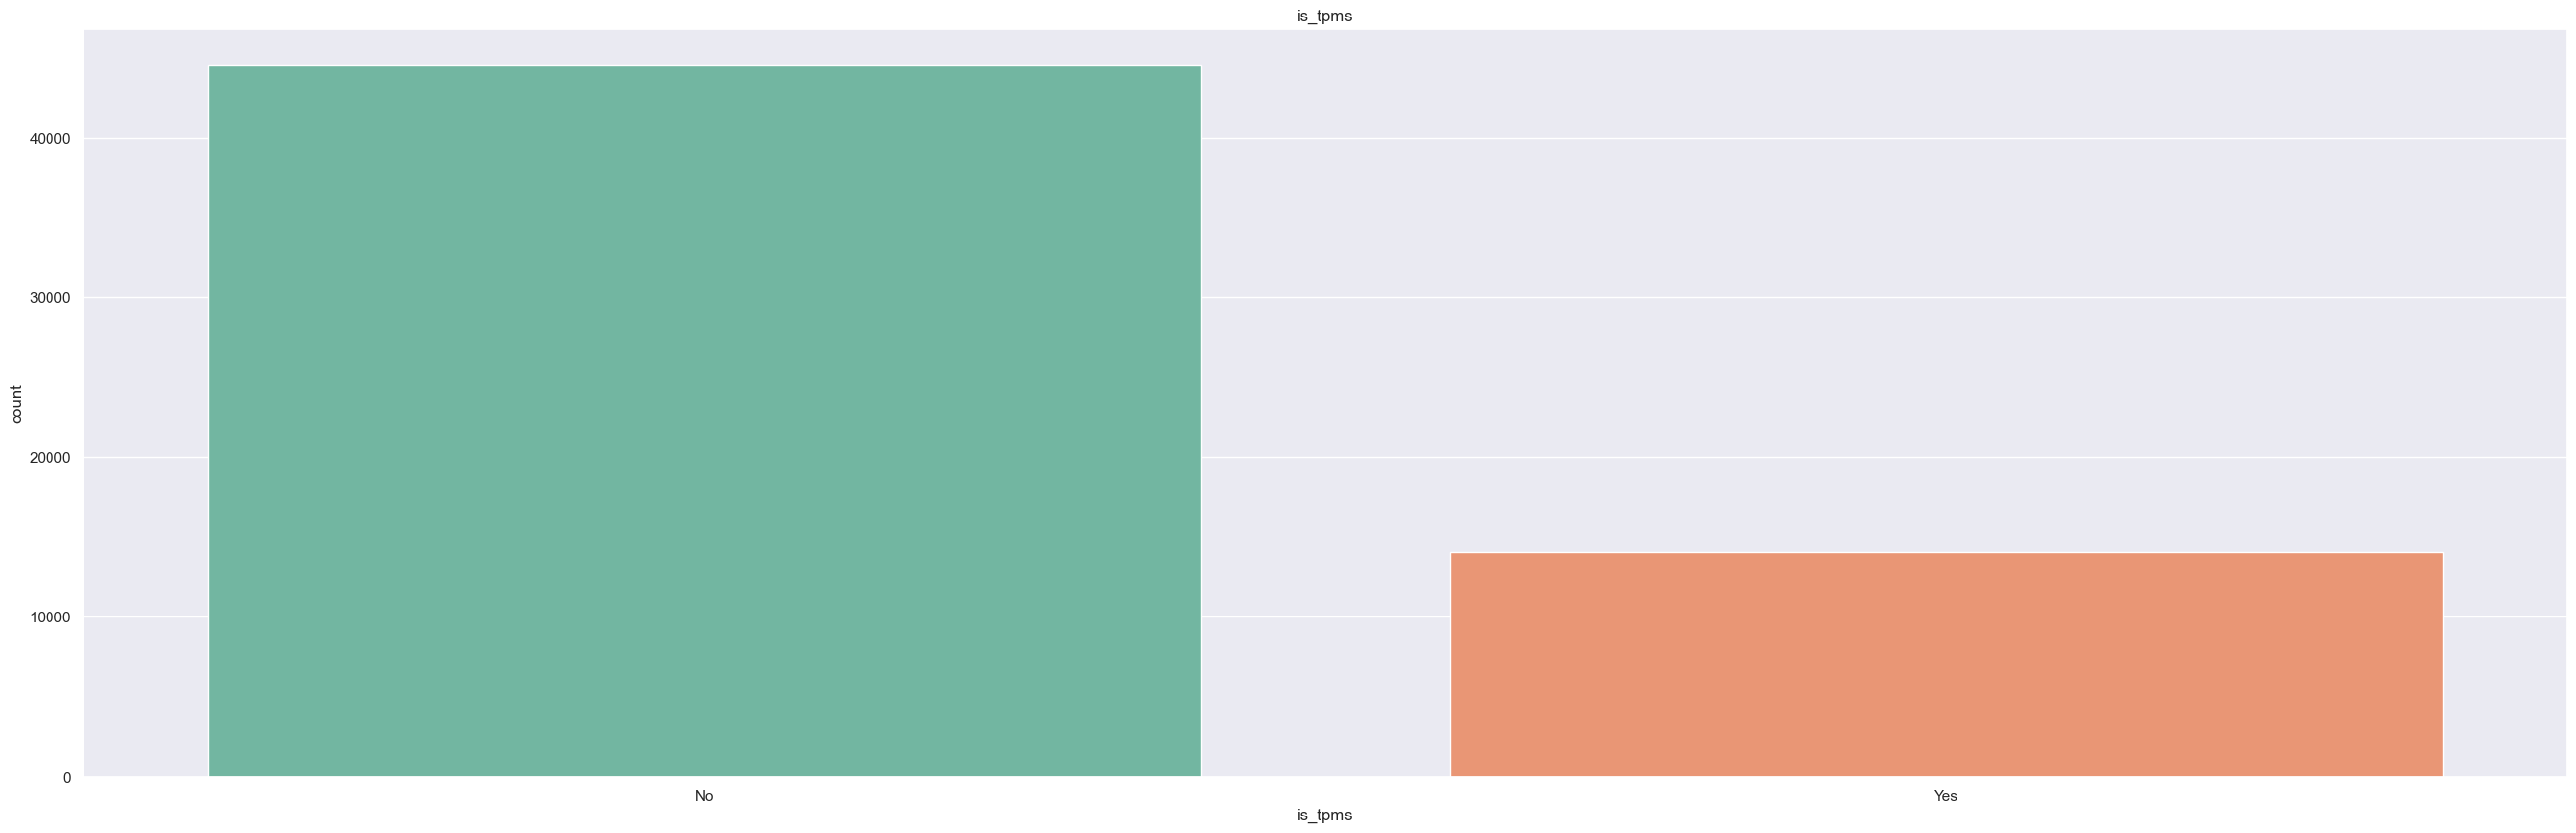

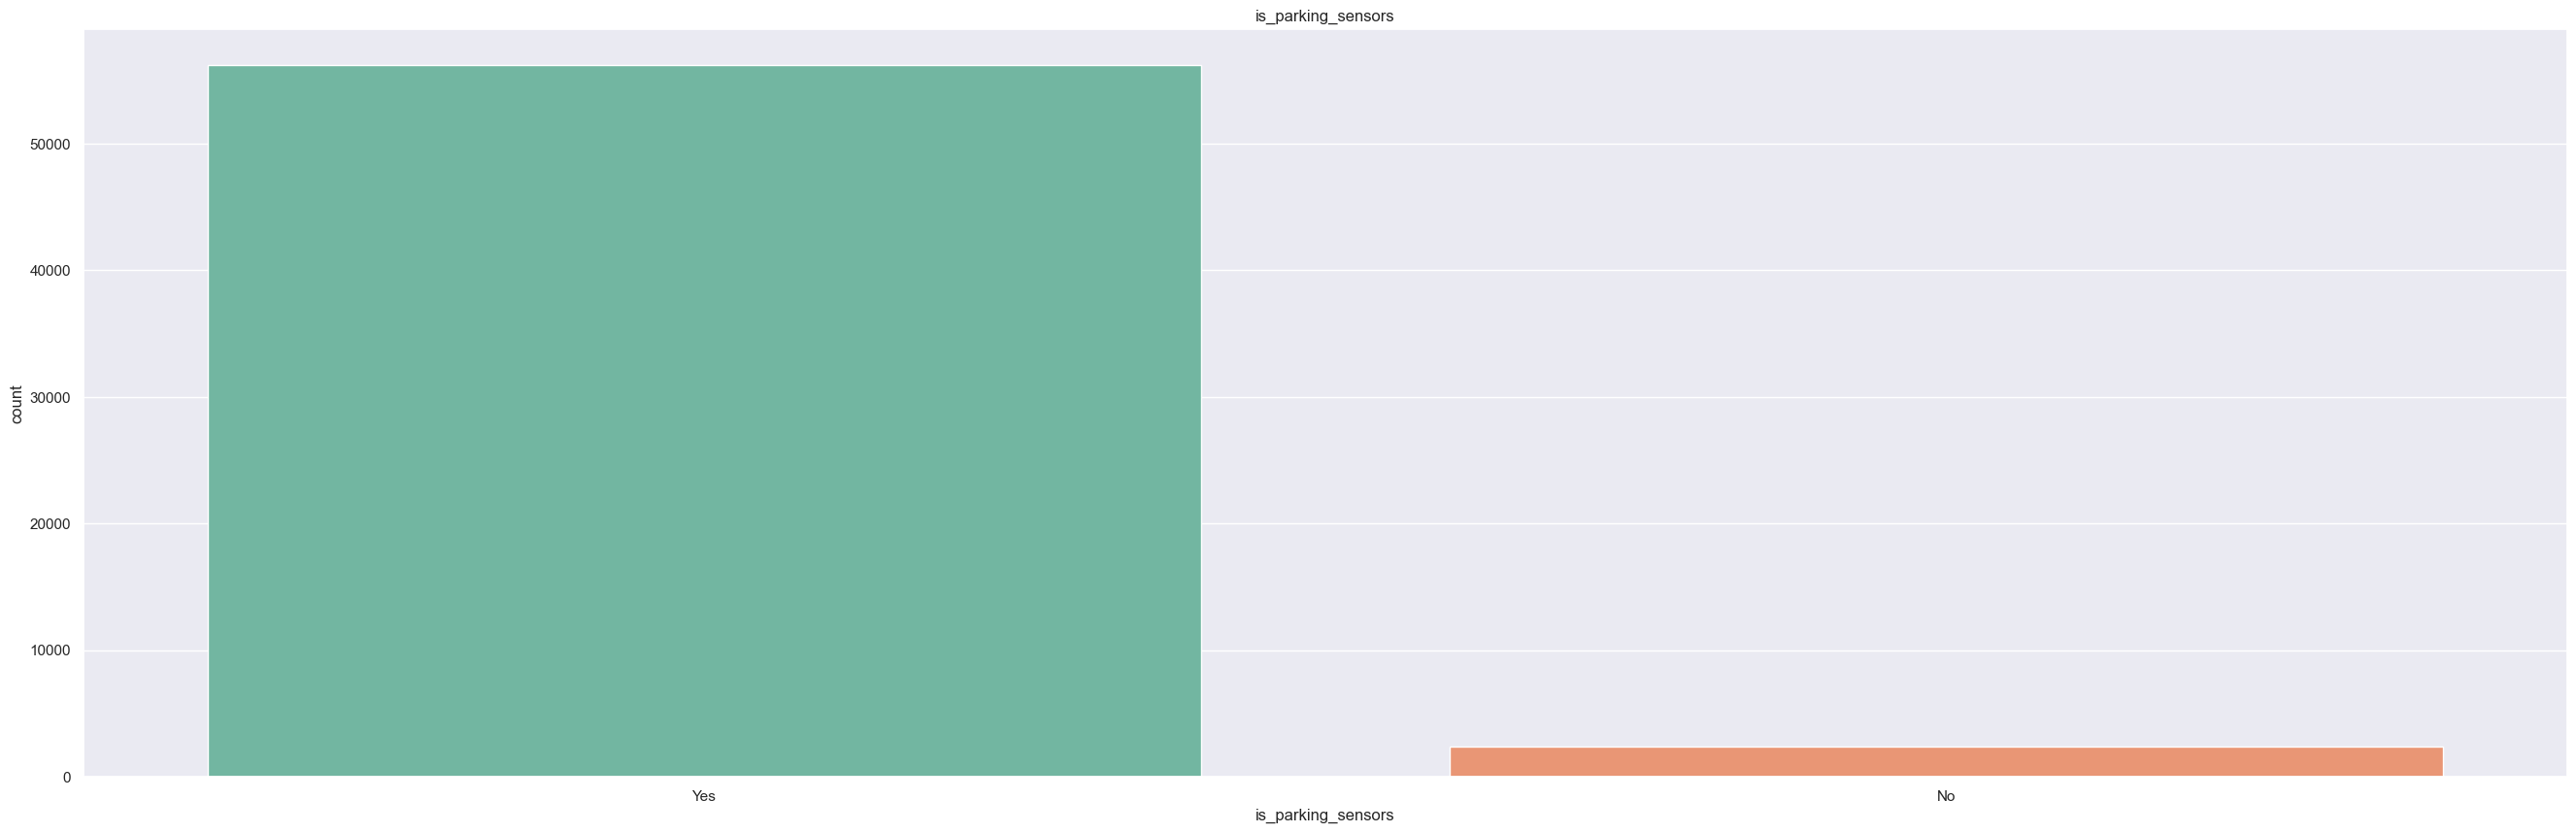

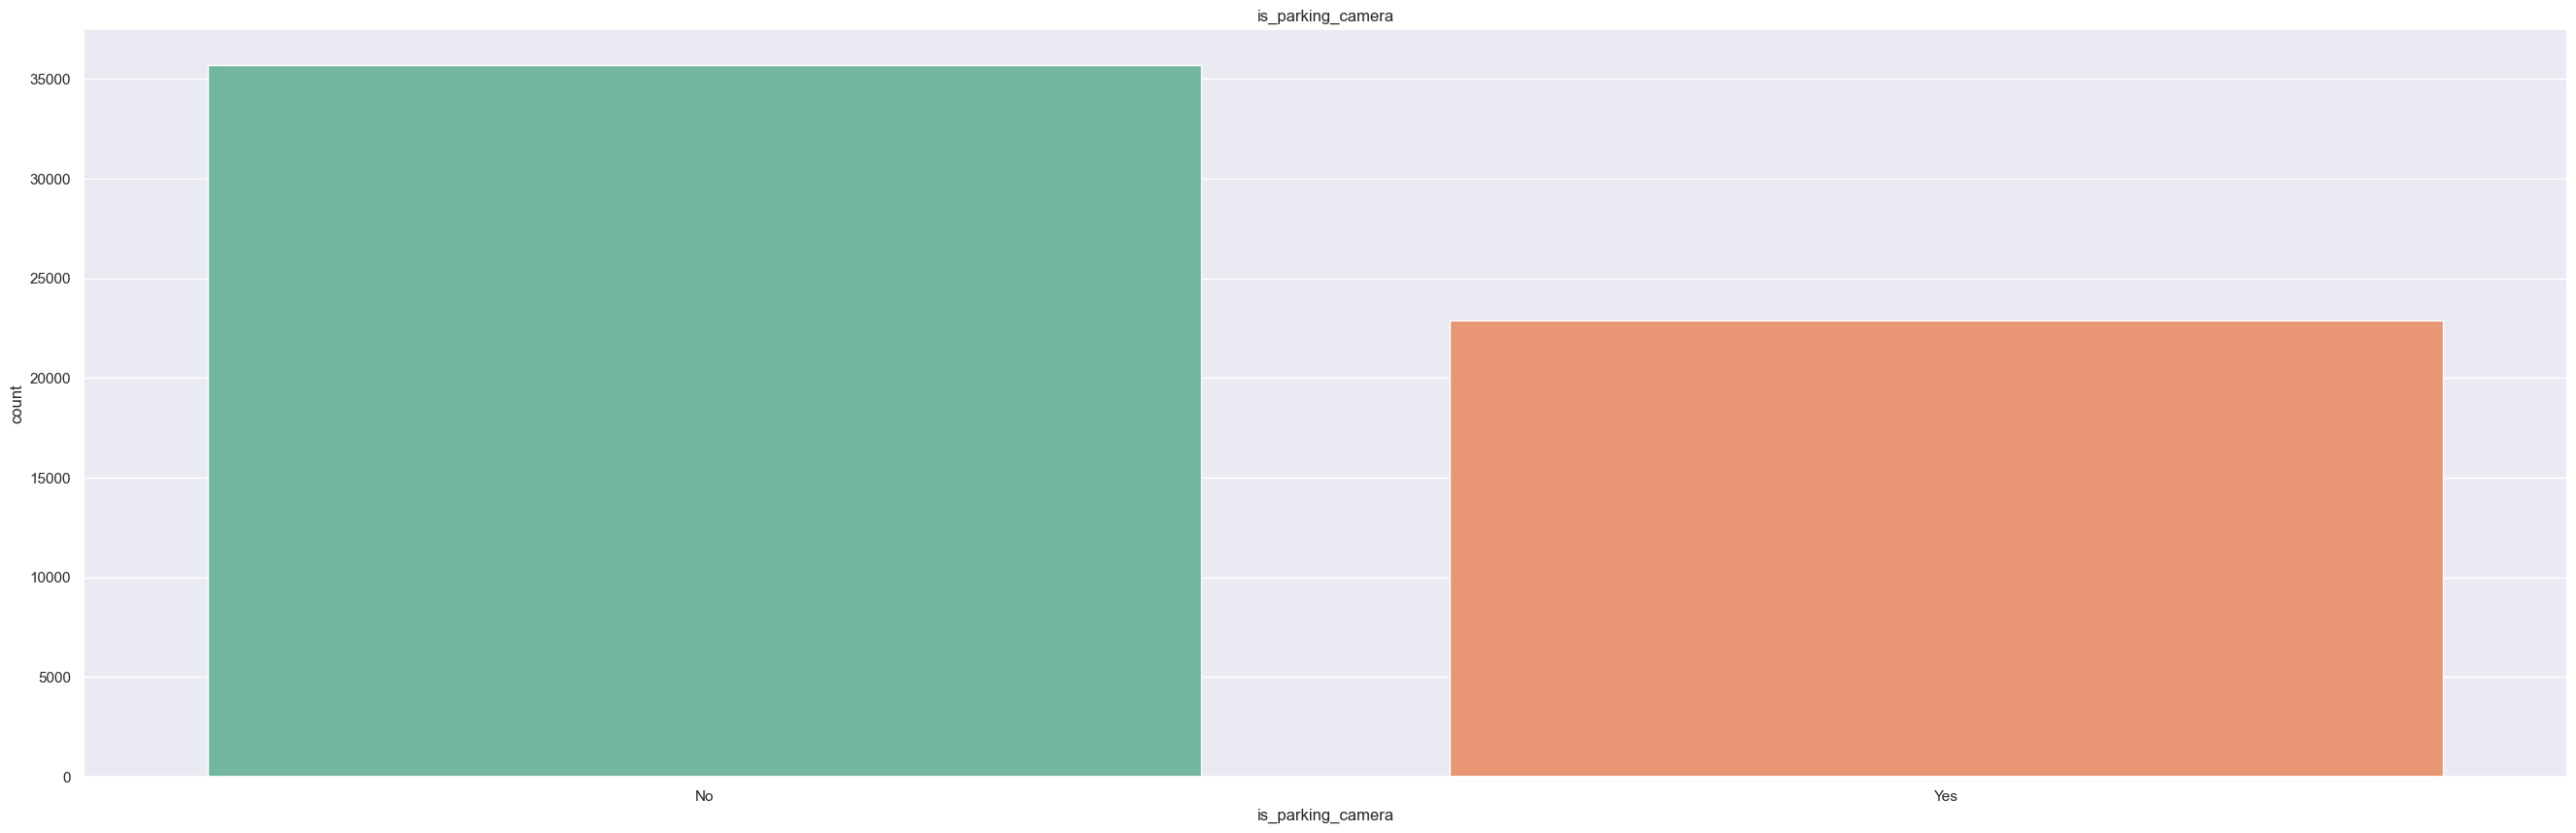

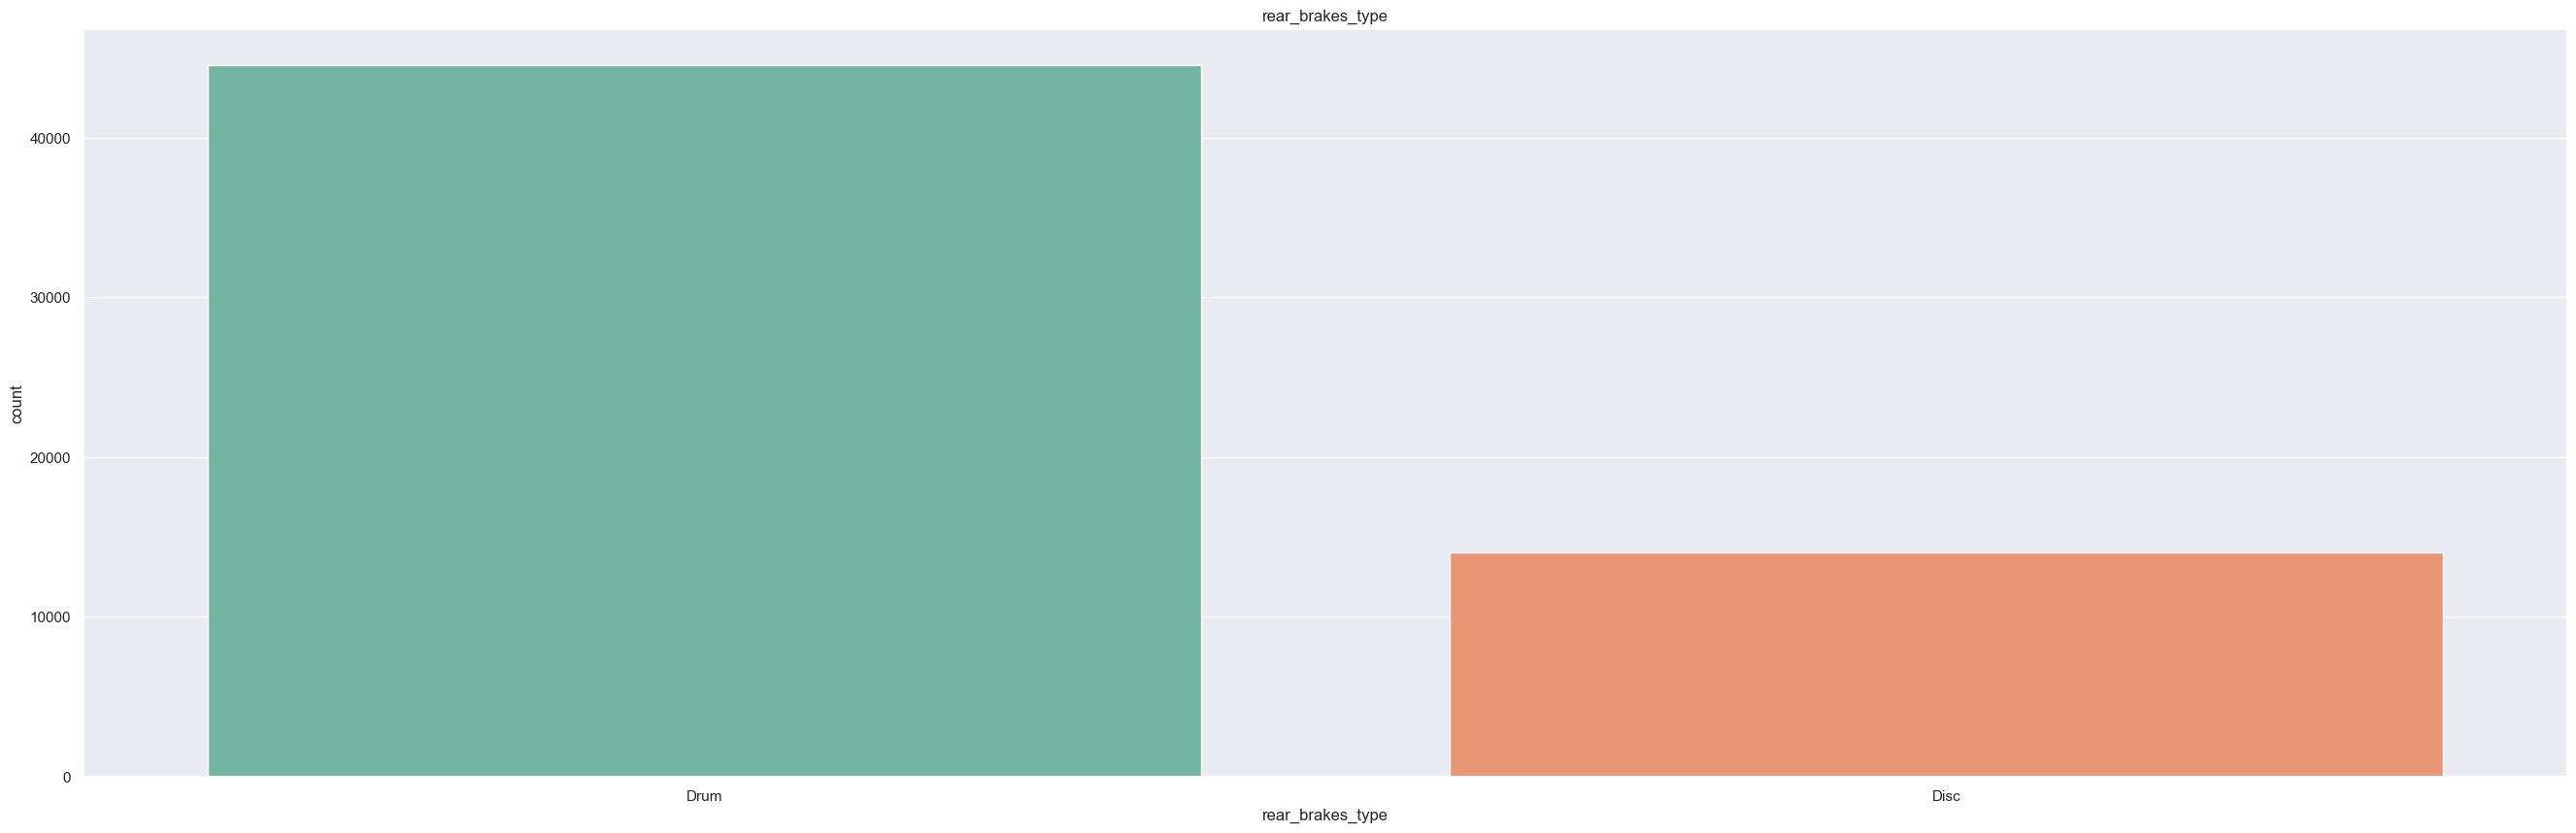

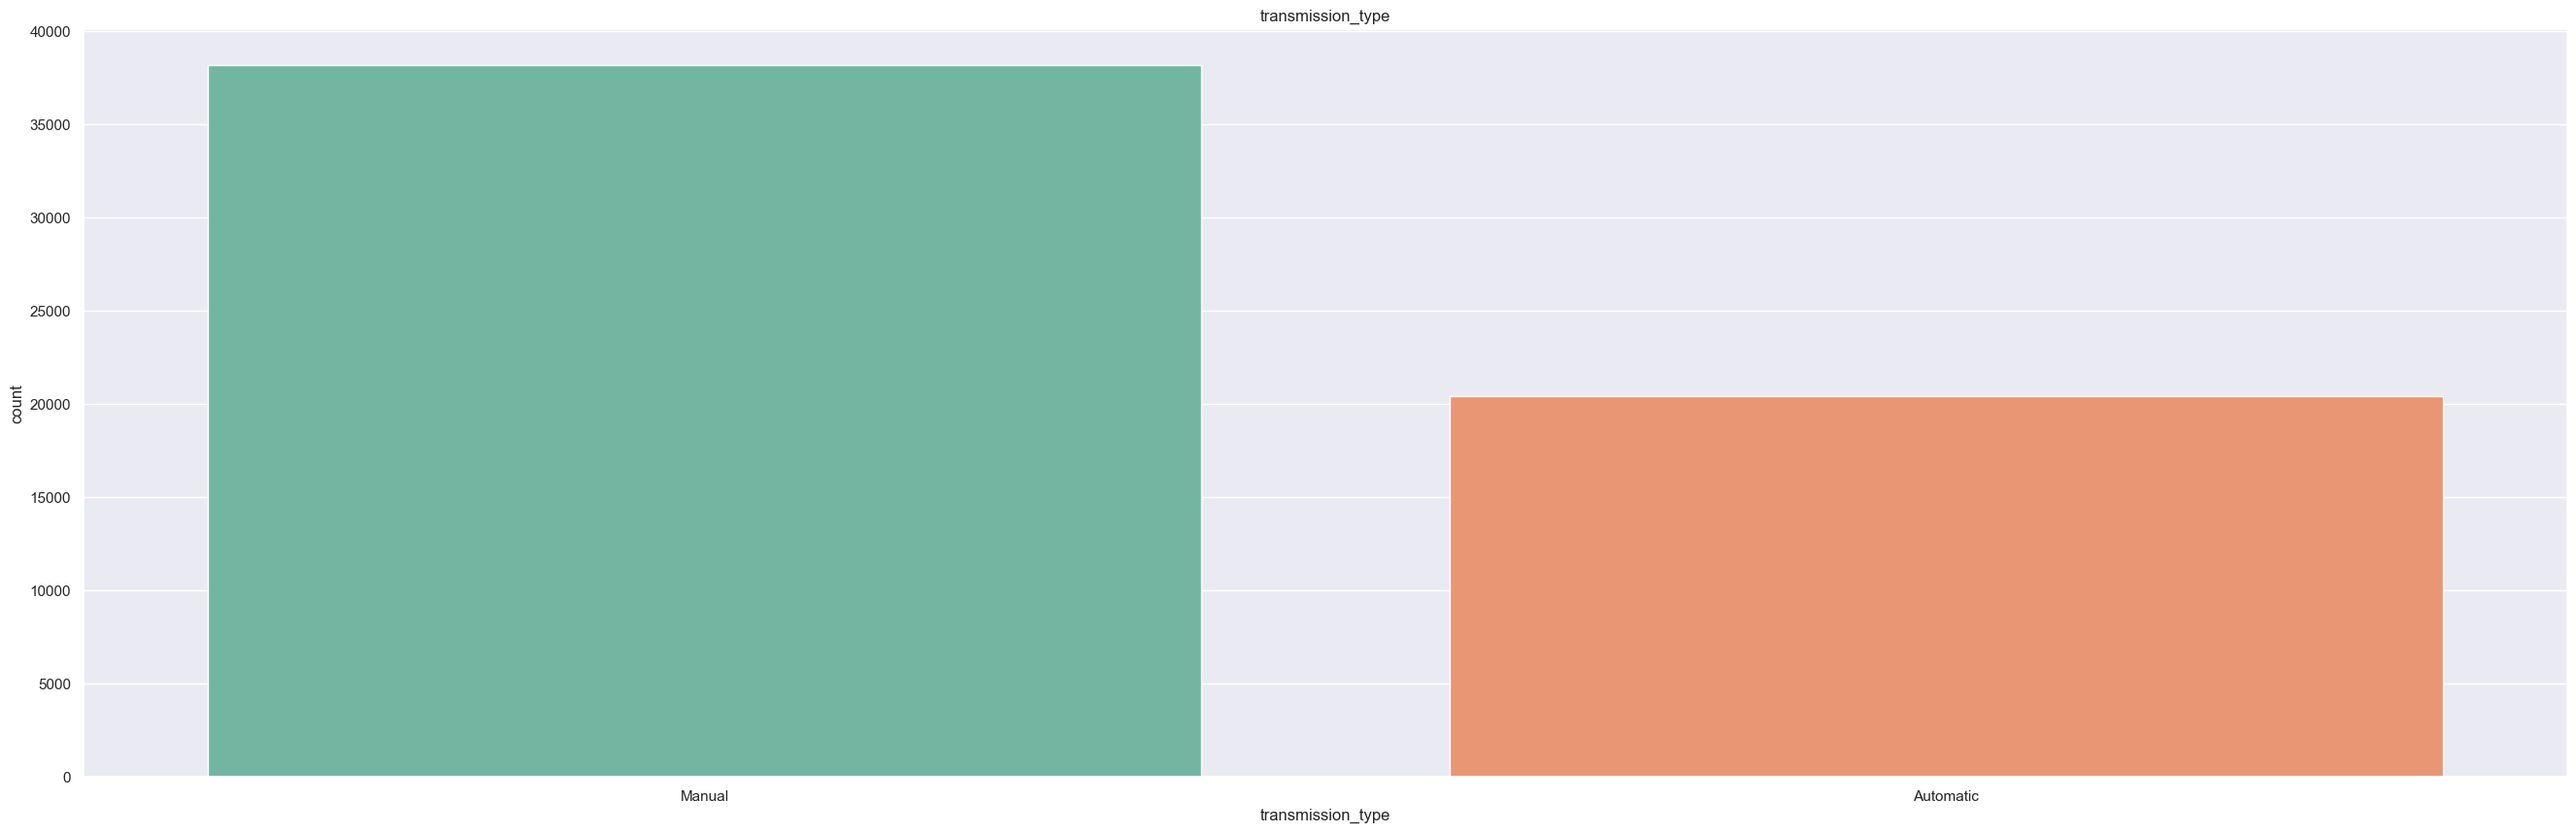

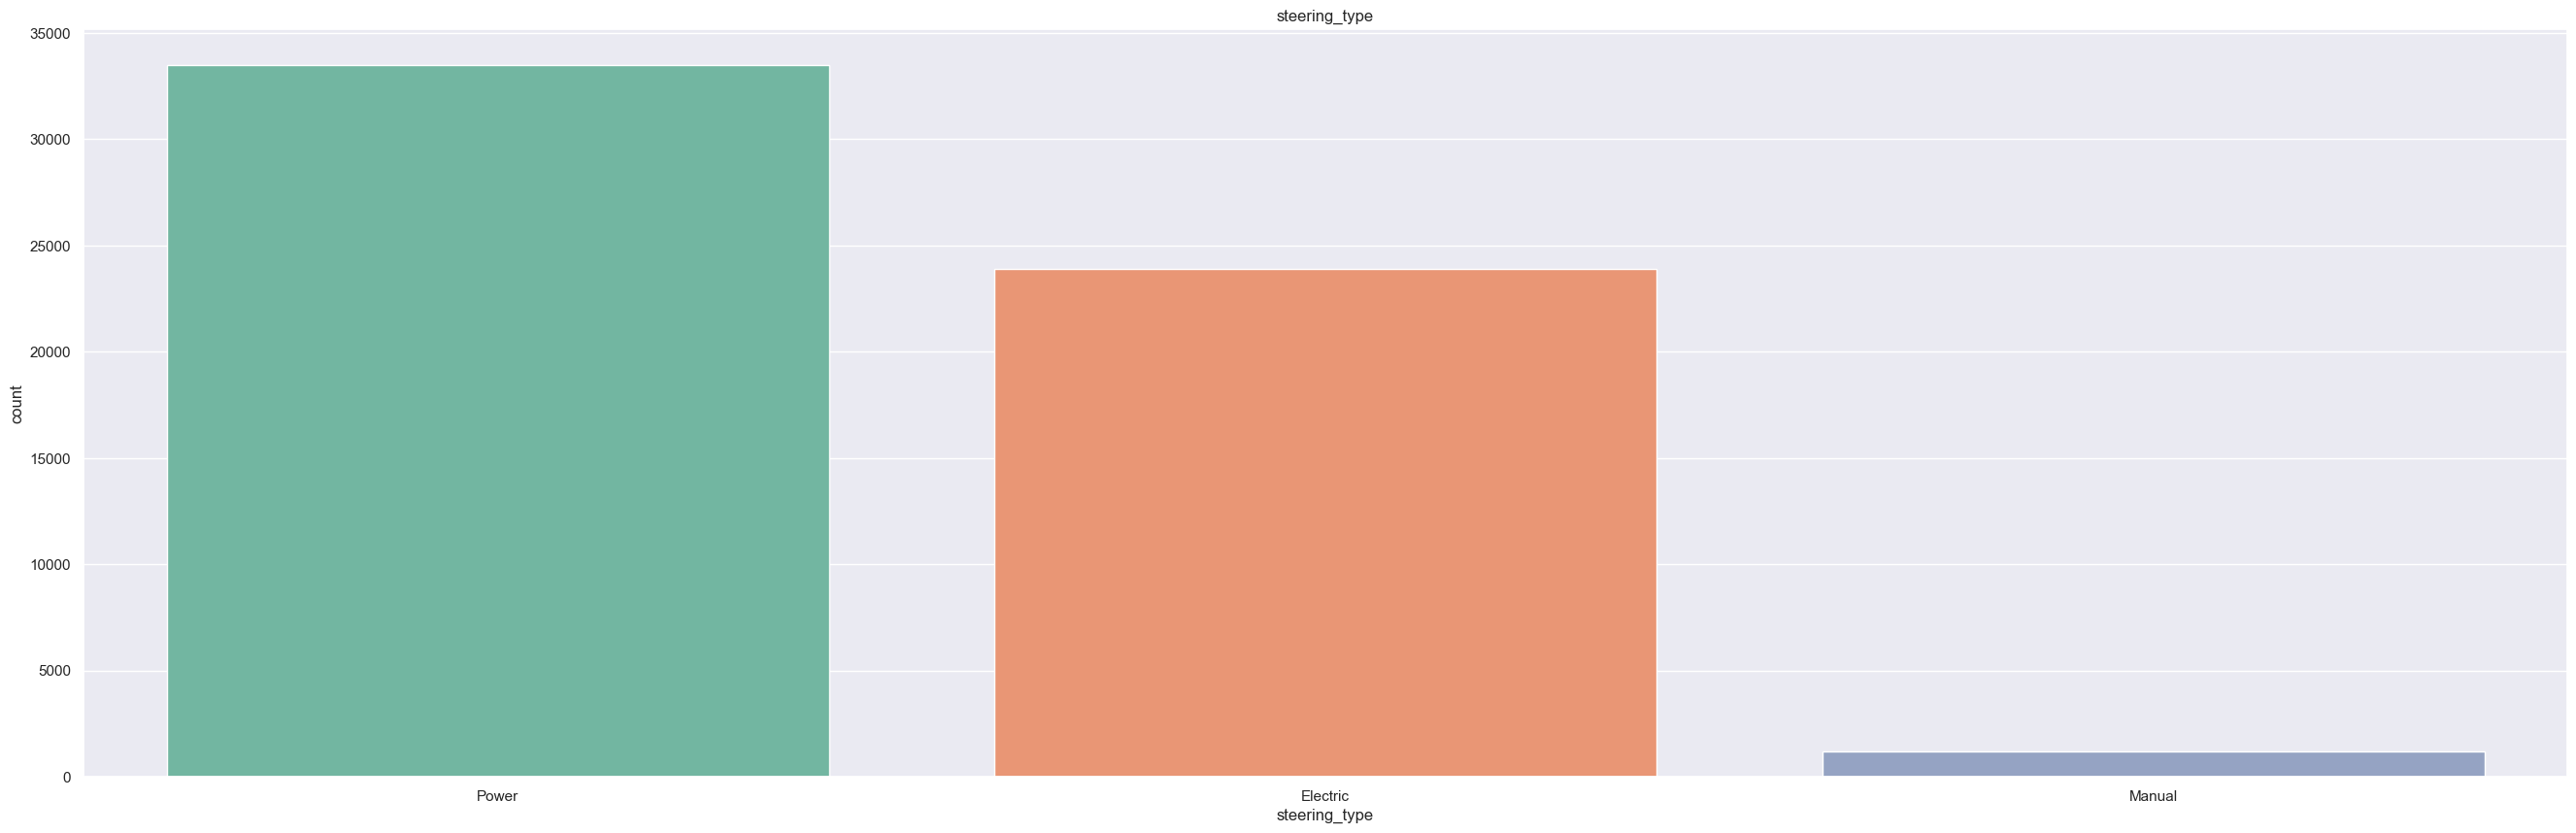

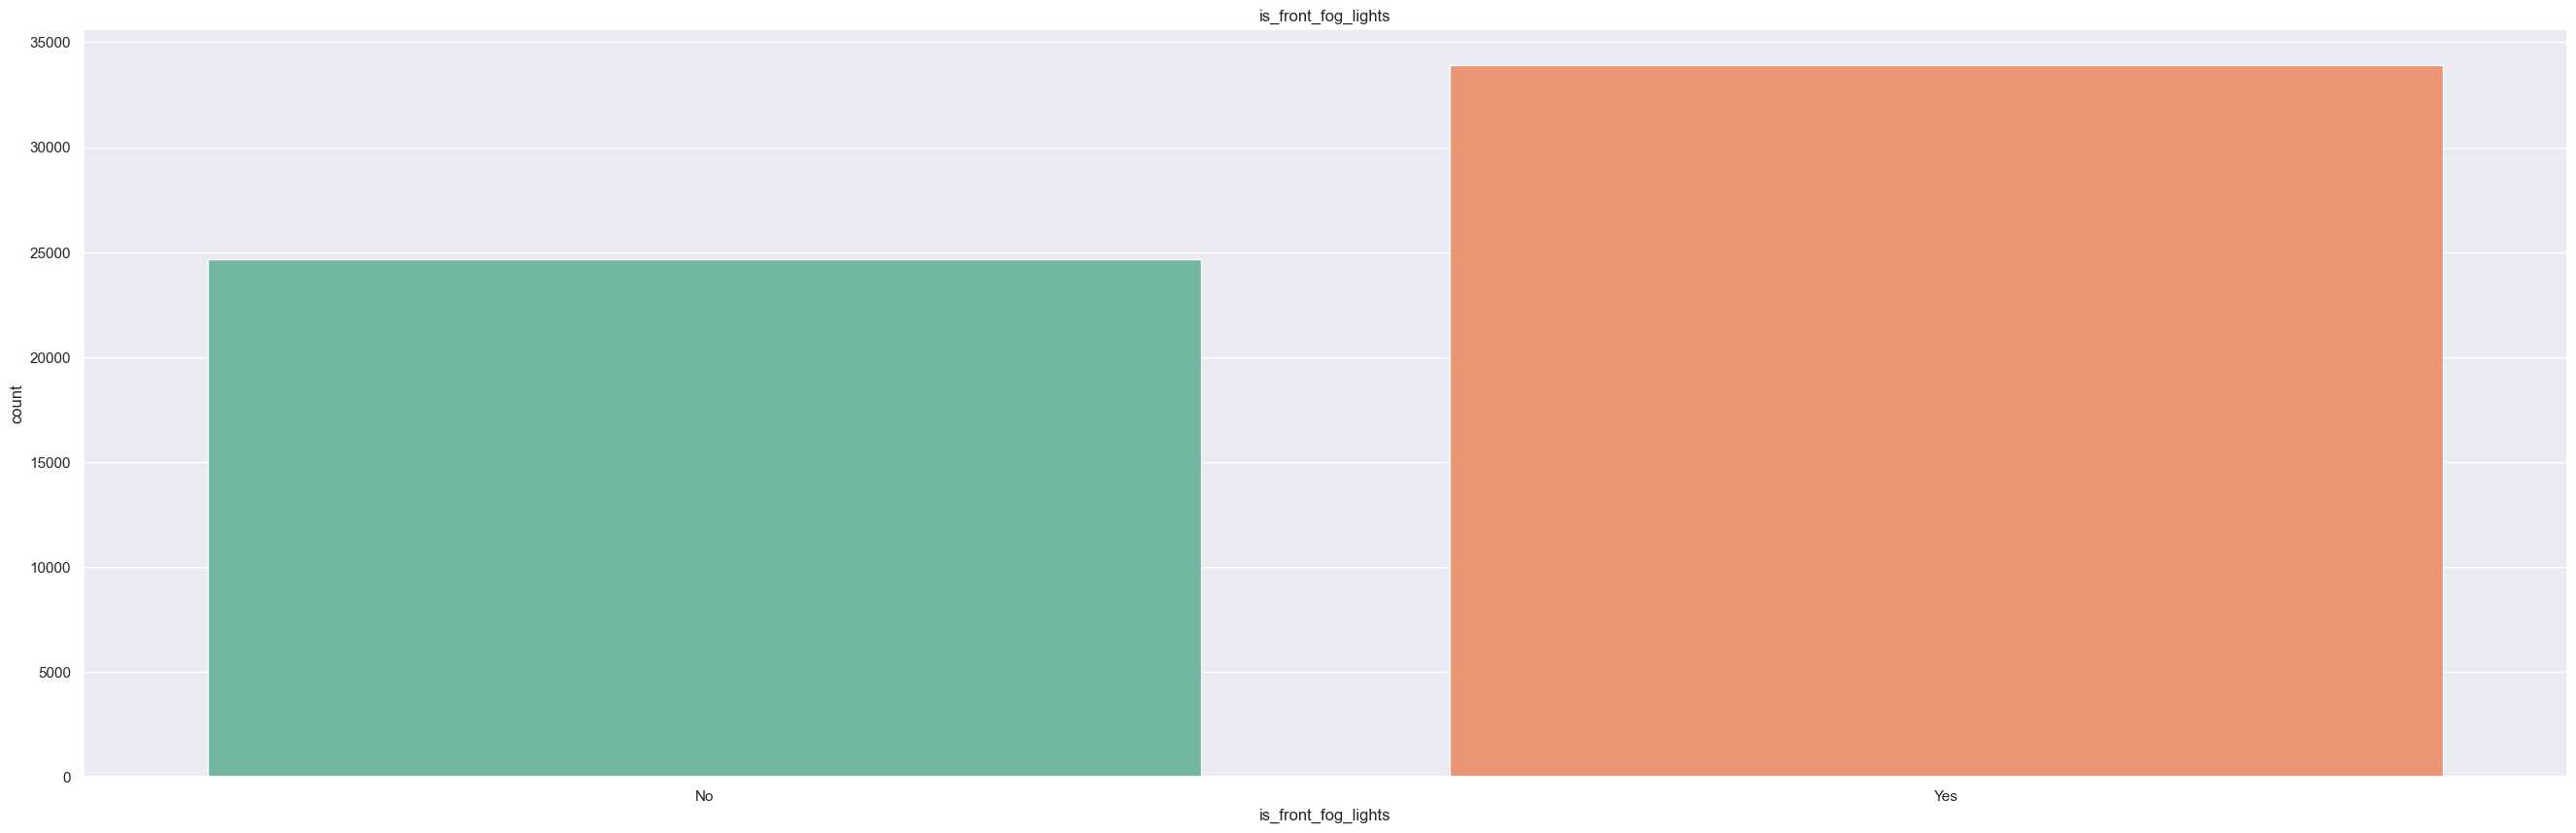

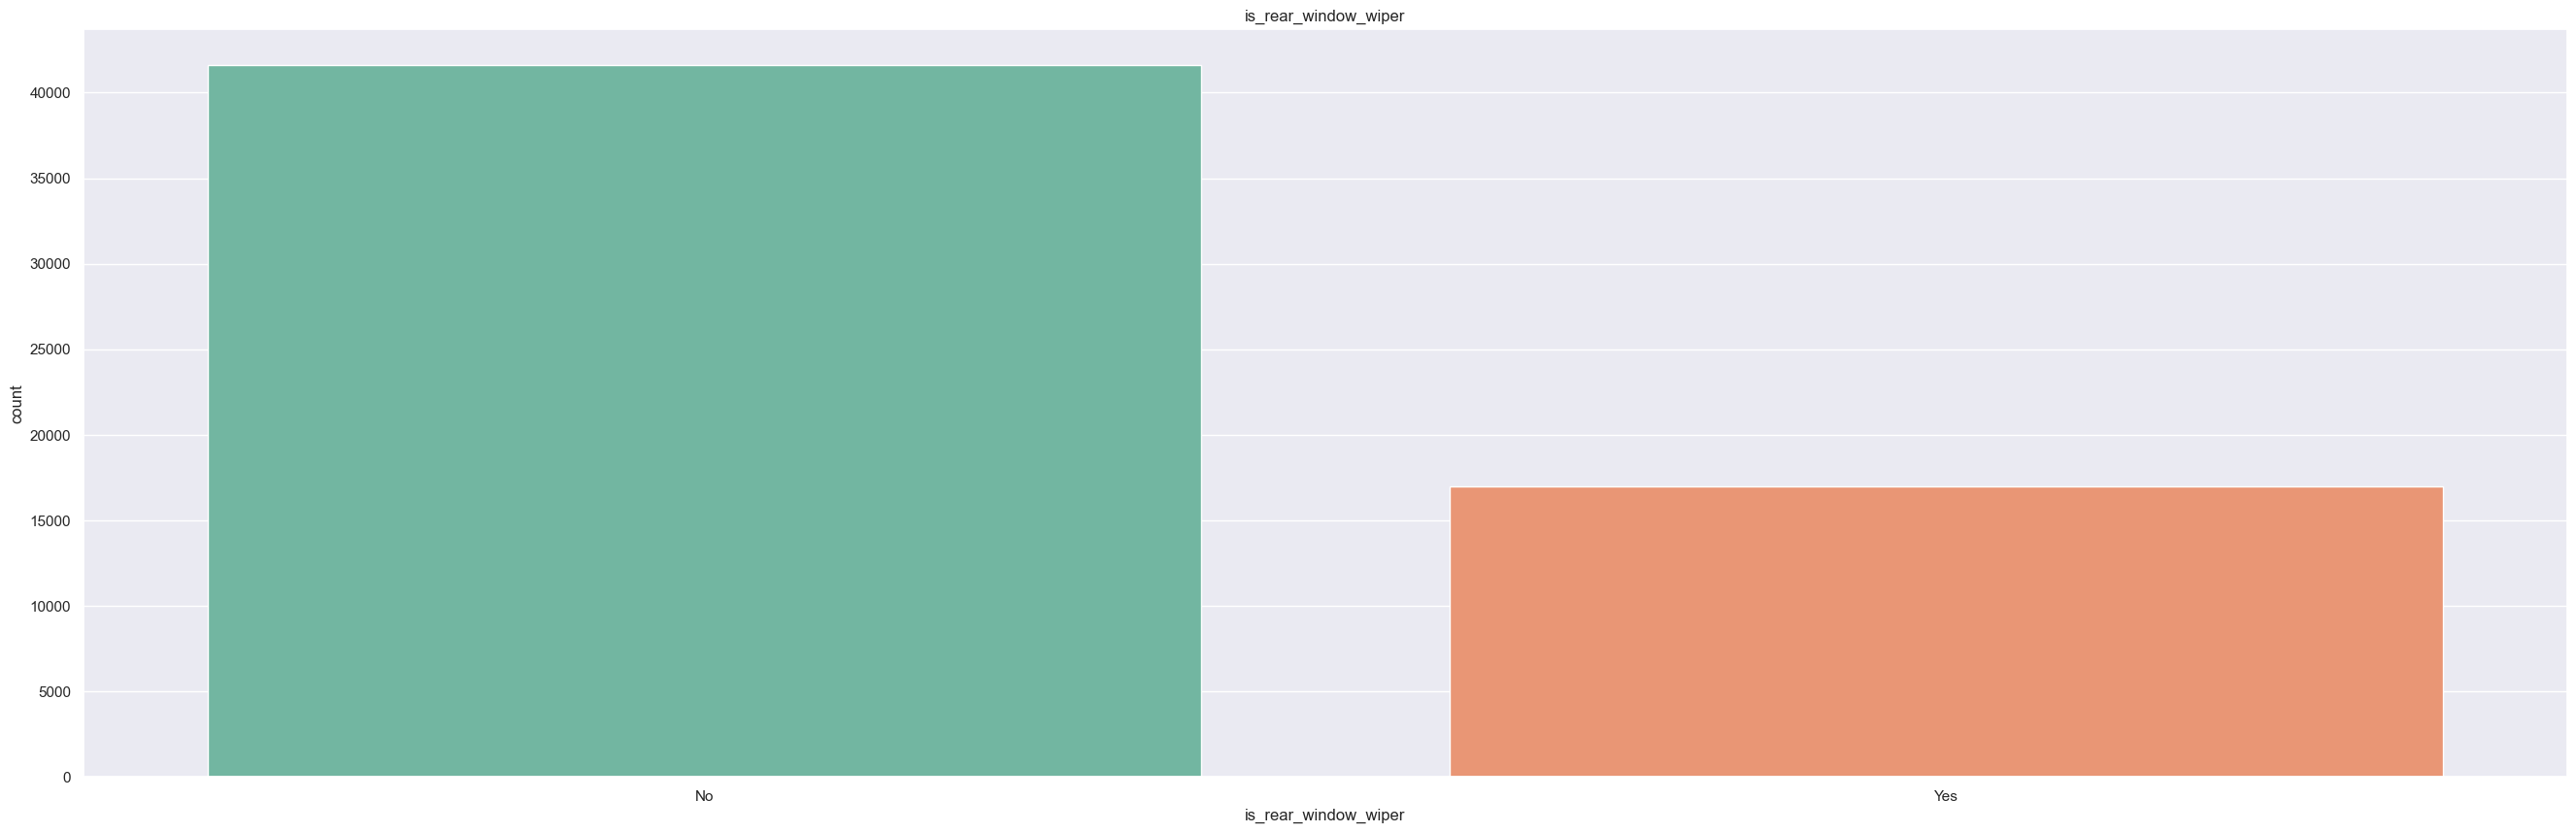

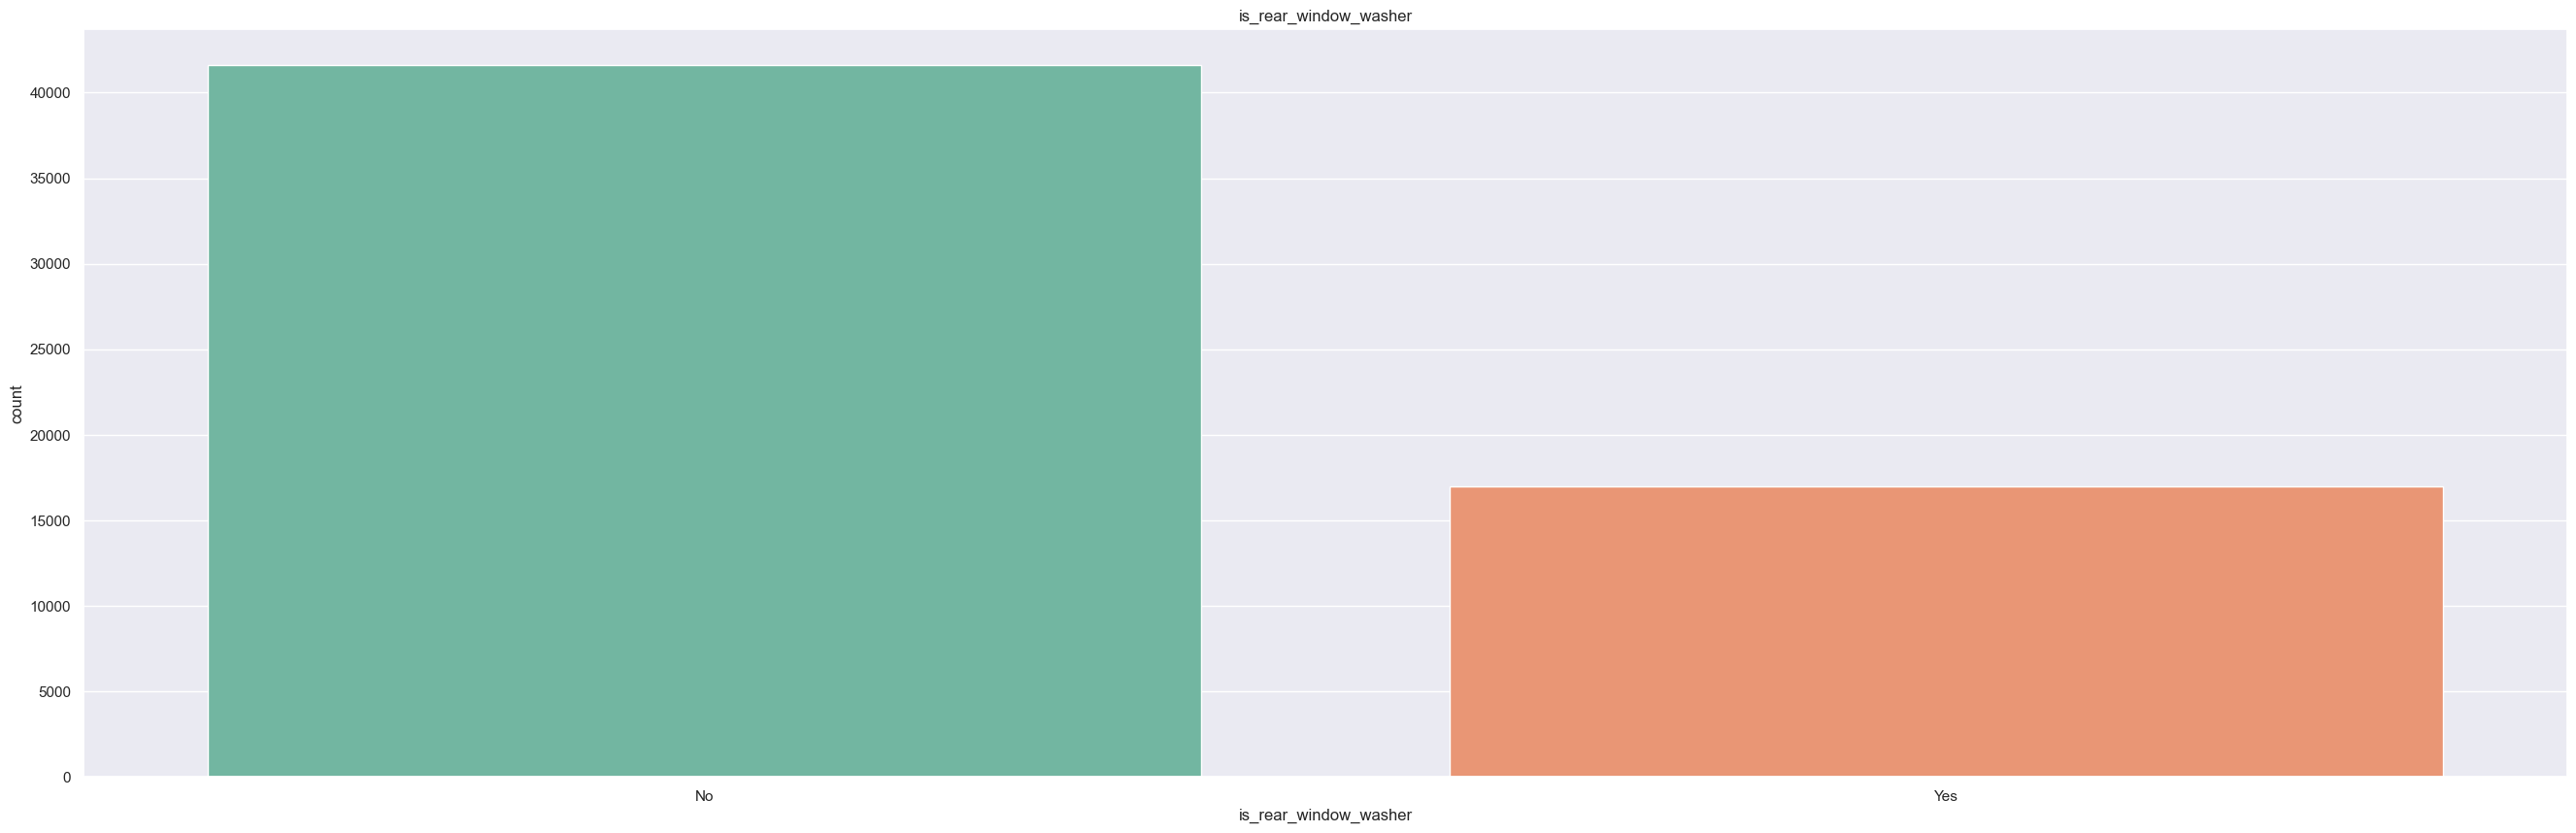

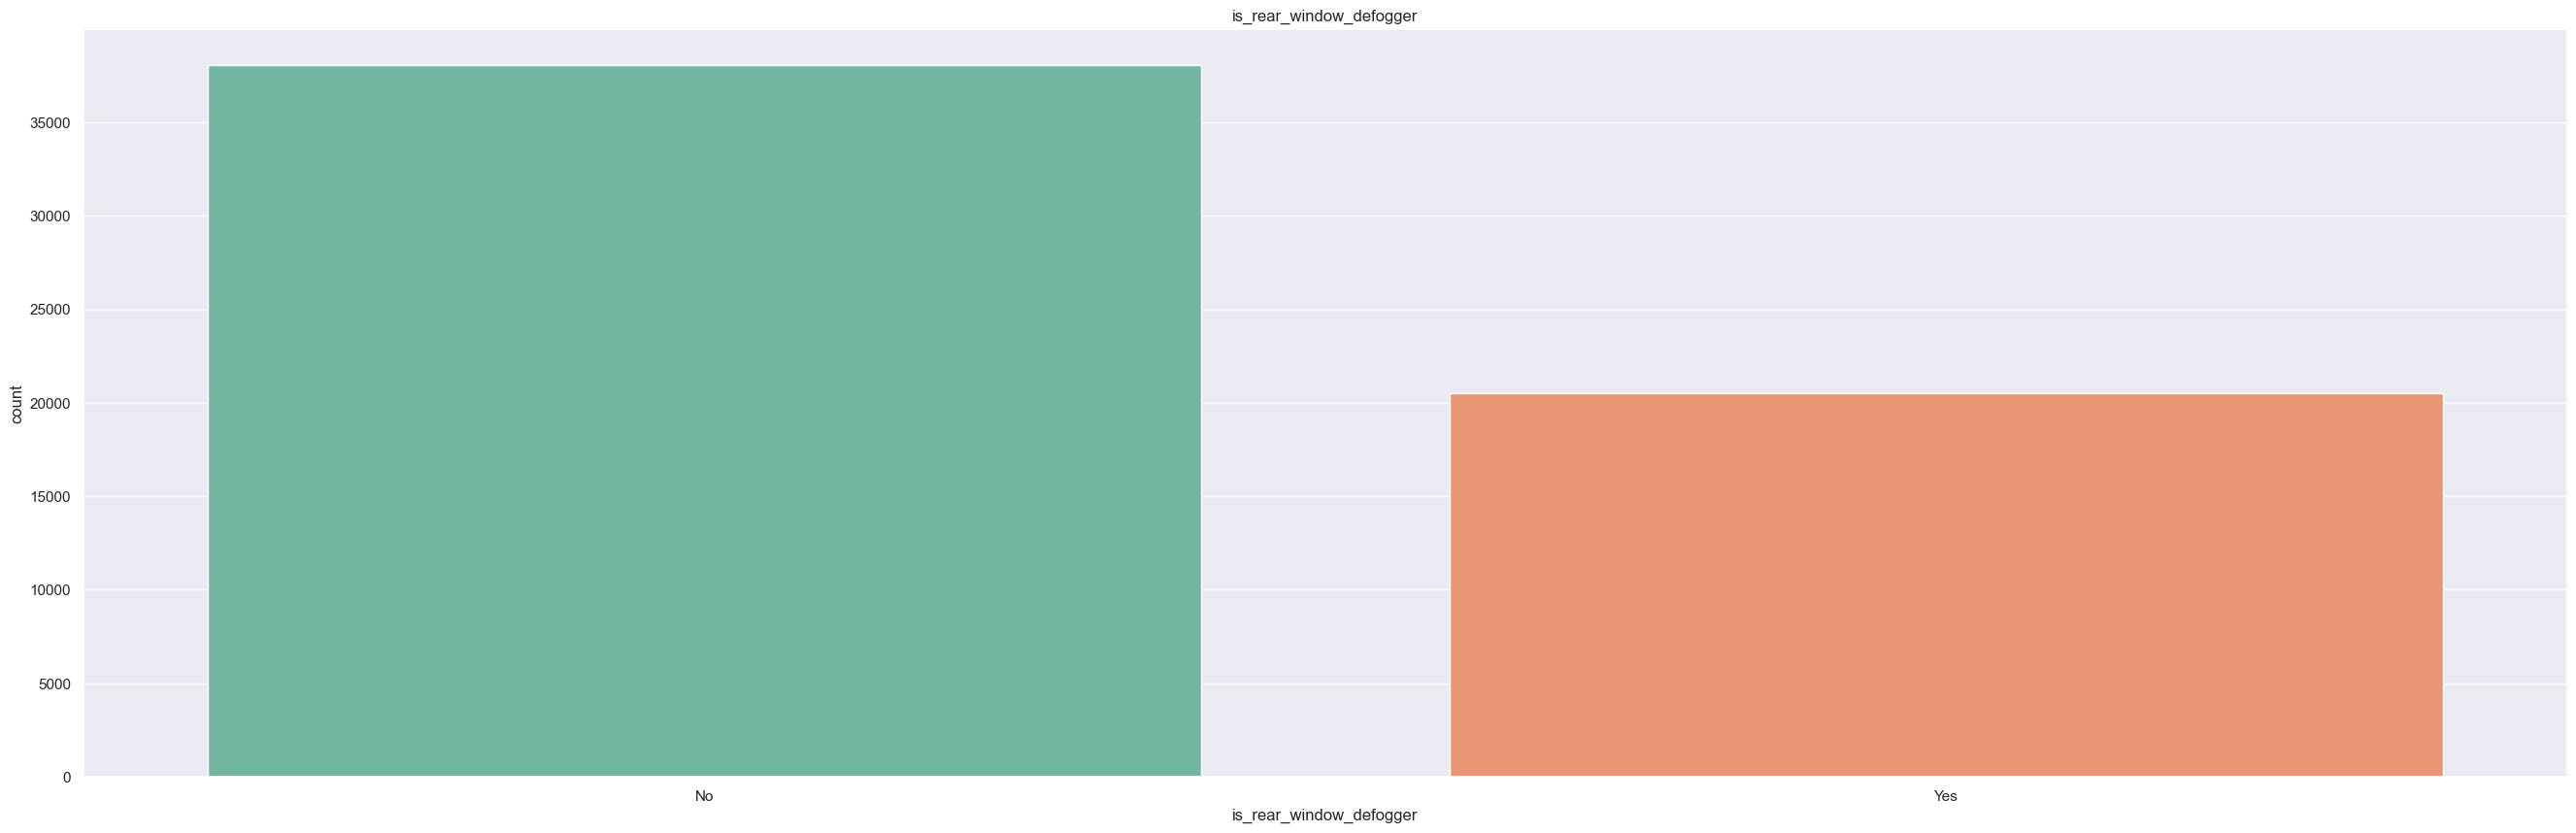

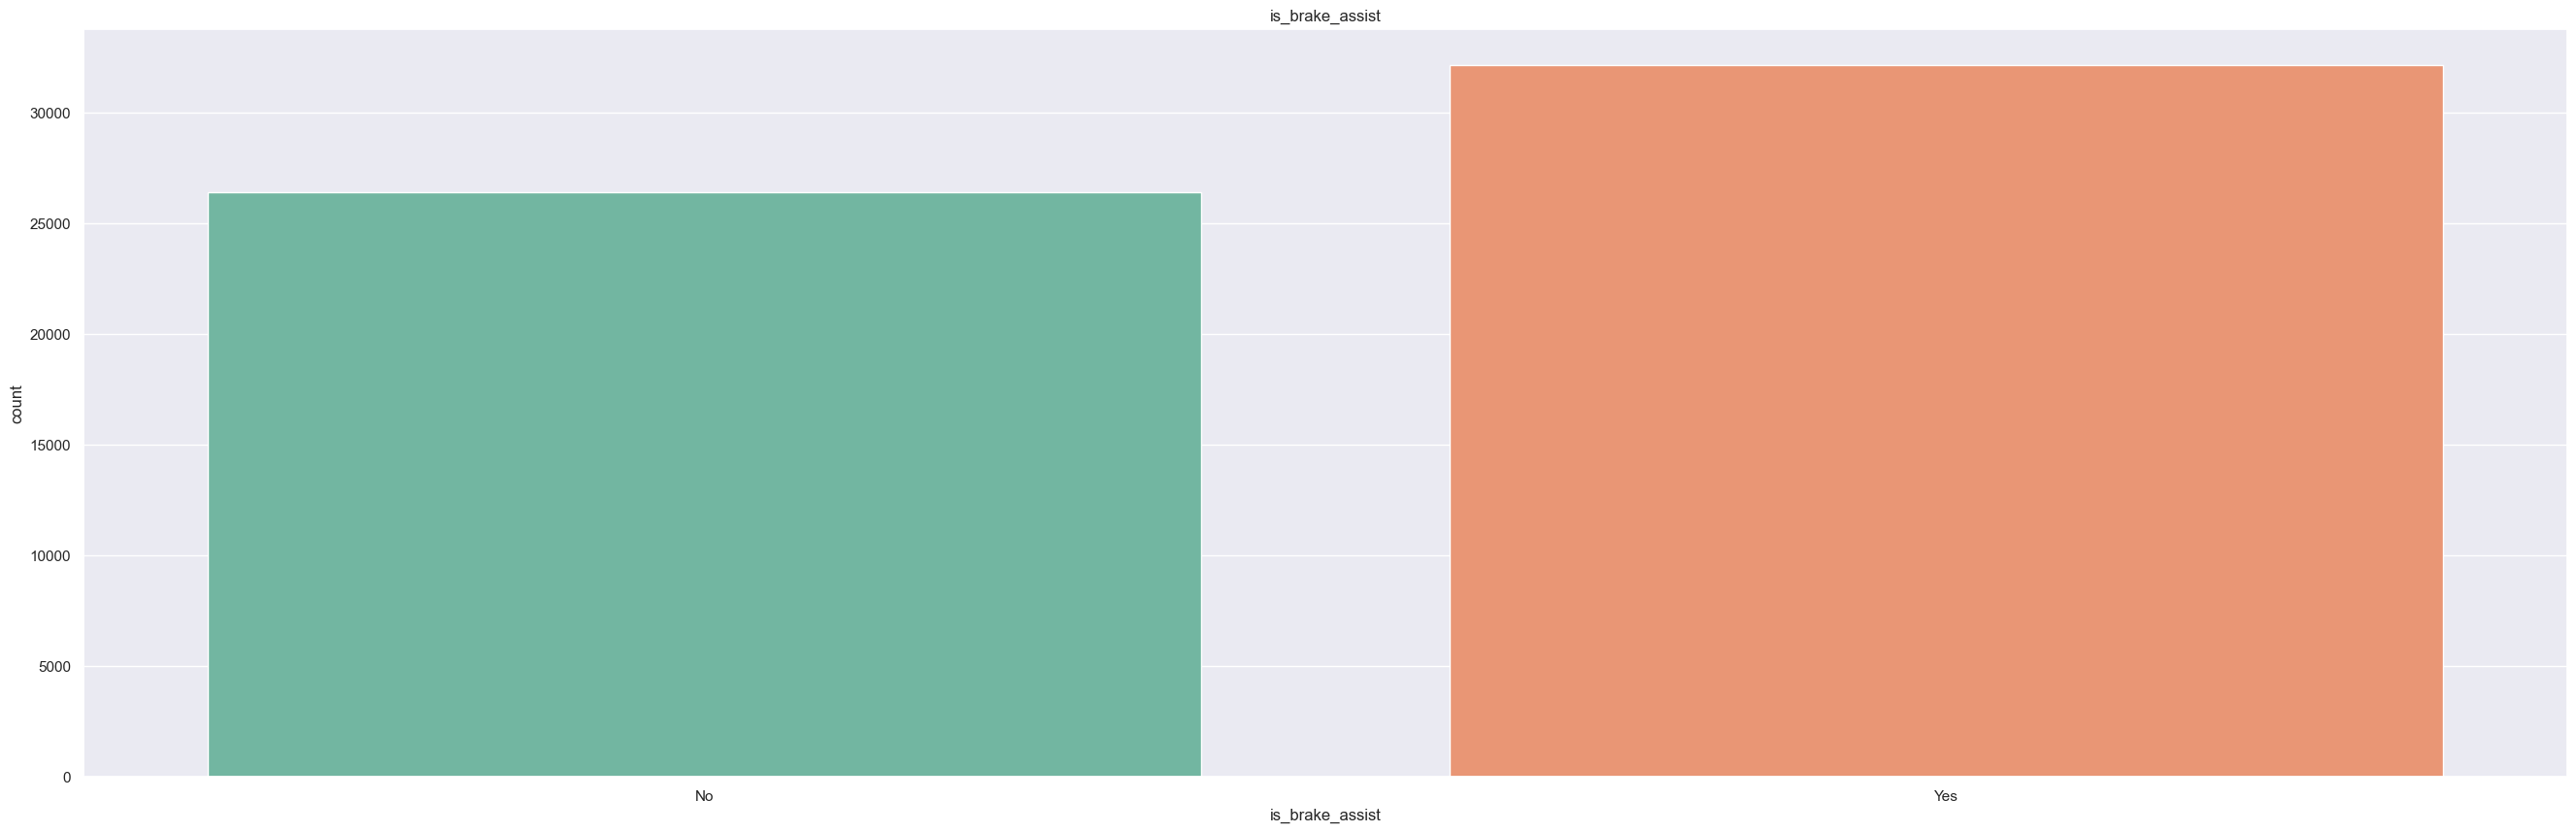

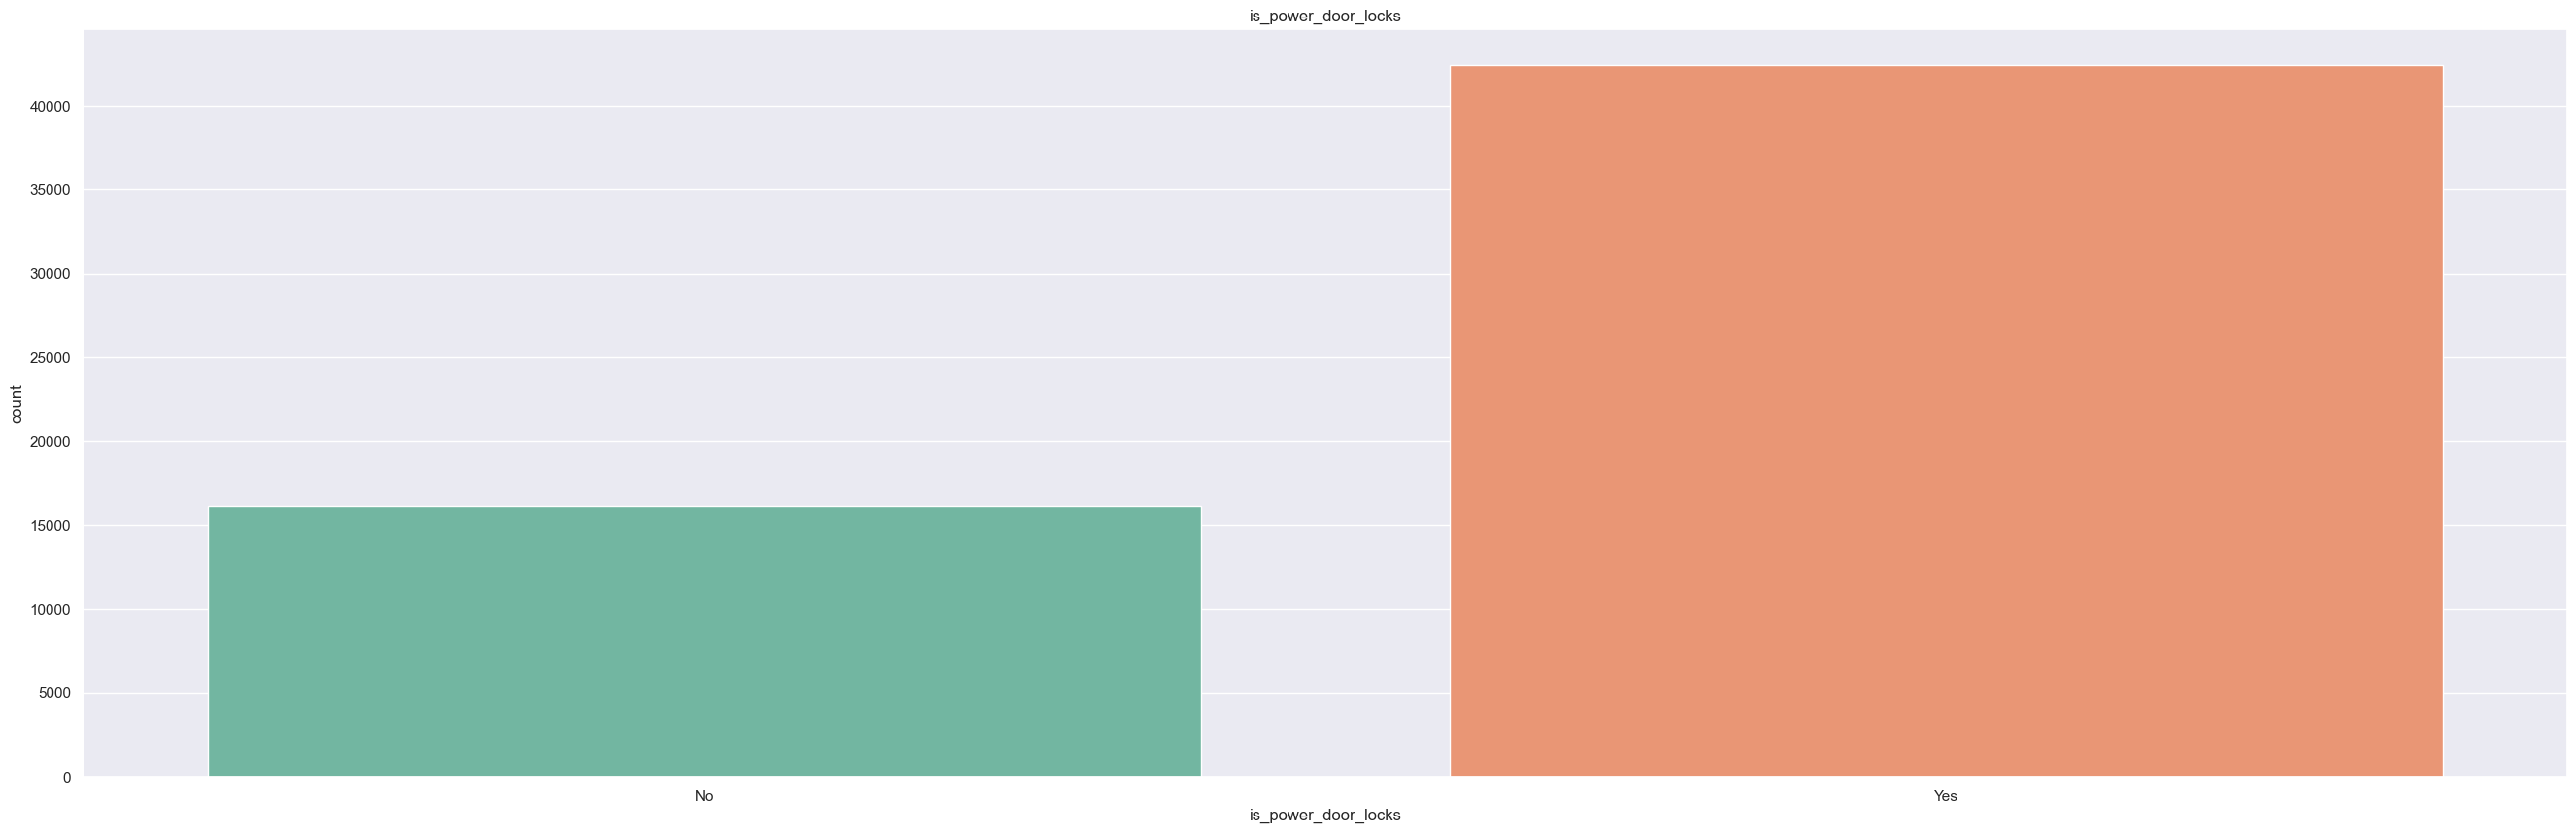

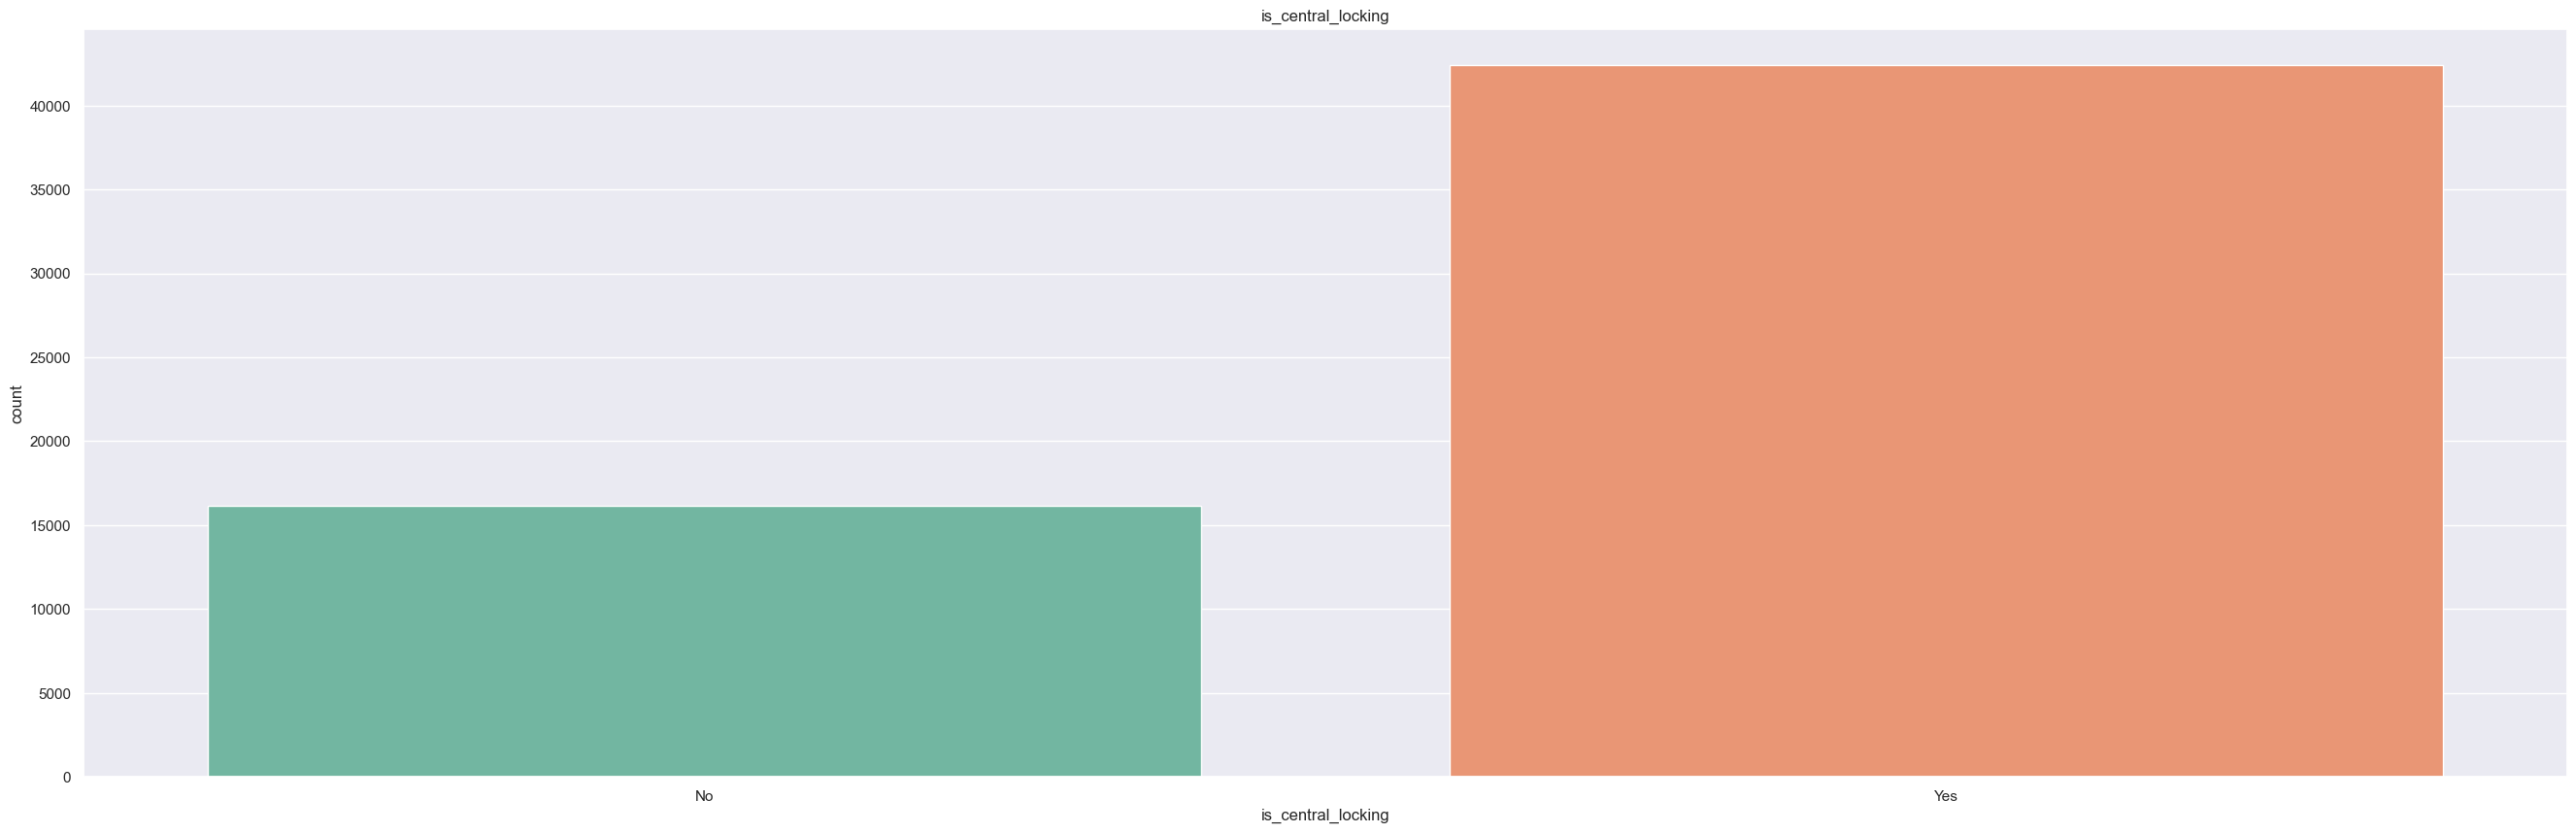

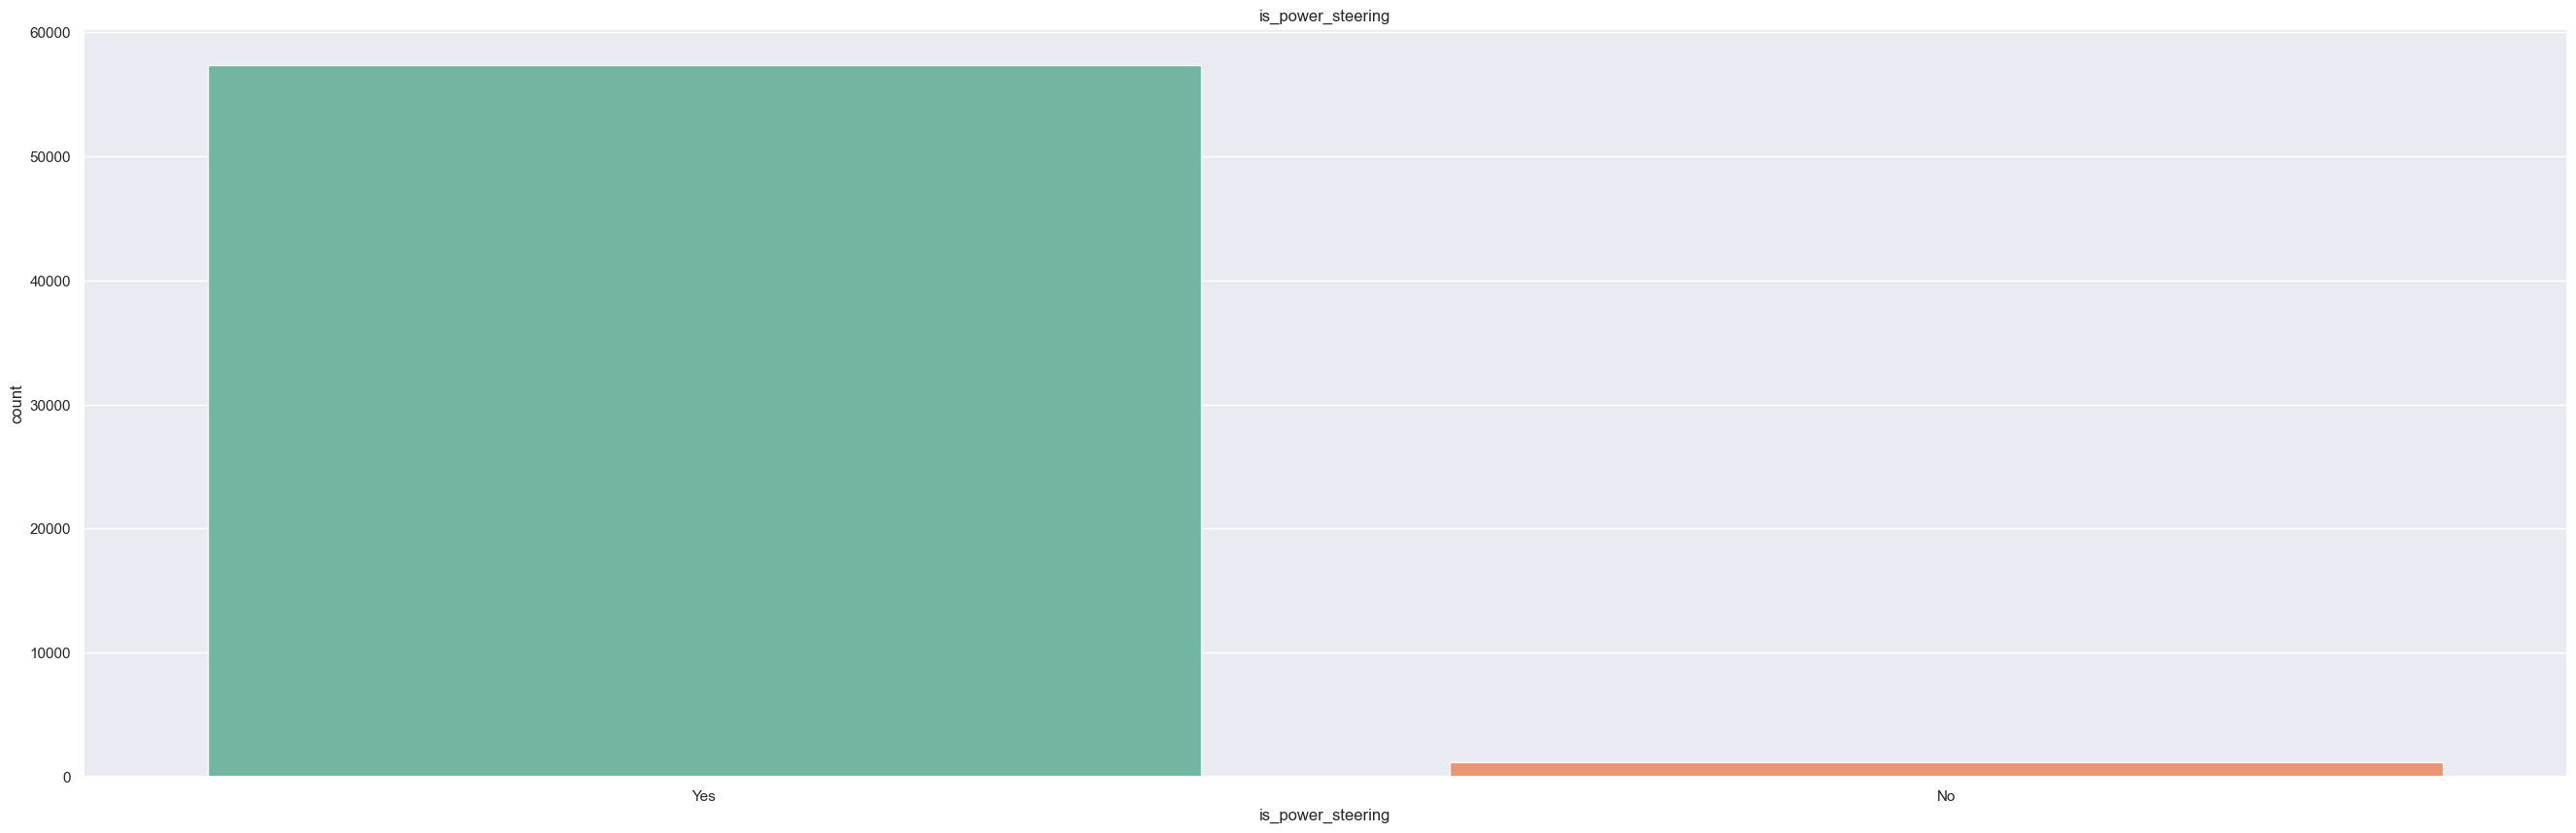

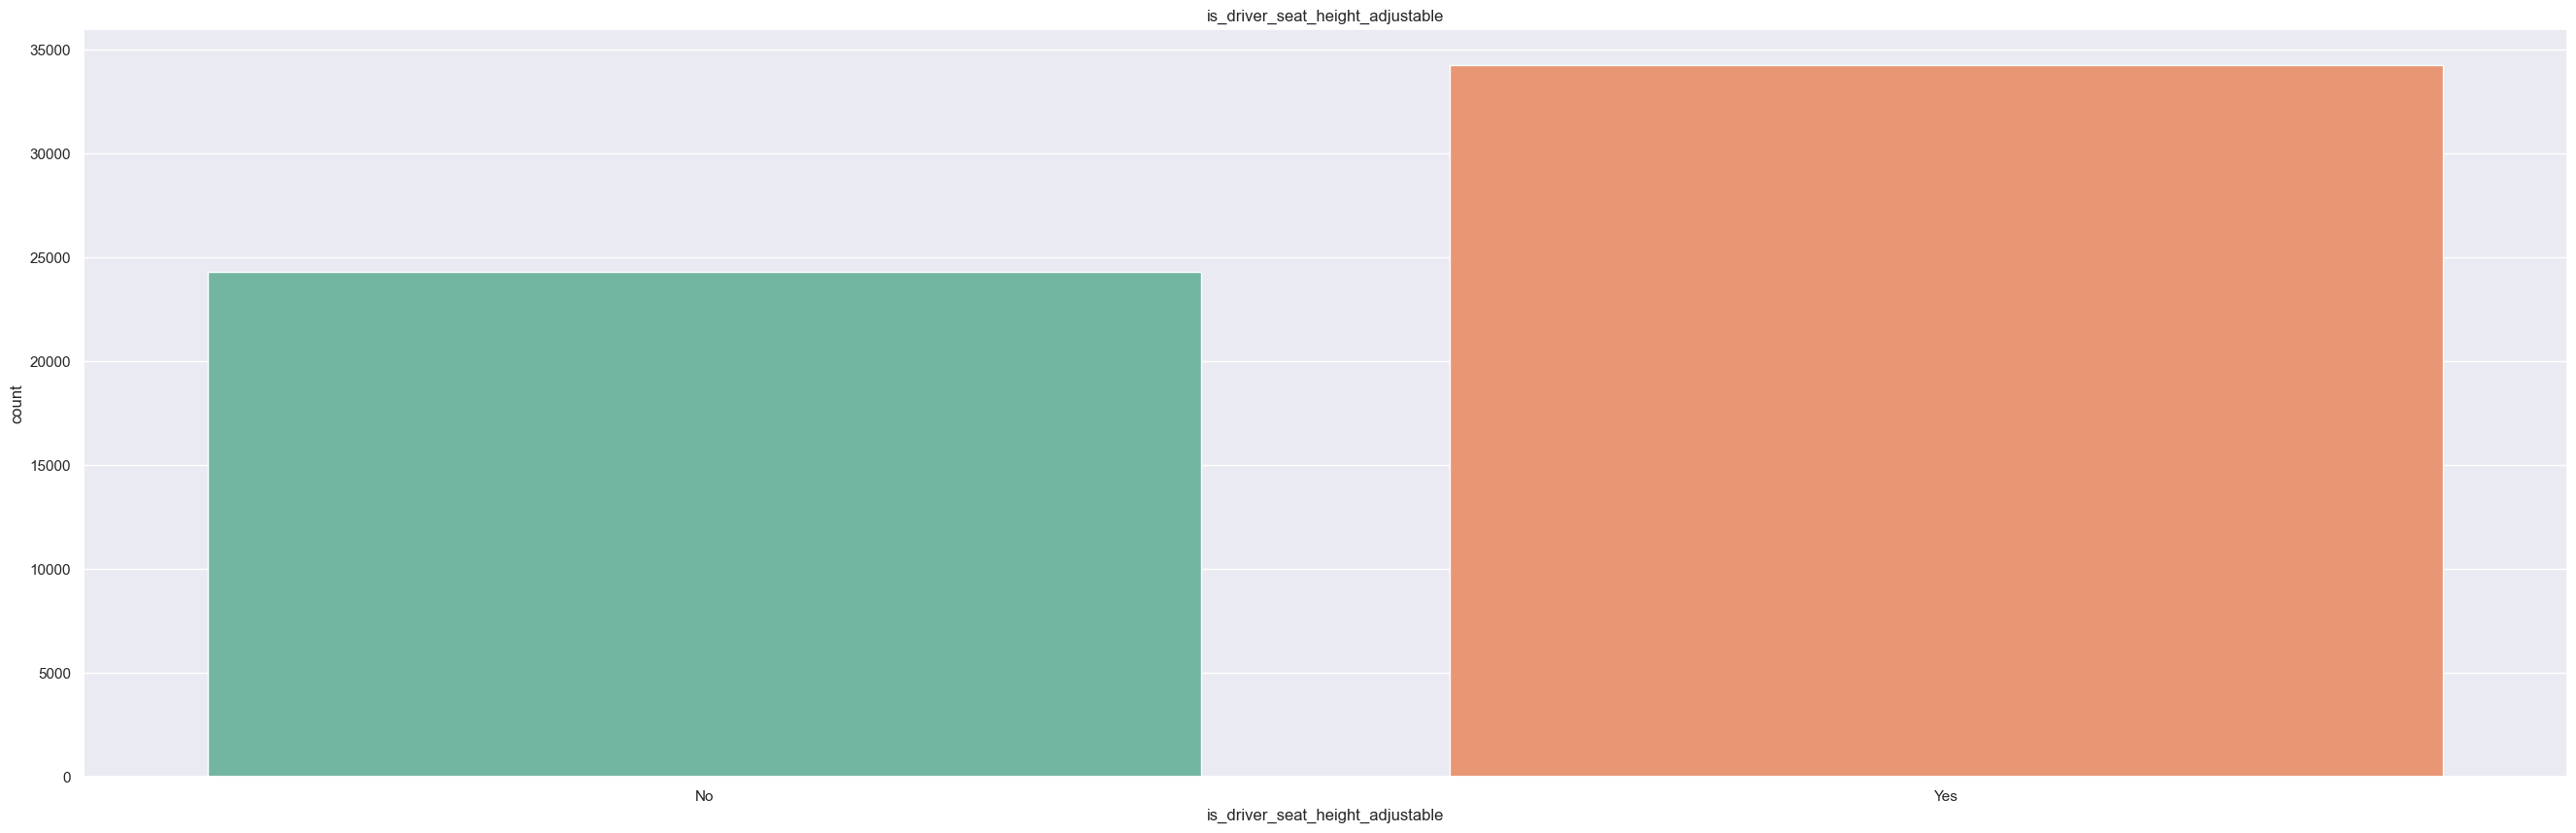

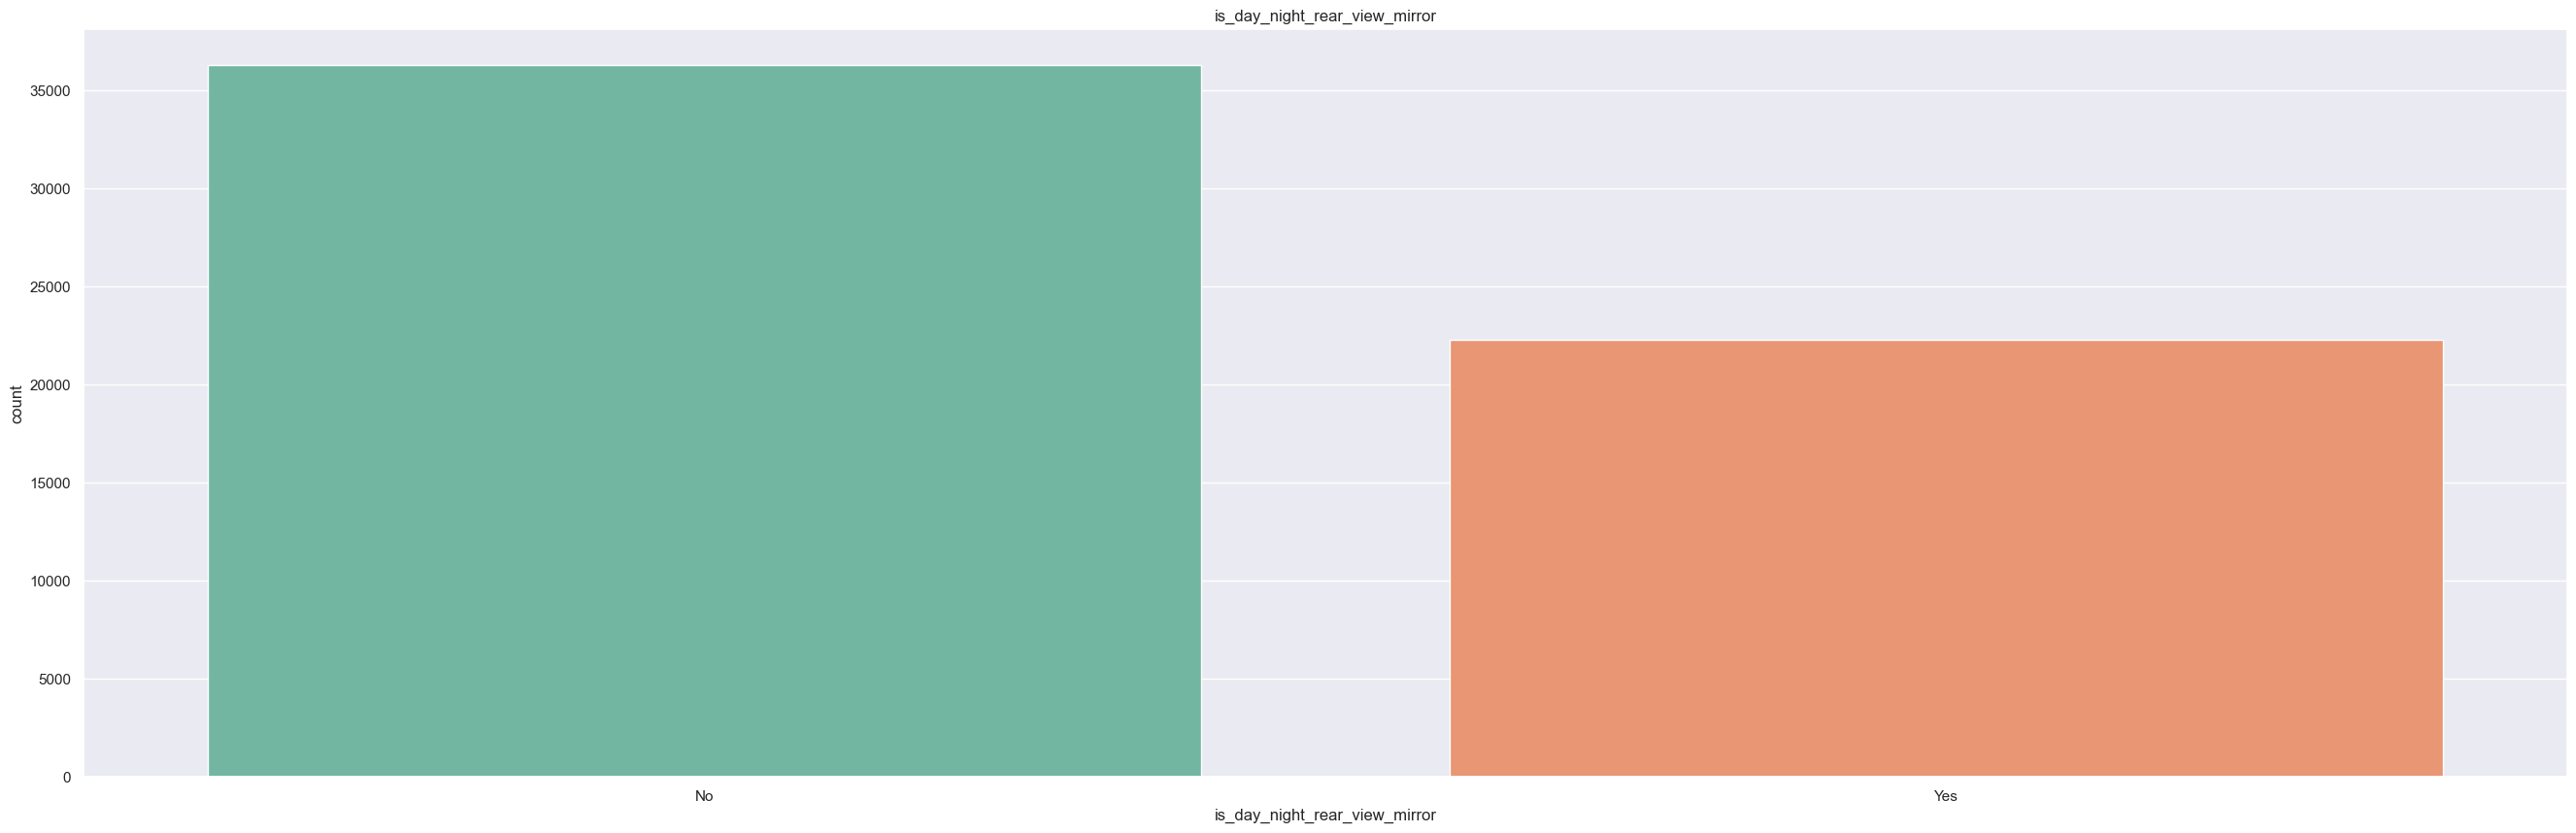

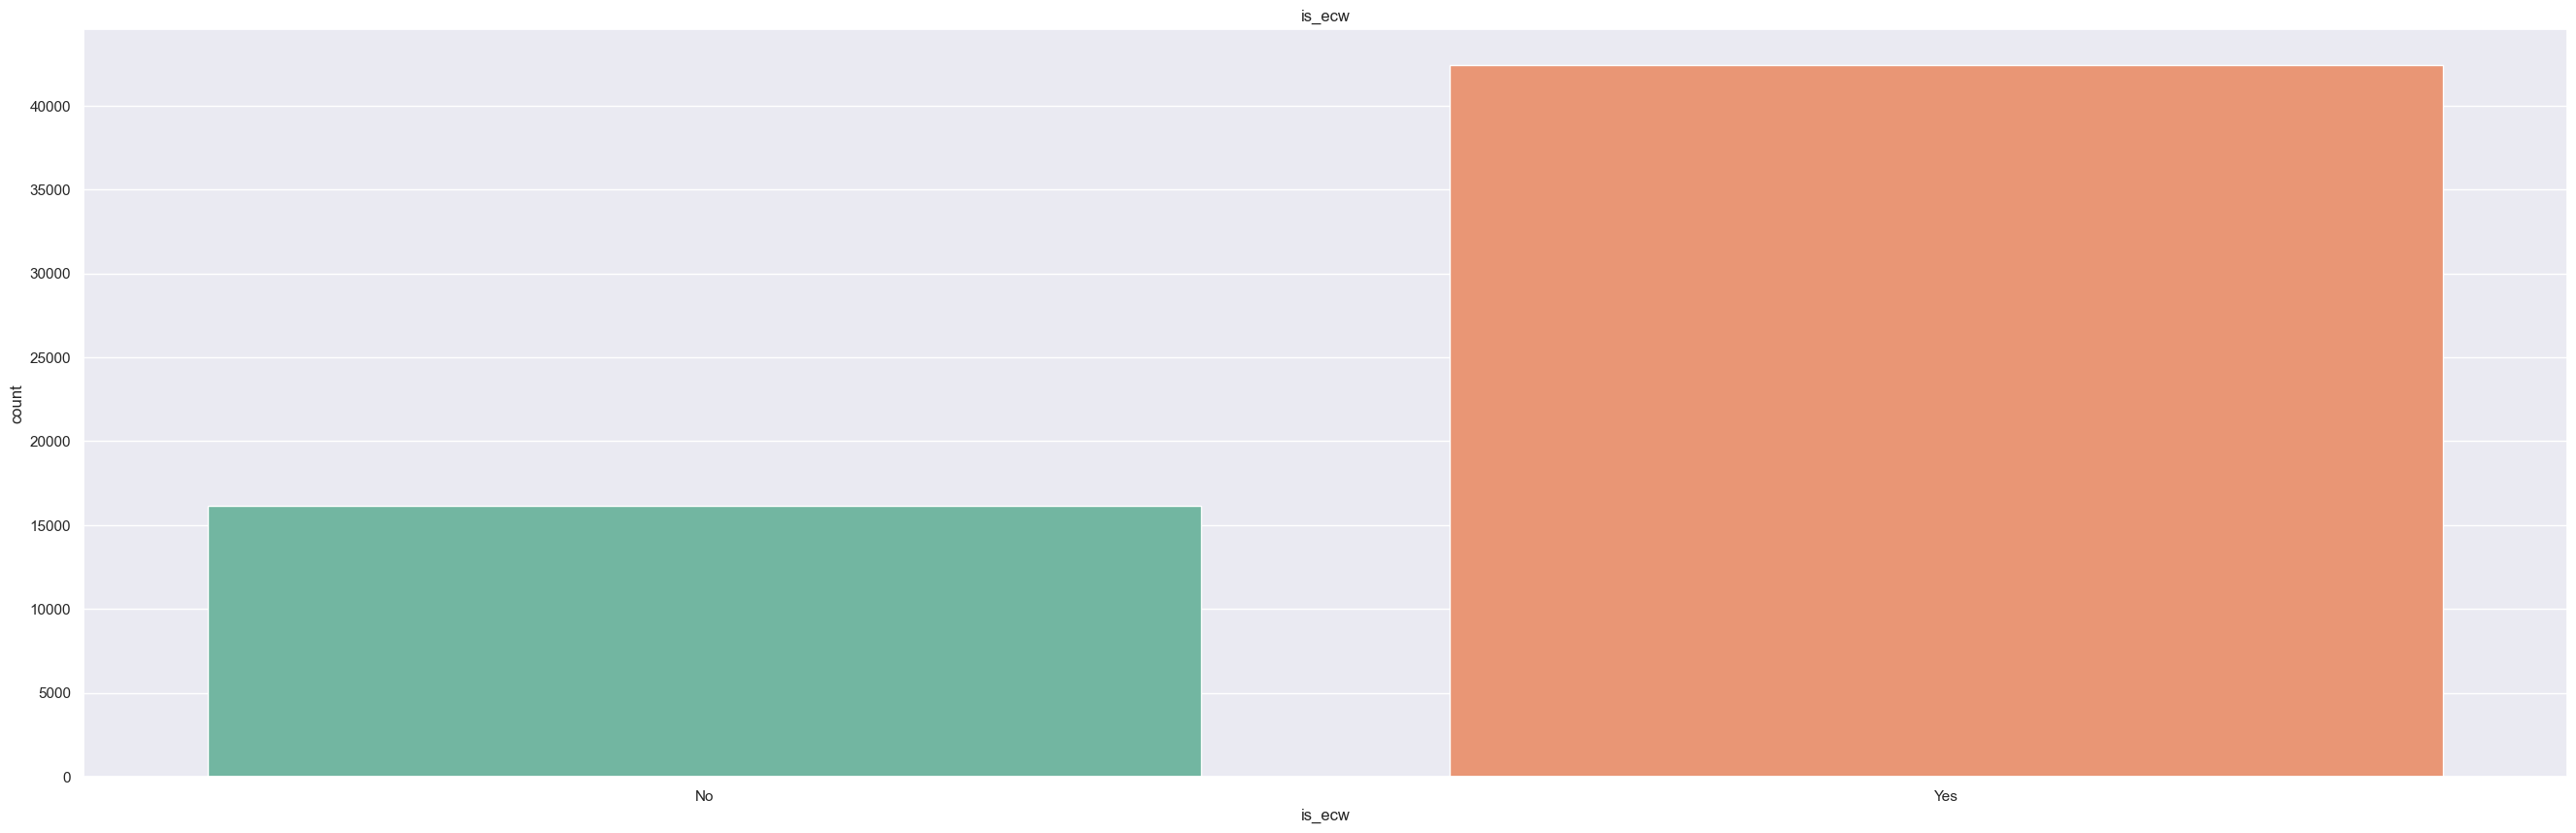

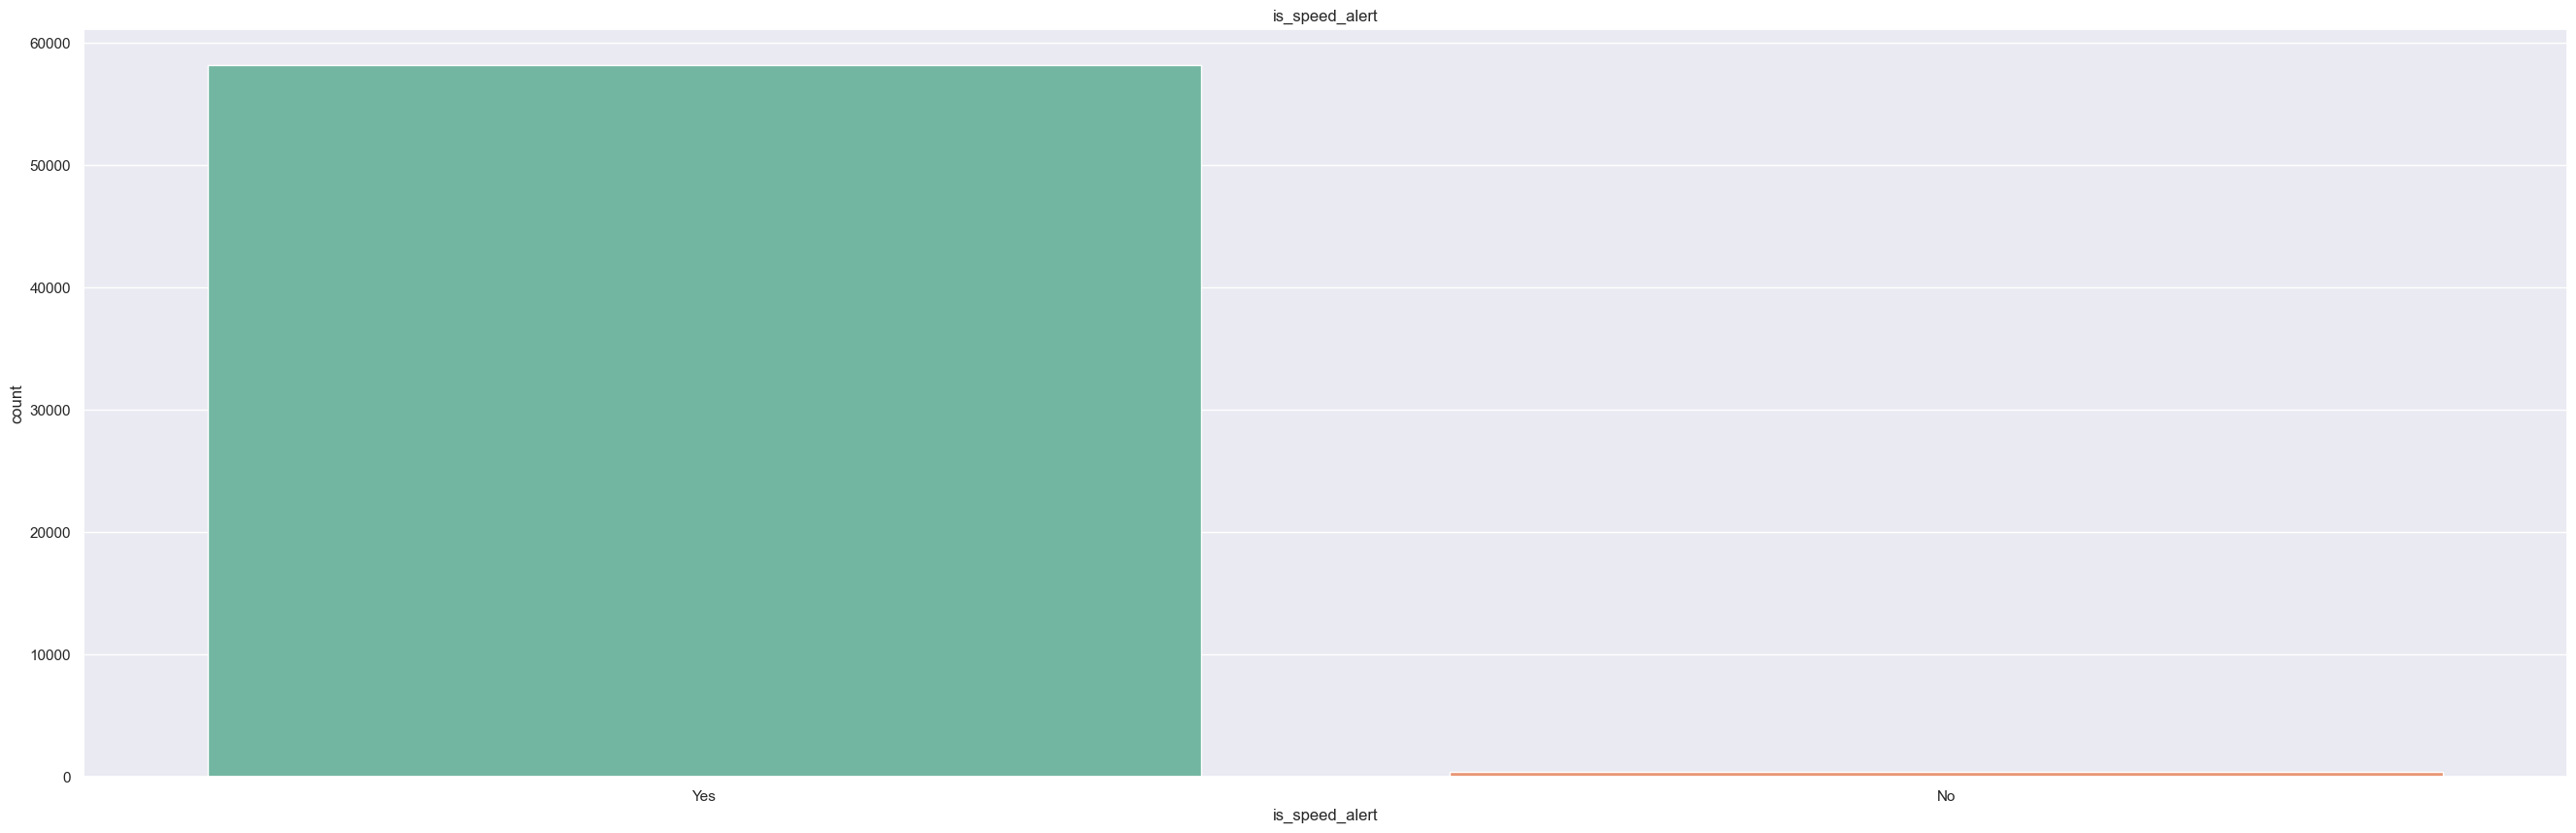

In [23]:
for i in categorical:
    
    plt.figure(figsize=(33,10))
    #plt.subplot(6,5,1)
    sns.countplot(x=i,data=car_in,palette='Set2')
    plt.title(i)
   # plt.rotate(45)

Bivariate Analysis---

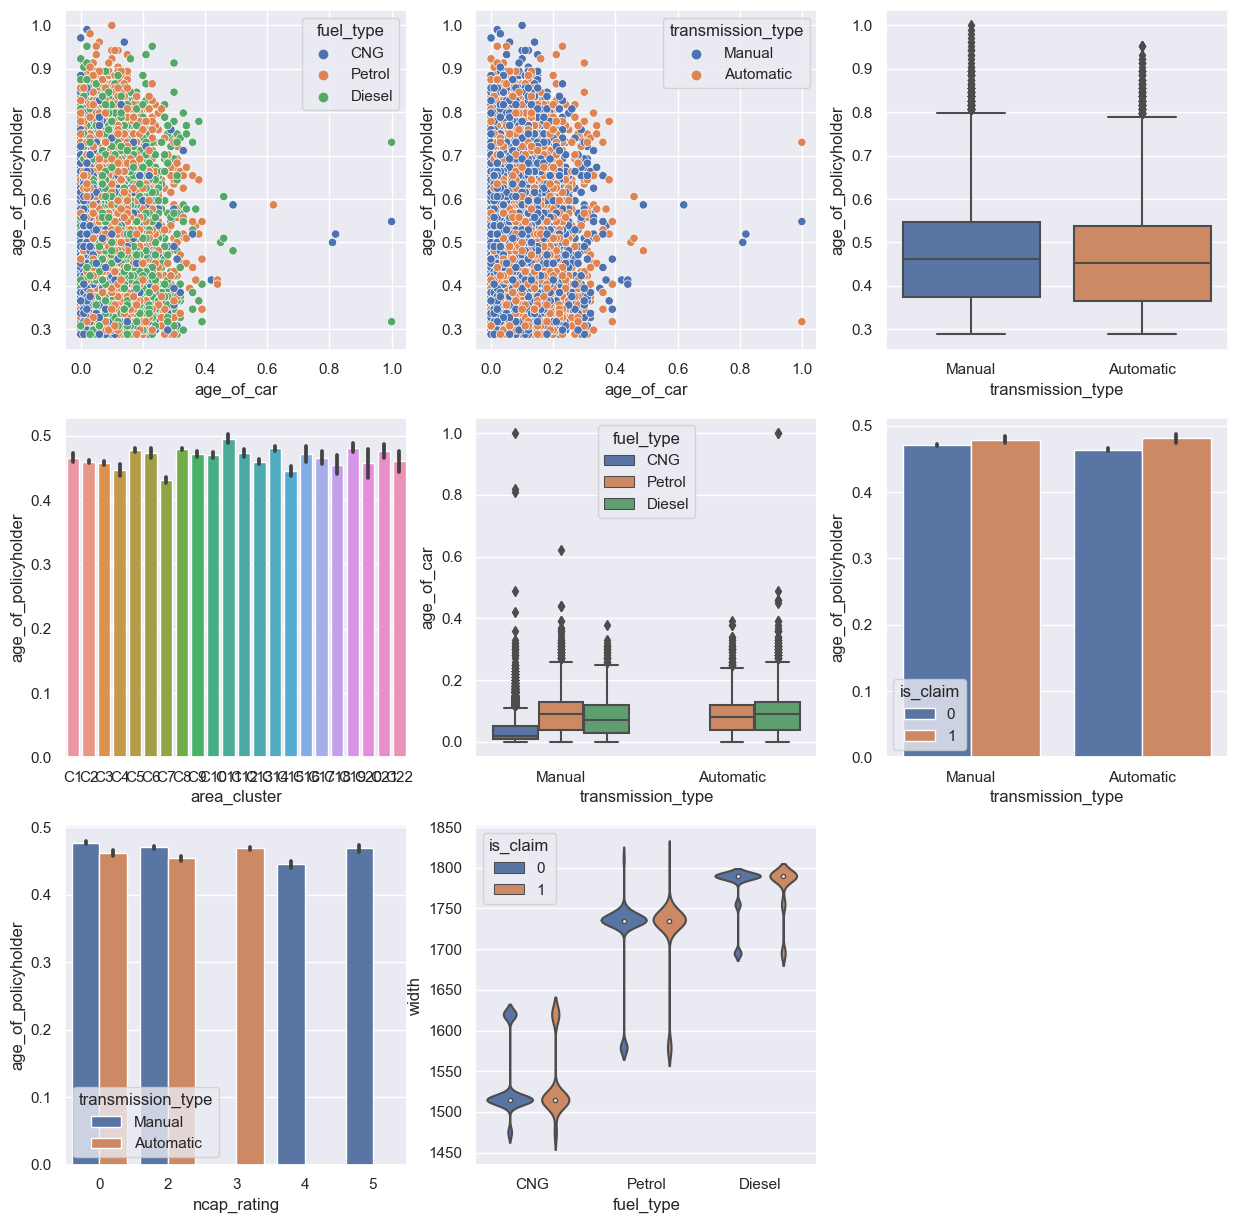

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age_of_car',y ='age_of_policyholder',hue="fuel_type",data = car_in)
plt.subplot(3,3,2)
sns.scatterplot(x="age_of_car",y="age_of_policyholder",hue="transmission_type",data=car_in)
plt.subplot(3,3,3)
sns.boxplot(x="transmission_type",y="age_of_policyholder",data=car_in)
plt.subplot(3,3,4)
sns.barplot(x="area_cluster",y="age_of_policyholder",data=car_in)
plt.subplot(3,3,5)
sns.boxplot(x="transmission_type",y="age_of_car",hue="fuel_type",data=car_in)
plt.subplot(3,3,6)
sns.barplot(x="transmission_type",y="age_of_policyholder",hue="is_claim",data=car_in)
plt.subplot(3,3,7)
sns.barplot(x="ncap_rating",y="age_of_policyholder",hue="transmission_type",data=car_in)
#plt.subplot(3,3,8)
#sns.barplot(x='age_of_policyholder',y='policy_tenure',hue='is_claim',data=car_in)
plt.subplot(3,3,8)
sns.violinplot(x="fuel_type",y="width",hue="is_claim",data=car_in)
#plt.subplot(3,3,10)
#sns.barplot(x='policy_tenure',y='age_of_policyholder',hue='is_claim',data=car_in)
plt.show()

<Figure size 3000x1200 with 0 Axes>

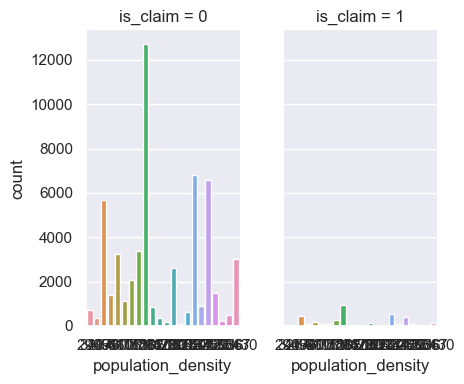

In [25]:
plt.figure(figsize=(30,12))
sns.catplot(
    data=car_in, y=None, x="population_density", col="is_claim",
    kind="count", height=4, aspect=.6,
)

In [26]:
lls=['area_cluster', 'population_density', 'segment',
       'fuel_type', 'engine_type', 'airbags','rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight','ncap_rating']

<Figure size 2500x200 with 0 Axes>

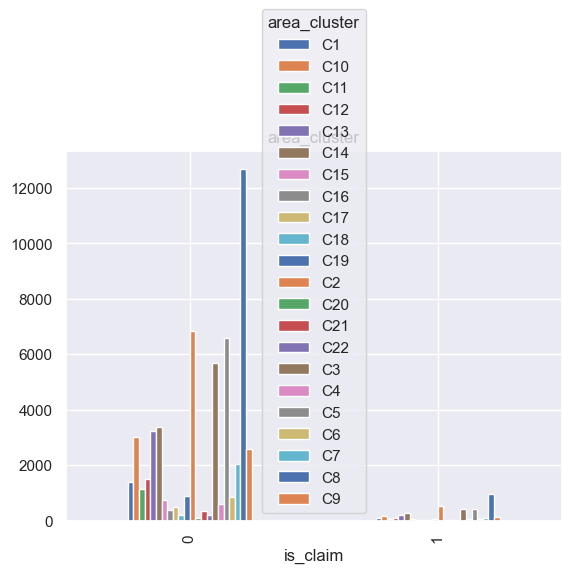

<Figure size 2500x200 with 0 Axes>

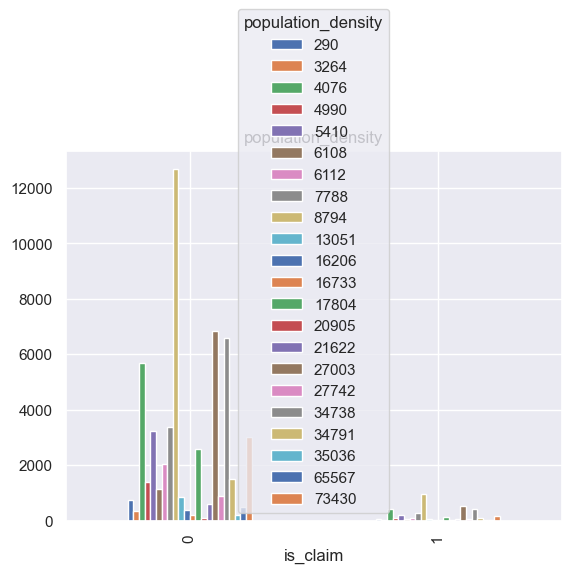

<Figure size 2500x200 with 0 Axes>

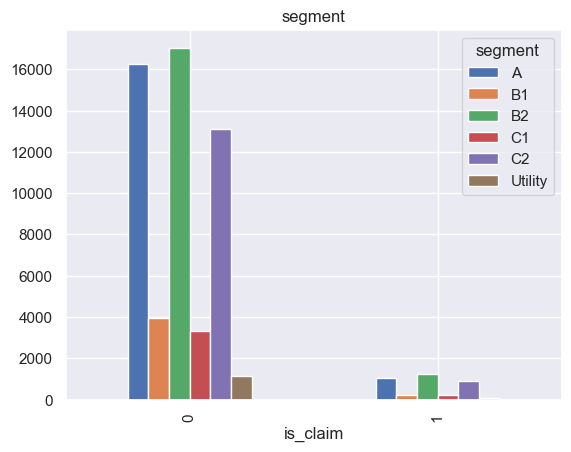

<Figure size 2500x200 with 0 Axes>

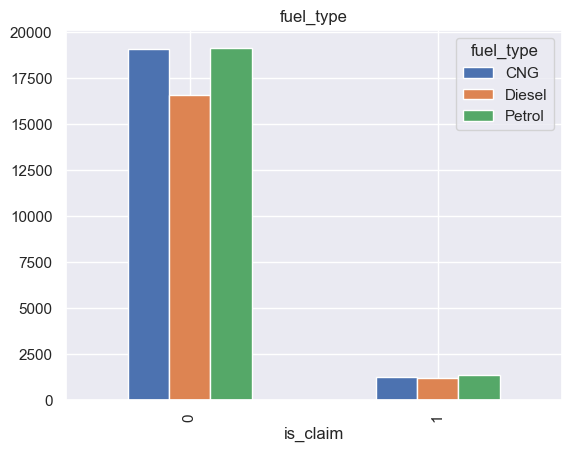

<Figure size 2500x200 with 0 Axes>

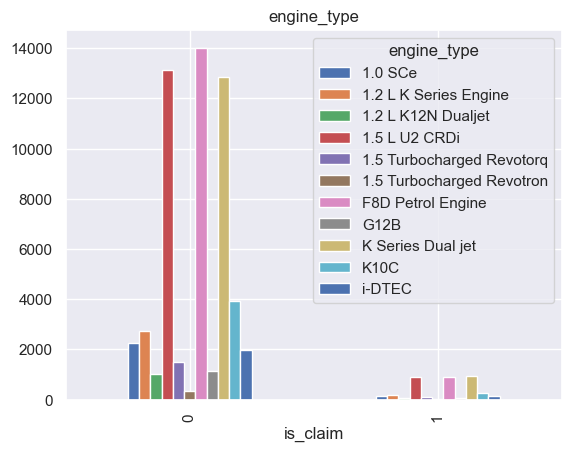

<Figure size 2500x200 with 0 Axes>

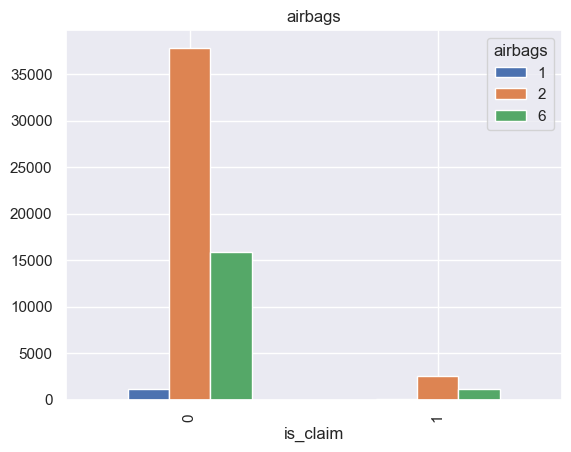

<Figure size 2500x200 with 0 Axes>

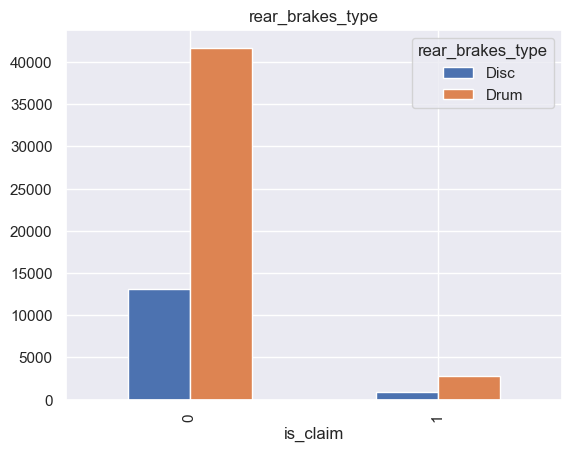

<Figure size 2500x200 with 0 Axes>

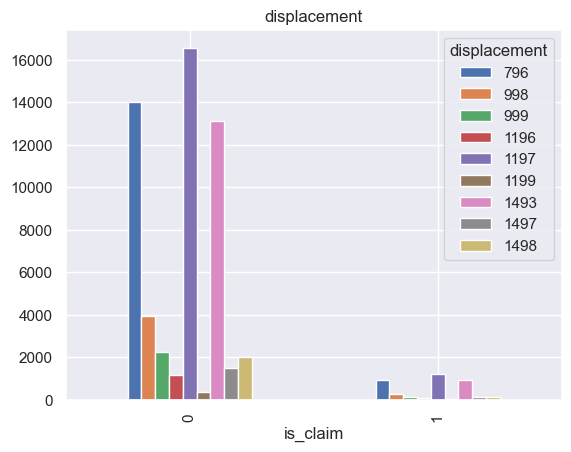

<Figure size 2500x200 with 0 Axes>

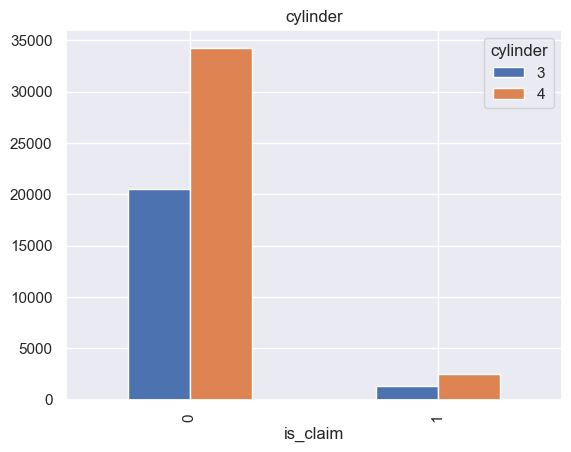

<Figure size 2500x200 with 0 Axes>

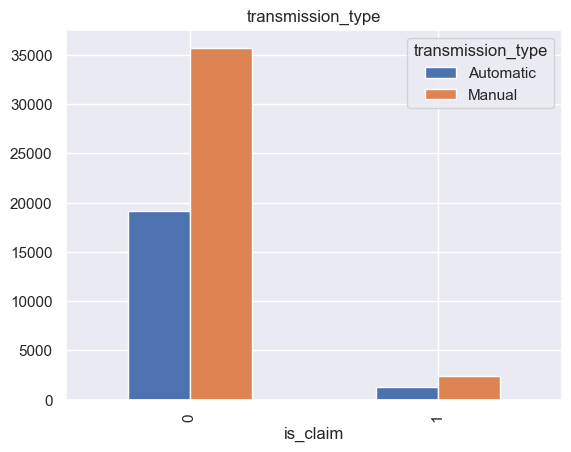

<Figure size 2500x200 with 0 Axes>

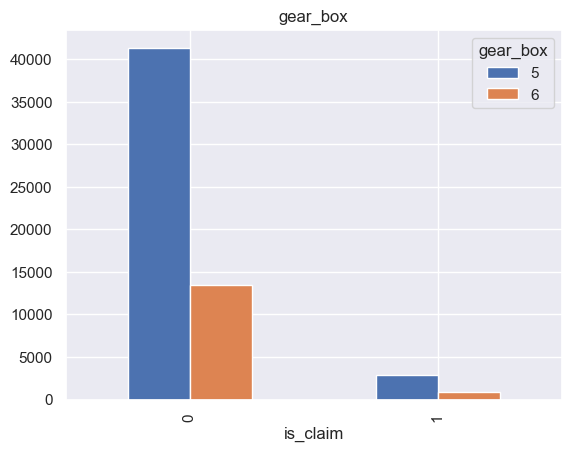

<Figure size 2500x200 with 0 Axes>

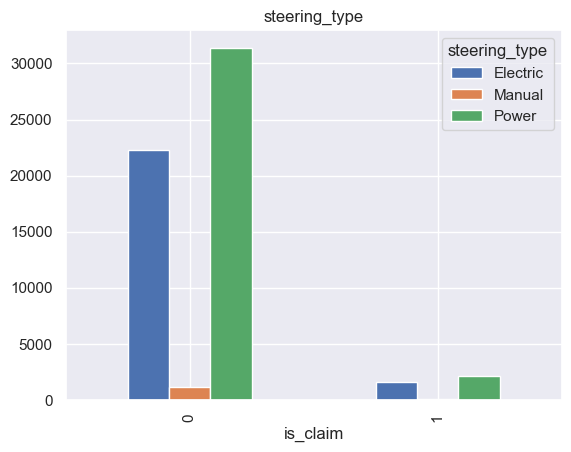

<Figure size 2500x200 with 0 Axes>

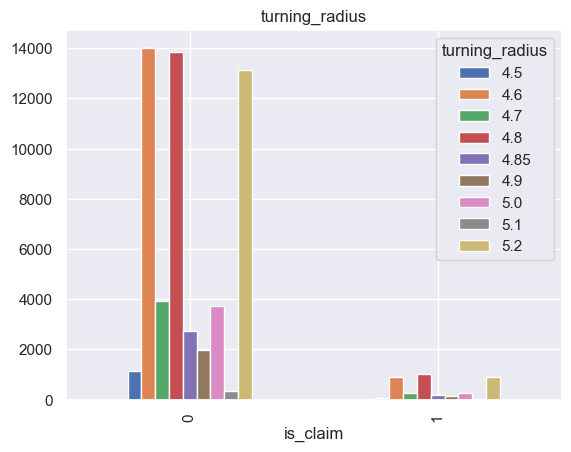

<Figure size 2500x200 with 0 Axes>

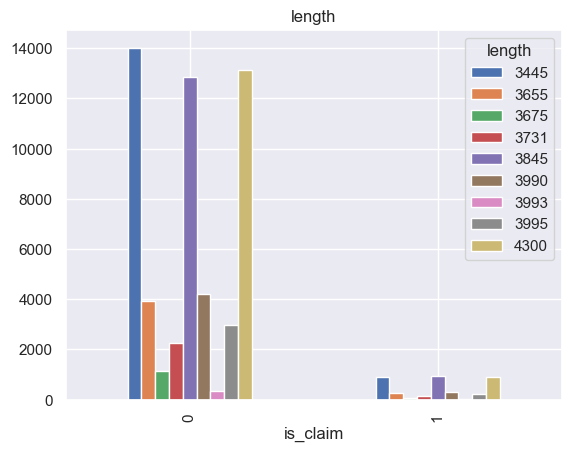

<Figure size 2500x200 with 0 Axes>

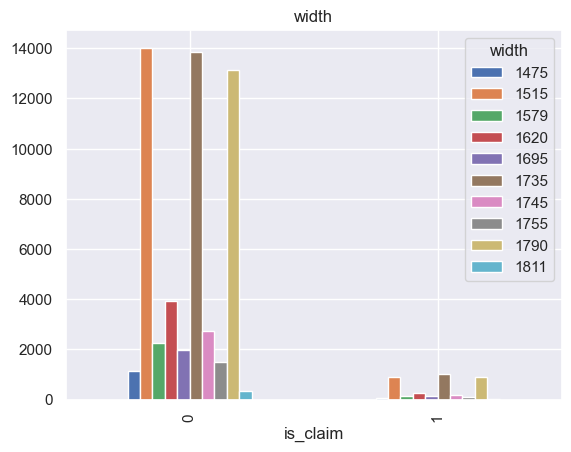

<Figure size 2500x200 with 0 Axes>

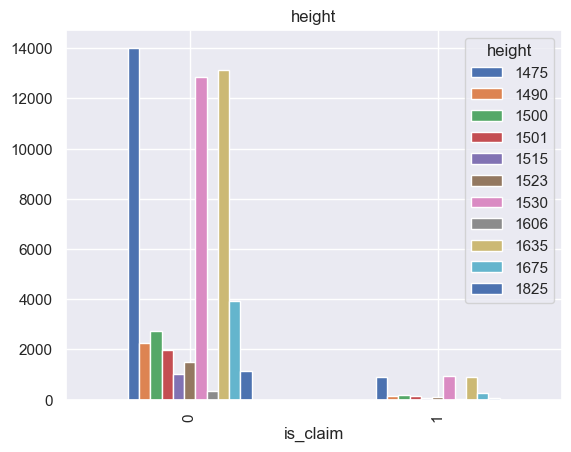

<Figure size 2500x200 with 0 Axes>

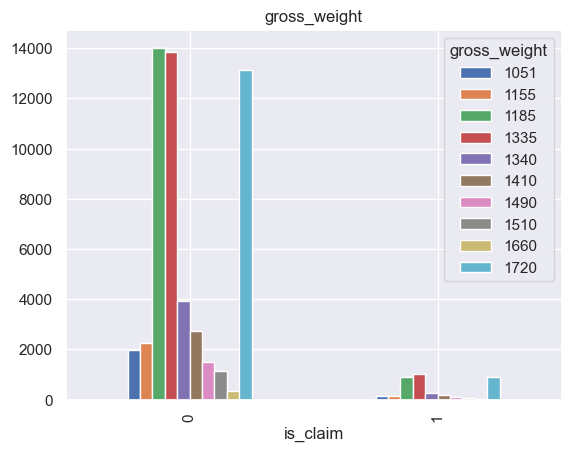

<Figure size 2500x200 with 0 Axes>

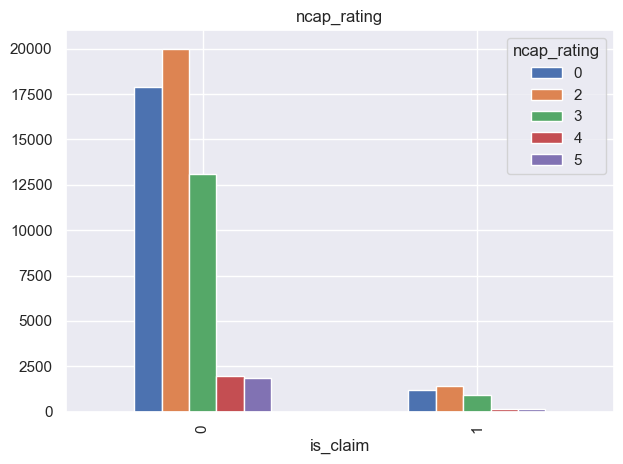

In [27]:
for i in  lls:
    #plt.subplots_adjust(left=None, bottom=1, right=None, top=10, wspace=None, hspace=1.3)
    #plt.subplot(row,col,iterator)
    plt.figure(figsize=(25,2))
    pd.crosstab(car_in.is_claim,car_in[i]).plot(kind='bar')
    plt.title(i)
#     iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

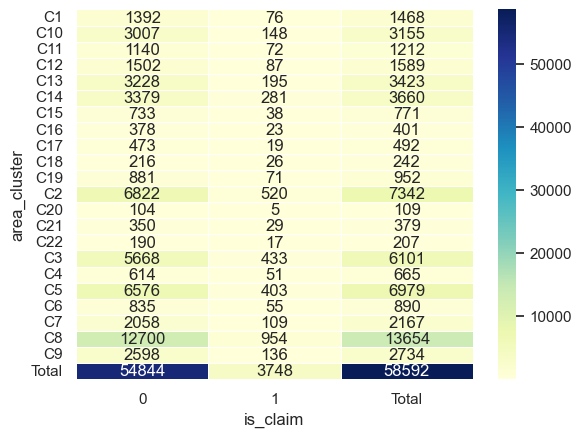

In [28]:
a=pd.crosstab(car_in['area_cluster'],car_in['is_claim'],margins=True,margins_name='Total')
sns.heatmap(a,annot=True,cmap='YlGnBu',fmt='d',cbar=True,linewidths=.5)
plt.show()

In [29]:
car_in.head(2)

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   

   population_density  make segment model fuel_type    max_torque  \
0                4990     1       A    M1       CNG  60Nm@3500rpm   
1               27003     1       A    M1       CNG  60Nm@3500rpm   

          max_power        engine_type  airbags is_esc is_adjustable_steering  \
0  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   
1  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   

  is_tpms is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0      No                Yes                No             Drum           796   
1      No                Yes                No             Drum           796   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0

In [30]:
car_in.shape

(58592, 43)

cleaning max_torque , max_power Variable-----

In [31]:
car_in[['torque','torque_RPM']] = car_in['max_torque'].str.split('@',expand=True)
car_in['torque']= car_in['torque'].str.replace(r'\D',"",regex=True).astype(int)
car_in['torque_RPM']= car_in['torque_RPM'].str.replace(r'\D',"",regex=True).astype(int)


In [32]:
car_in[['power','power_RPM']] = car_in['max_power'].str.split('@',expand=True)
car_in['power']= car_in['power'].str.replace(r'\D',"",regex=True).astype(int)
car_in['power_RPM']= car_in['power_RPM'].str.replace(r'\D',"",regex=True).astype(int)

In [33]:
car_in=car_in.drop(columns=['max_torque','max_power'])

LabelEncoding-----

In [34]:
le=LabelEncoder()

In [35]:
car_in["engine_type"]=le.fit_transform(car_in["engine_type"])
car_in["area_cluster"]=le.fit_transform(car_in["area_cluster"])
car_in["model"]=le.fit_transform(car_in["model"])

OneHotEncoding------

In [36]:
df=pd.get_dummies(data=car_in,columns=['fuel_type', 'airbags', 'is_esc', 'is_adjustable_steering','engine_type','transmission_type',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera','segment',
       'rear_brakes_type', 'cylinder',  'gear_box',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],drop_first=True)

In [37]:
df.head(2)

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231             0   
1       0.672619        0.02             0.375000            11   

   population_density  make  model  displacement  turning_radius  length  \
0                4990     1      0           796             4.6    3445   
1               27003     1      0           796             4.6    3445   

   width  height  gross_weight  is_claim  torque  torque_RPM  power  \
0   1515    1475          1185         0      60        3500   4036   
1   1515    1475          1185         0      60        3500   4036   

   power_RPM  fuel_type_Diesel  fuel_type_Petrol  airbags_2  airbags_6  \
0       6000             False             False       True      False   
1       6000             False             False       True      False   

   is_esc_Yes  is_adjustable_steering_Yes  engine_type_1  engine_type_2  \
0       False                       False          False          False   
1       False                       False          False          False   

   engine_type_3  engine_type_4  engine_type_5  engine_type_6  engine_type_7  \
0          False          False          False           True          False   
1          False          False          False           True          False   

   engine_type_8  engine_type_9  engine_type_10  transmission_type_Manual  \
0          False          False           False                      True   
1          False          False           False                      True   

   is_tpms_Yes  is_parking_sensors_Yes  is_parking_camera_Yes  segment_B1  \
0        False                    True                  False       False   
1        False                    True                  False       False   

   segment_B2  segment_C1  segment_C2  segment_Utility  rear_brakes_type_Drum  \
0       False       False       False            False                   True   
1       False       False       False            False                   True   

   cylinder_4  gear_box_6  steering_type_Manual  steering_type_Power  \
0       False       False                 False                 True   
1       False       False                 False                 True   

   is_front_fog_lights_Yes  is_rear_window_wiper_Yes  \
0                    False                     False   
1                    False                     False   

   is_rear_window_washer_Yes  is_rear_window_defogger_Yes  \
0                      False                        False   
1                      False                        False   

   is_brake_assist_Yes  is_power_door_locks_Yes  is_central_locking_Yes  \
0                False                    False                   False   
1                False                    False                   False   

   is_power_steering_Yes  is_driver_seat_height_adjustable_Yes  \
0                   True                                 False   
1                   True                                 False   

   is_day_night_rear_view_mirror_Yes  is_ecw_Yes  is_speed_alert_Yes  \
0                              False       False                True   
1                              False       False                True   

   ncap_rating_2  ncap_rating_3  ncap_rating_4  ncap_rating_5  
0          False          False          False          False  
1          False          False          False          False

In [38]:
df.shape

(58592, 64)

Model Building----

In [39]:
X=df.drop('is_claim',axis=1)
y=df['is_claim']

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_X=sc.fit_transform(X)
pd.DataFrame(sc_X)

0         1         2         3         4         5         6   \
0     -0.230283 -0.342447  1.422557 -1.915921 -0.783513 -0.671712 -1.457229   
1      0.148188 -0.871359 -0.768362 -0.299191  0.462975 -0.671712 -1.457229   
2      0.555022 -0.871359 -0.690115  0.288711 -0.835268 -0.671712 -1.457229   
3      0.697883  0.715378 -0.298879  0.435686  0.158275 -0.671712 -0.518945   
4     -0.035840  0.715378  1.344310  0.582662  0.900969  0.207812 -0.206184   
...         ...       ...       ...       ...       ...       ...       ...   
58587 -0.618508  1.067986  1.422557  1.023588 -0.568111  0.207812 -0.206184   
58588  1.420720 -0.871359  0.405345 -1.181044 -0.625076 -0.671712 -1.457229   
58589  1.330490 -0.342447 -0.142385  0.582662  0.900969 -0.671712 -1.457229   
58590  1.509251  1.244290  0.718333  1.023588 -0.568111 -0.671712  0.732100   
58591 -1.175453 -0.871359 -0.220632  1.023588 -0.568111  1.087337  0.106578   

             7         8         9         10        11        12        13  \
0     -1.375713 -1.108893 -1.301882 -1.402768 -0.983846 -0.942828 -0.670162   
1     -1.375713 -1.108893 -1.301882 -1.402768 -0.983846 -0.942828 -0.670162   
2     -1.375713 -1.108893 -1.301882 -1.402768 -0.983846 -0.942828 -0.670162   
3      0.130093 -0.231926  0.464026  0.559973 -0.481470 -0.236684 -0.390656   
4     -0.613422  0.645040 -0.383610 -0.831789 -0.795455 -1.084057 -0.506678   
...         ...       ...       ...       ...       ...       ...       ...   
58587 -0.613422  0.645040 -0.383610 -0.831789 -0.795455 -1.084057 -0.506678   
58588 -1.375713 -1.108893 -1.301882 -1.402768 -0.983846 -0.942828 -0.670162   
58589 -1.375713 -1.108893 -1.301882 -1.402768 -0.983846 -0.942828 -0.670162   
58590  0.130093 -0.231926 -0.017585  0.559973 -0.293078 -0.236684 -0.390656   
58591  1.241611  1.522007  1.443303  1.050658  1.025659  1.575752  0.331840   

             14        15        16        17        18        19        20  \
0     -0.045700 -1.394156  0.755743 -0.658710 -0.734482  0.670373 -0.638209   
1     -0.045700 -1.394156  0.755743 -0.658710 -0.734482  0.670373 -0.638209   
2     -0.045700 -1.394156  0.755743 -0.658710 -0.734482  0.670373 -0.638209   
3      1.194047  0.343811  0.755743 -0.658710  1.361504  0.670373 -0.638209   
4      0.987423 -0.430223  0.210345 -0.658710  1.361504  0.670373 -0.638209   
...         ...       ...       ...       ...       ...       ...       ...   
58587  0.987423 -0.430223  0.210345 -0.658710  1.361504  0.670373 -0.638209   
58588 -0.045700 -1.394156  0.755743 -0.658710 -0.734482  0.670373 -0.638209   
58589 -0.045700 -1.394156  0.755743 -0.658710 -0.734482  0.670373 -0.638209   
58590  1.194047  0.343811  0.755743 -0.658710  1.361504  0.670373 -0.638209   
58591 -1.078823  1.244565 -1.425846  1.518118 -0.734482 -1.491707  1.566884   

             21        22        23        24        25        26        27  \
0     -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
1     -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
2     -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
3      1.477895  0.805774 -0.229844  7.297387 -0.560793 -0.167446 -0.078956   
4     -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
...         ...       ...       ...       ...       ...       ...       ...   
58587 -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
58588 -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
58589 -0.676638 -1.241044 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
58590 -0.676638  0.805774 -0.229844 -0.137035 -0.560793 -0.167446 -0.078956   
58591  1.477895  0.805774 -0.229844 -0.137035  1.783191 -0.167446 -0.078956   

             28        29        30        31       32        33        34  \
0      1.708719 -0.145151 -0.554428 -0.276917 -0.19347  0.731153 -0.560793   
1      1.708719 -0.145151 -0.554428 -0.276917 -0.19347  0.731

In [41]:
correlation_check=car_in.select_dtypes(exclude=['object','category']).corr()
correlation_check

policy_tenure  age_of_car  age_of_policyholder  \
policy_tenure             1.000000    0.166312             0.143676   
age_of_car                0.166312    1.000000            -0.035427   
age_of_policyholder       0.143676   -0.035427             1.000000   
area_cluster              0.035666    0.049342             0.008967   
population_density       -0.100307   -0.062255             0.009669   
make                      0.086101    0.188122            -0.031989   
model                     0.200052    0.365221            -0.049087   
engine_type              -0.027675   -0.081370             0.005626   
airbags                   0.103981    0.209073            -0.008041   
displacement              0.194361    0.393208            -0.023764   
cylinder                  0.191185    0.379522             0.004183   
gear_box                  0.095305    0.201579            -0.003115   
turning_radius            0.166426    0.332716            -0.016764   
length                    0.190869    0.383177            -0.020138   
width                     0.213228    0.414104            -0.006135   
height                    0.119055    0.259156            -0.053930   
gross_weight              0.141027    0.302127            -0.007758   
ncap_rating               0.173280    0.348853            -0.031628   
is_claim                  0.078747   -0.028172             0.022435   
torque                    0.074645    0.139665            -0.074290   
torque_RPM                0.019754    0.017598             0.034706   
power                     0.207171    0.409716            -0.011833   
power_RPM                -0.101081   -0.212649             0.037502   

                     area_cluster  population_density      make     model  \
policy_tenure            0.035666           -0.100307  0.086101  0.200052   
age_of_car               0.049342           -0.062255  0.188122  0.365221   
age_of_policyholder      0.008967            0.009669 -0.031989 -0.049087   
area_cluster             1.000000           -0.315874  0.028358  0.057495   
population_density      -0.315874            1.000000 -0.035125 -0.082640   
make                     0.028358           -0.035125  1.000000  0.266116   
model                    0.057495           -0.082640  0.266116  1.000000   
engine_type             -0.006619            0.013916 -0.296041  0.217447   
airbags                  0.041899           -0.060359  0.501800  0.182974   
displacement             0.067858           -0.090983  0.753344  0.603161   
cylinder                 0.064070           -0.091591  0.410672  0.596718   
gear_box                 0.048550           -0.056640  0.632807  0.047277   
turning_radius           0.060992           -0.077501  0.753861  0.393267   
length                   0.068587           -0.091968  0.692365  0.523375   
width                    0.073746           -0.098156  0.511695  0.691110   
height                   0.054733           -0.065583  0.303274  0.337391   
gross_weight             0.063403           -0.077816  0.481408  0.237030   
ncap_rating              0.059964           -0.071150  0.792254  0.612275   
is_claim                 0.009425           -0.017808 -0.000456  0.006548   
torque                   0.029726           -0.034340  0.133690  0.519165   
torque_RPM              -0.001378           -0.000723 -0.772977  0.077804   
power                    0.072825           -0.096678  0.643805  0.599676   
power_RPM               -0.039437            0.049189 -0.928112 -0.304817   

                     engine_type   airbags  displacement  cylinder  gear_box  \
policy_tenure          -0.027675  0.103981      0.194361  0.191185  0.095305   
age_of_car             -0.081370  0.209073      0.393208  0.379522  0.201579   
age_of_policyholder     0.005626 -0.008041     -0.023764  0.004183 -0.003115   
area_cluster           -0.006619  0.041899      0.067858  0.064070  0.048550   
population_density      0.013916 -0.060359     -0.090983 -0.091591 

<Axes: >

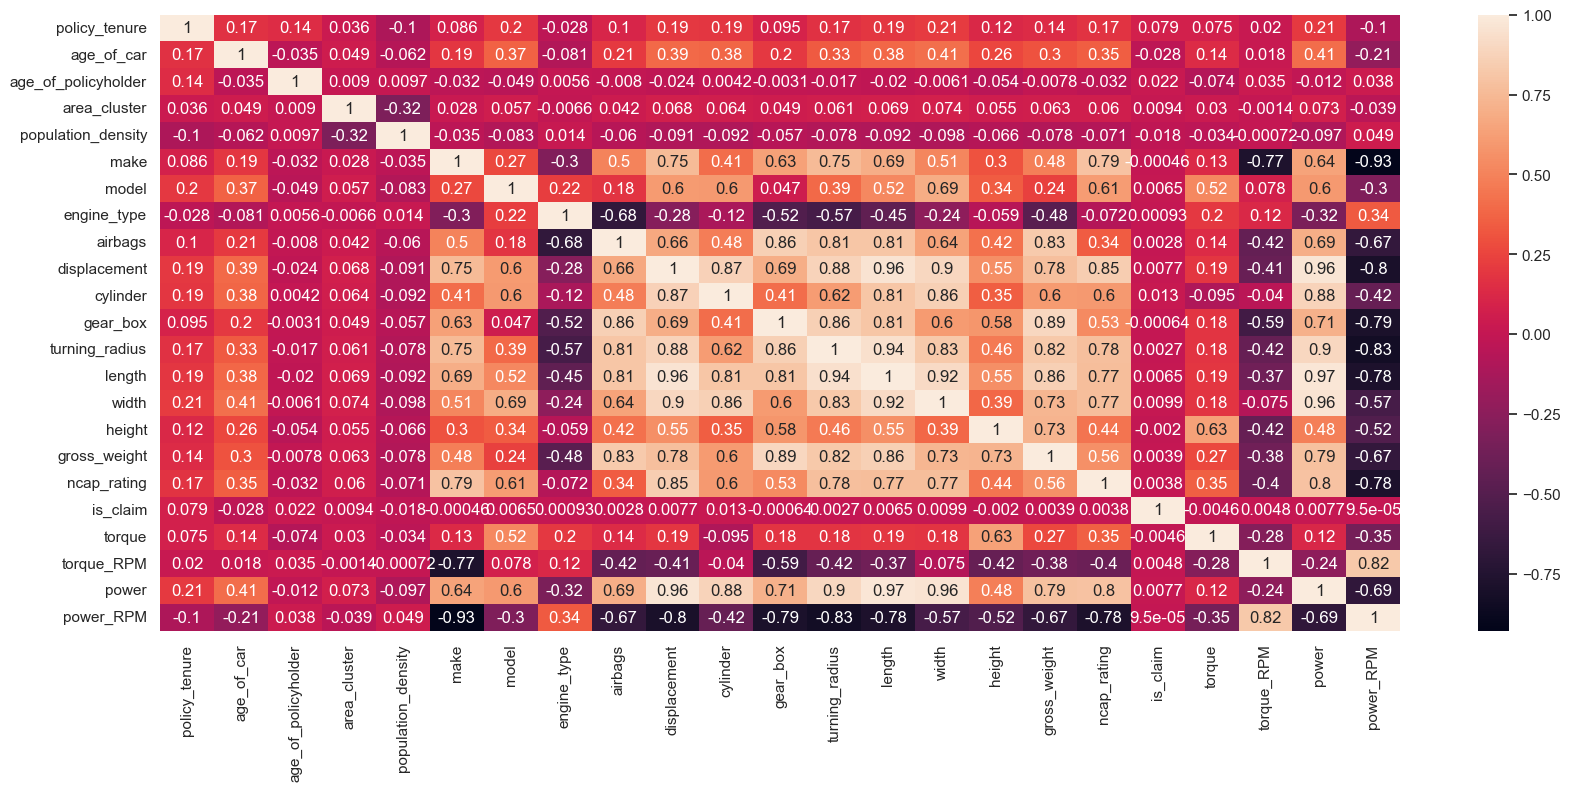

In [42]:
plt.figure(figsize=(20,8))
sns.heatmap(correlation_check,annot=True)

In [43]:
correlation_check['is_claim']

policy_tenure          0.078747
age_of_car            -0.028172
age_of_policyholder    0.022435
area_cluster           0.009425
population_density    -0.017808
make                  -0.000456
model                  0.006548
engine_type            0.000927
airbags                0.002789
displacement           0.007678
cylinder               0.013434
gear_box              -0.000635
turning_radius         0.002724
length                 0.006495
width                  0.009947
height                -0.002024
gross_weight           0.003894
ncap_rating            0.003800
is_claim               1.000000
torque                -0.004578
torque_RPM             0.004781
power                  0.007698
power_RPM              0.000095
Name: is_claim, dtype: float64

In [44]:
y.value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

Balancing Target Variable---

In [45]:
from imblearn.over_sampling import SMOTE

smt =  SMOTE(random_state=12,sampling_strategy=0.30)

X, y =  smt.fit_resample(X,y)

X.shape, X.shape

((71297, 63), (71297, 63))

# Feature Selection

# chi-squared Feature Selection (Categorical Fetature Selection)

In [46]:
x_chi=X.loc[:,['area_cluster','make','model','fuel_type_Diesel',
                'fuel_type_Petrol','airbags_2','airbags_6','is_esc_Yes',
                'is_adjustable_steering_Yes','engine_type_1','engine_type_2',
                'engine_type_3','engine_type_4','engine_type_5','engine_type_6',
                'engine_type_7','engine_type_8','engine_type_9','engine_type_10',
                'transmission_type_Manual','is_tpms_Yes','is_parking_sensors_Yes',
                'is_parking_camera_Yes','segment_B1','segment_B2','segment_C1',
                'segment_C2','segment_Utility','rear_brakes_type_Drum','cylinder_4',
                'gear_box_6','steering_type_Manual','steering_type_Power',
                'is_front_fog_lights_Yes','is_rear_window_wiper_Yes','is_rear_window_washer_Yes',
                'is_rear_window_defogger_Yes','is_brake_assist_Yes',
                'is_power_door_locks_Yes','is_central_locking_Yes','is_power_steering_Yes',
                'is_driver_seat_height_adjustable_Yes','is_day_night_rear_view_mirror_Yes',
                'is_ecw_Yes','is_speed_alert_Yes','ncap_rating_2',
                'ncap_rating_3','ncap_rating_4','ncap_rating_5']]

In [47]:
from sklearn.feature_selection import chi2
f_scr_p_value=chi2(x_chi,y)
print(f_scr_p_value)

(array([6.58560758e+01, 3.01954884e-02, 2.65171728e+01, 1.60332234e+00,
       1.01049442e+01, 3.96216624e-01, 1.88534957e+00, 8.77514229e-01,
       1.82346669e+01, 9.16162804e+00, 1.85992699e+01, 1.23424836e-02,
       1.10008639e+01, 1.12343942e+01, 6.52322025e+00, 1.76773254e-02,
       1.87188510e+01, 3.59531471e+00, 3.52370021e+00, 5.08044192e-01,
       1.23424836e-02, 8.28519868e-01, 1.38784444e-01, 3.59531471e+00,
       2.90078467e+01, 8.02943504e+00, 1.23424836e-02, 1.76773254e-02,
       6.70903476e-02, 1.74368462e+01, 6.30604249e-01, 1.76773254e-02,
       8.63890139e+00, 1.57827464e+01, 1.88534957e+00, 1.88534957e+00,
       1.80770792e+00, 9.71375804e+00, 3.63593962e+00, 3.63593962e+00,
       9.57414646e-02, 1.13692710e+01, 1.63335872e+01, 3.63593962e+00,
       2.01055140e-01, 5.17658784e+00, 1.23424836e-02, 3.52370021e+00,
       2.66420533e+00]), array([4.85082656e-16, 8.62047408e-01, 2.61205762e-07, 2.05433021e-01,
       1.47872071e-03, 5.29049646e-01, 1.69727378e-

# These are the important features based on lesser p_values

In [48]:
p_values=pd.Series(f_scr_p_value[1])
p_values.index=x_chi.columns
p_values.sort_values(ascending=True)[p_values.sort_values(ascending=True)<0.05]

area_cluster                            4.850827e-16
segment_B2                              7.208572e-08
model                                   2.612058e-07
engine_type_8                           1.514776e-05
engine_type_2                           1.612823e-05
is_adjustable_steering_Yes              1.952917e-05
cylinder_4                              2.970124e-05
is_day_night_rear_view_mirror_Yes       5.311417e-05
is_front_fog_lights_Yes                 7.104746e-05
is_driver_seat_height_adjustable_Yes    7.466918e-04
engine_type_5                           8.029531e-04
engine_type_4                           9.106943e-04
fuel_type_Petrol                        1.478721e-03
is_brake_assist_Yes                     1.828936e-03
engine_type_1                           2.471426e-03
steering_type_Power                     3.290598e-03
segment_C1                              4.602319e-03
engine_type_6                           1.064750e-02
ncap_rating_2                           2.2893

In [49]:
from sklearn.feature_selection import SelectKBest
fs=SelectKBest(score_func=chi2,k=15)

In [50]:
fs.fit(x_chi,y)

SelectKBest(k=15, score_func=<function chi2 at 0x000001AD4995DE40>)

In [51]:
selection=fs.get_support()

In [52]:
selection_=x_chi[x_chi.columns[selection]]

In [53]:
selection_.columns

Index(['area_cluster', 'model', 'fuel_type_Petrol',
       'is_adjustable_steering_Yes', 'engine_type_1', 'engine_type_2',
       'engine_type_4', 'engine_type_5', 'engine_type_8', 'segment_B2',
       'cylinder_4', 'is_front_fog_lights_Yes', 'is_brake_assist_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes'],
      dtype='object')

In [54]:
stats=X.loc[:,['age_of_car','population_density','age_of_policyholder','policy_tenure','area_cluster', 'model', 'fuel_type_Petrol',
       'is_adjustable_steering_Yes', 'engine_type_2', 'engine_type_5',
       'engine_type_8', 'engine_type_9', 'segment_B1', 'segment_B2',
       'cylinder_4', 'is_front_fog_lights_Yes', 'is_brake_assist_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes']]

# spliting data into train and test

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(stats,y,test_size=0.3,random_state=44)

In [56]:
def classification_model(MODEL, train):
    
    model = MODEL

    x_train, x_test, y_train, y_test, = train_test_split(stats, y, test_size = 0.3, random_state = 44)
    
    metrics = []
    Train_CV=[]
    Test_CV=[]


    model.fit(x_train, y_train)
        
    # Predicting on the train & test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculating the accuracy score
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    metrics.append(test_acc)
    

   
    # Calculating other metrics
    test_prec = precision_score(y_test, y_test_pred)
    metrics.append(test_prec)
    test_recall = recall_score(y_test, y_test_pred)
    metrics.append(test_recall)
    test_f1 = f1_score(y_test, y_test_pred)
    metrics.append(test_f1)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    metrics.append(test_roc_auc)
   
    
    
    # Checking whether the model is Overfitting or Underfitting
    variance = abs((train_acc * 100) - (test_acc * 100))
    model_check = ""
    
    print('\033[1m' + f"\t\t\t\t\tModel : {MODEL}" + '\033[0m\n')
    print('\033[1m' + "Accuracy Score" + '\033[0m\n')
    print(f"Train : {train_acc}")
    print(f"Test : {test_acc}")
    
    if (train_acc * 100 > 70) & (test_acc * 100 > 70) & (variance <= 15):
        model_check += "Low Bias, Low Variance"
    elif (train_acc * 100 < 70) & (test_acc * 100 < 70) & (variance <= 15):
        model_check += "High Bias, Low Variance"
    elif (train_acc * 100 < 70) & (test_acc * 100 < 70) & (variance > 15):
        model_check += "High Bias, High Variance"
    elif (train_acc * 100 > 70) & (test_acc * 100 > 70) & (variance > 15):
        model_check += "Low Bias, High Variance"
        
    print(f"\nModel Check : {model_check}")
    metrics.append(model_check)
    print('====='*20)
    
    #crossvalidation
        
    print('\n\n\033[1m' + "Cross Validation" + '\033[0m\n\n')
    CV_train_acc =cross_val_score(model, x_train, y_train, cv =10).mean()
    CV_test_acc =cross_val_score(model, x_test, y_test, cv =10).mean()
    Train_CV.append(CV_train_acc.round(2)*100)
    Test_CV.append(CV_test_acc.round(2)*100)
    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc.round(2)*100} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc.round(2)*100} %' )
    
    print('====='*20)
    
    # Checking the Classification Report
    
    print('\n\n\033[1m' + "Classification Report" + '\033[0m\n\n')
    print('\033[1m' + "Training Report" + '\033[0m\n')
    print(f"{classification_report(y_train, y_train_pred)}")
    print('\n\033[1m' + "Testing Report" + '\033[0m\n')
    print(f"{classification_report(y_test, y_test_pred)}")
    print('====='*20)
        
        
    # Plotting Confusion Matrix
    
    print('\n\n\033[1m' + "Confusion Matrix" + '\033[0m\n\n')
    print('\033[1m' + "Training Matrix" + '\033[0m\n')
    print(f"{confusion_matrix(y_train, y_train_pred)}")
    print('\n\033[1m' + "Testing Matrix" + '\033[0m\n')
    print(f'{confusion_matrix(y_test, y_test_pred)}')    
    
    return model, metrics

In [57]:
lr_model, lr_metrics = classification_model(LogisticRegression(),stats)

					Model : LogisticRegression()

Accuracy Score

Train : 0.7712745707015048
Test : 0.7644693782141188

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 77.0 %
▬ TestAccuracy(CrossValidation), 76.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     38492
           1       0.00      0.00      0.00     11415

    accuracy                           0.77     49907
   macro avg       0.39      0.50      0.44     49907
weighted avg       0.59      0.77      0.67     49907


Testing Report

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     16352
           1       0.00      0.00      0.00      5038

    accuracy                           0.76     21390
   macro avg       0.38      0.50      0.43     21390
weighted avg       0.58      0.76      0.66     21390



Confusion Matrix


Training Matrix



In [58]:
dt_model, dt_metrics = classification_model(DecisionTreeClassifier(), stats)

					Model : DecisionTreeClassifier()

Accuracy Score

Train : 1.0
Test : 0.8722300140252455

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 87.0 %
▬ TestAccuracy(CrossValidation), 85.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       1.00      1.00      1.00     11415

    accuracy                           1.00     49907
   macro avg       1.00      1.00      1.00     49907
weighted avg       1.00      1.00      1.00     49907


Testing Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     16352
           1       0.72      0.75      0.73      5038

    accuracy                           0.87     21390
   macro avg       0.82      0.83      0.82     21390
weighted avg       0.87      0.87      0.87     21390



Confusion Matrix


Training Matrix

[[38492    

In [59]:
rf_model, rf_metrics = classification_model(RandomForestClassifier(), sc_X)

					Model : RandomForestClassifier()

Accuracy Score

Train : 1.0
Test : 0.8805516596540439

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 88.0 %
▬ TestAccuracy(CrossValidation), 85.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38492
           1       1.00      1.00      1.00     11415

    accuracy                           1.00     49907
   macro avg       1.00      1.00      1.00     49907
weighted avg       1.00      1.00      1.00     49907


Testing Report

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     16352
           1       0.86      0.59      0.70      5038

    accuracy                           0.88     21390
   macro avg       0.87      0.78      0.81     21390
weighted avg       0.88      0.88      0.87     21390



Confusion Matrix


Training Matrix

[[38492    

In [60]:
ngd_model, ngd_metrics=classification_model(GaussianNB(),stats)

					Model : GaussianNB()

Accuracy Score

Train : 0.7712745707015048
Test : 0.7644693782141188

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 77.0 %
▬ TestAccuracy(CrossValidation), 76.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     38492
           1       0.00      0.00      0.00     11415

    accuracy                           0.77     49907
   macro avg       0.39      0.50      0.44     49907
weighted avg       0.59      0.77      0.67     49907


Testing Report

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     16352
           1       0.00      0.00      0.00      5038

    accuracy                           0.76     21390
   macro avg       0.38      0.50      0.43     21390
weighted avg       0.58      0.76      0.66     21390



Confusion Matrix


Training Matrix

[[38492 

In [61]:
grb_model, grb_metrics = classification_model(GradientBoostingClassifier(), sc_X)

					Model : GradientBoostingClassifier()

Accuracy Score

Train : 0.907207405774741
Test : 0.9018700327255726

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 90.0 %
▬ TestAccuracy(CrossValidation), 89.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     38492
           1       1.00      0.59      0.75     11415

    accuracy                           0.91     49907
   macro avg       0.95      0.80      0.84     49907
weighted avg       0.92      0.91      0.90     49907


Testing Report

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16352
           1       1.00      0.58      0.74      5038

    accuracy                           0.90     21390
   macro avg       0.94      0.79      0.84     21390
weighted avg       0.91      0.90      0.89     21390



Confusion Matrix


Training M

In [65]:
bb_model, bg_metrics = classification_model(BaggingClassifier(), sc_X)

					Model : BaggingClassifier()

Accuracy Score

Train : 0.9885186446791031
Test : 0.9132772323515661

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 92.0 %
▬ TestAccuracy(CrossValidation), 90.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     38492
           1       1.00      0.95      0.97     11415

    accuracy                           0.99     49907
   macro avg       0.99      0.98      0.98     49907
weighted avg       0.99      0.99      0.99     49907


Testing Report

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     16352
           1       0.92      0.69      0.79      5038

    accuracy                           0.91     21390
   macro avg       0.92      0.84      0.87     21390
weighted avg       0.91      0.91      0.91     21390



Confusion Matrix


Training Matrix

[

In [74]:
xgb_model, xgb_metrics = classification_model(XGBClassifier(),sc_X)

					Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score

Train : 0.9150620153485483
Test : 0.9045815801776531

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 91.0 %
▬ TestAccuracy(CrossValidation), 90.0 %


Classificatio

In [77]:
log=LogisticRegression()
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
bg=BaggingClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()


estimators=[('Logistic',log,),('RandomForest',rfc,),('DecisionTree',dt,),('Bagging',bg,),
            ('GradientBoosting',gb),('XGBClassifier',xgb)]

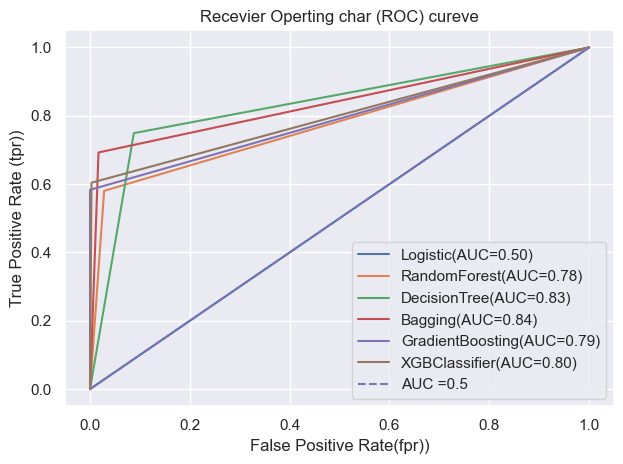

In [78]:
for model_name ,model in estimators:
    model.fit(x_train,y_train)
    y_pre_train=model.predict(x_train)
    y_pre_test=model.predict(x_test)
    
    
    fpr,tpr,_ = roc_curve(y_test,y_pre_test)
    roc_auc= auc(fpr,tpr)
    #plt.figure(figsize=(8,4))
    #plt.subplot(1,2,1)
    #sns.heatmap(cm_test,annot=True,cmap='rainbow')
    #plt.title(f'confusion_matrix_test{model_name}')
    
    #plt.subplot(1,2,2)
    plt.plot(fpr,tpr,label=f'{model_name}(AUC={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],'m--',label='AUC =0.5')
    
plt.xlabel('False Positive Rate(fpr))')
plt.ylabel('True Positive Rate (tpr))')
plt.title('Recevier Operting char (ROC) cureve')
plt.legend(loc='lower right')
plt.tight_layout()
    
plt.show()

In [79]:
pd.DataFrame([lr_metrics, dt_metrics, rf_metrics, xgb_metrics, grb_metrics, ngd_metrics,bg_metrics], 
             columns = ["Accuracy" ,"Precision", "Recall", "F1_Score", "ROC_AUC_Score", "Model Check",],
             index = ["Logistic Regression", "Decision Tree", "Random Forest","GradientBoosting","GaussianNB",'Bagging','XGB classifier'])

Accuracy  Precision    Recall  F1_Score  ROC_AUC_Score  \
Logistic Regression  0.764469   0.000000  0.000000  0.000000       0.500000   
Decision Tree        0.872230   0.720490  0.747519  0.733755       0.829086   
Random Forest        0.880552   0.863756  0.585153  0.697669       0.778358   
GradientBoosting     0.904582   0.984795  0.604208  0.748924       0.800667   
GaussianNB           0.901870   1.000000  0.583366  0.736868       0.791683   
Bagging              0.764469   0.000000  0.000000  0.000000       0.500000   
XGB classifier       0.913277   0.922485  0.689758  0.789324       0.835950   

                                Model Check  
Logistic Regression  Low Bias, Low Variance  
Decision Tree        Low Bias, Low Variance  
Random Forest        Low Bias, Low Variance  
GradientBoosting     Low Bias, Low Variance  
GaussianNB           Low Bias, Low Variance  
Bagging              Low Bias, Low Variance  
XGB classifier       Low Bias, Low Variance

# Feature Selection Using Mutual Information
mutual_info_classif used for classification problem and it computes mutual information between two discrete vsriables

In [103]:
mutual_info_features=mutual_info_classif(X,y)
mutual_info_features

array([1.99703904e-02, 2.82868684e-01, 3.11749850e-01, 4.68082116e-03,
       7.68987024e-03, 5.89602698e-03, 2.65067995e-03, 4.51638870e-03,
       7.75208090e-03, 6.04244796e-03, 8.07015583e-03, 8.27943183e-03,
       9.76633624e-03, 2.10034342e-03, 4.65060090e-03, 9.24005243e-03,
       7.57529280e-03, 2.91365769e-03, 2.84055659e-03, 8.46289709e-03,
       1.13785936e-03, 8.60017230e-04, 1.15835858e-02, 2.31616522e-03,
       8.21241050e-04, 1.99837300e-03, 1.08959201e-03, 0.00000000e+00,
       2.24905867e-03, 0.00000000e+00, 4.63133222e-03, 1.34744330e-03,
       1.26683754e-03, 8.71211336e-03, 3.47932797e-03, 1.27749708e-02,
       5.31963249e-03, 2.06554347e-03, 2.39467458e-03, 0.00000000e+00,
       1.70375719e-03, 1.86291322e-03, 9.51335960e-03, 9.30749644e-03,
       2.87663168e-03, 0.00000000e+00, 7.94711332e-03, 9.43959355e-03,
       1.17997334e-03, 3.09161929e-04, 3.86714518e-03, 8.26489425e-03,
       1.03967618e-02, 1.07589289e-02, 9.57308214e-03, 6.29049436e-03,
      

In [105]:
mutual_info_features=pd.Series(mutual_info_features)
mutual_info_features.index=X.columns
pd.DataFrame(mutual_info_features.sort_values(
ascending=False),columns=['Mutual_info_features']).head(20)

Mutual_info_features
age_of_policyholder                     0.311750
age_of_car                              0.282869
policy_tenure                           0.019970
is_parking_sensors_Yes                  0.012775
is_adjustable_steering_Yes              0.011584
is_speed_alert_Yes                      0.011249
is_central_locking_Yes                  0.010759
is_ecw_Yes                              0.010663
is_power_door_locks_Yes                 0.010397
gross_weight                            0.009766
is_power_steering_Yes                   0.009573
rear_brakes_type_Drum                   0.009513
is_front_fog_lights_Yes                 0.009440
cylinder_4                              0.009307
power                                   0.009240
transmission_type_Manual                0.008712
airbags_2                               0.008463
height                                  0.008279
is_brake_assist_Yes                     0.008265
width                                   0.008070

In [106]:
sel_best_fea=SelectKBest(mutual_info_classif,  k=10)
sel_best_fea.fit(X.fillna(0),y)
boolean_value=sel_best_fea.get_support()

In [107]:
X_selected_fea=X[X.columns[boolean_value]]

In [108]:
X_selected_fea.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'height',
       'rear_brakes_type_Drum', 'is_front_fog_lights_Yes',
       'is_power_door_locks_Yes', 'is_central_locking_Yes', 'is_ecw_Yes',
       'is_speed_alert_Yes'],
      dtype='object')

In [109]:
mut_stats=X.loc[:,['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'transmission_type_Manual', 'is_parking_sensors_Yes',
       'rear_brakes_type_Drum', 'steering_type_Power',
       'is_power_door_locks_Yes', 'is_central_locking_Yes', 'is_ecw_Yes']]

# Applying Mutual Information reults on model building

In [114]:
def classification_model(MODEL, train):
    
    model = MODEL

    x_train, x_test, y_train, y_test, = train_test_split(mut_stats, y, test_size = 0.3, random_state = 42)
    
    metrics = []
    Train_CV=[]
    Test_CV=[]


    model.fit(x_train, y_train)
        
    # Predicting on the train & test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculating the accuracy score
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    metrics.append(test_acc)
    

   
    # Calculating other metrics
    test_prec = precision_score(y_test, y_test_pred)
    metrics.append(test_prec)
    test_recall = recall_score(y_test, y_test_pred)
    metrics.append(test_recall)
    test_f1 = f1_score(y_test, y_test_pred)
    metrics.append(test_f1)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    metrics.append(test_roc_auc)
   
    
    
    # Checking whether the model is Overfitting or Underfitting
    variance = abs((train_acc * 100) - (test_acc * 100))
    model_check = ""
    
    print('\033[1m' + f"\t\t\t\t\tModel : {MODEL}" + '\033[0m\n')
    print('\033[1m' + "Accuracy Score" + '\033[0m\n')
    print(f"Train : {train_acc}")
    print(f"Test : {test_acc}")
    
    if (train_acc * 100 > 70) & (test_acc * 100 > 70) & (variance <= 15):
        model_check += "Low Bias, Low Variance"
    elif (train_acc * 100 < 70) & (test_acc * 100 < 70) & (variance <= 15):
        model_check += "High Bias, Low Variance"
    elif (train_acc * 100 < 70) & (test_acc * 100 < 70) & (variance > 15):
        model_check += "High Bias, High Variance"
    elif (train_acc * 100 > 70) & (test_acc * 100 > 70) & (variance > 15):
        model_check += "Low Bias, High Variance"
        
    print(f"\nModel Check : {model_check}")
    metrics.append(model_check)
    print('====='*20)
    
    #crossvalidation
        
    print('\n\n\033[1m' + "Cross Validation" + '\033[0m\n\n')
    CV_train_acc =cross_val_score(model, x_train, y_train, cv =10).mean()
    CV_test_acc =cross_val_score(model, x_test, y_test, cv =10).mean()
    Train_CV.append(CV_train_acc.round(2)*100)
    Test_CV.append(CV_test_acc.round(2)*100)
    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc.round(2)*100} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc.round(2)*100} %' )
    
    print('====='*20)
    
    # Checking the Classification Report
    
    print('\n\n\033[1m' + "Classification Report" + '\033[0m\n\n')
    print('\033[1m' + "Training Report" + '\033[0m\n')
    print(f"{classification_report(y_train, y_train_pred)}")
    print('\n\033[1m' + "Testing Report" + '\033[0m\n')
    print(f"{classification_report(y_test, y_test_pred)}")
    print('====='*20)
        
        
    # Plotting Confusion Matrix
    
    print('\n\n\033[1m' + "Confusion Matrix" + '\033[0m\n\n')
    print('\033[1m' + "Training Matrix" + '\033[0m\n')
    print(f"{confusion_matrix(y_train, y_train_pred)}")
    print('\n\033[1m' + "Testing Matrix" + '\033[0m\n')
    print(f'{confusion_matrix(y_test, y_test_pred)}')    
    
  
    return model, metrics

In [115]:
lr_model, lr_metrics = classification_model(LogisticRegression(), mut_stats)

					Model : LogisticRegression()

Accuracy Score

Train : 0.7698118500410764
Test : 0.7678821879382889

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 77.0 %
▬ TestAccuracy(CrossValidation), 77.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     38419
           1       0.00      0.00      0.00     11488

    accuracy                           0.77     49907
   macro avg       0.38      0.50      0.43     49907
weighted avg       0.59      0.77      0.67     49907


Testing Report

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     16425
           1       0.00      0.00      0.00      4965

    accuracy                           0.77     21390
   macro avg       0.38      0.50      0.43     21390
weighted avg       0.59      0.77      0.67     21390



Confusion Matrix


Training Matrix



In [116]:
rf_model, rf_metrics = classification_model(RandomForestClassifier(), mut_stats)

					Model : RandomForestClassifier()

Accuracy Score

Train : 0.9999599254613581
Test : 0.8854137447405329

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 88.0 %
▬ TestAccuracy(CrossValidation), 85.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38419
           1       1.00      1.00      1.00     11488

    accuracy                           1.00     49907
   macro avg       1.00      1.00      1.00     49907
weighted avg       1.00      1.00      1.00     49907


Testing Report

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     16425
           1       0.88      0.59      0.70      4965

    accuracy                           0.89     21390
   macro avg       0.88      0.78      0.82     21390
weighted avg       0.88      0.89      0.88     21390



Confusion Matrix


Training Matr

In [118]:
dt_model, dt_metrics = classification_model(DecisionTreeClassifier(), mut_stats)

					Model : DecisionTreeClassifier()

Accuracy Score

Train : 1.0
Test : 0.8717625058438523

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 87.0 %
▬ TestAccuracy(CrossValidation), 86.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38419
           1       1.00      1.00      1.00     11488

    accuracy                           1.00     49907
   macro avg       1.00      1.00      1.00     49907
weighted avg       1.00      1.00      1.00     49907


Testing Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     16425
           1       0.72      0.73      0.73      4965

    accuracy                           0.87     21390
   macro avg       0.82      0.82      0.82     21390
weighted avg       0.87      0.87      0.87     21390



Confusion Matrix


Training Matrix

[[38419    

In [119]:
ngd_model, ngd_metrics=classification_model(GaussianNB(),mut_stats)

					Model : GaussianNB()

Accuracy Score

Train : 0.7698118500410764
Test : 0.7678821879382889

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 77.0 %
▬ TestAccuracy(CrossValidation), 77.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     38419
           1       0.00      0.00      0.00     11488

    accuracy                           0.77     49907
   macro avg       0.38      0.50      0.43     49907
weighted avg       0.59      0.77      0.67     49907


Testing Report

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     16425
           1       0.00      0.00      0.00      4965

    accuracy                           0.77     21390
   macro avg       0.38      0.50      0.43     21390
weighted avg       0.59      0.77      0.67     21390



Confusion Matrix


Training Matrix

[[38419 

In [120]:
grb_model, grb_metrics = classification_model(GradientBoostingClassifier(), mut_stats)

					Model : GradientBoostingClassifier()

Accuracy Score

Train : 0.9021580139058649
Test : 0.8998129967274427

Model Check : Low Bias, Low Variance


Cross Validation


▬ Training Accuracy(CrossValidation), 90.0 %
▬ TestAccuracy(CrossValidation), 90.0 %


Classification Report


Training Report

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     38419
           1       1.00      0.57      0.73     11488

    accuracy                           0.90     49907
   macro avg       0.94      0.79      0.84     49907
weighted avg       0.91      0.90      0.89     49907


Testing Report

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     16425
           1       1.00      0.57      0.72      4965

    accuracy                           0.90     21390
   macro avg       0.94      0.78      0.83     21390
weighted avg       0.91      0.90      0.89     21390



Confusion Matrix


Training 

In [121]:
pd.DataFrame([lr_metrics, dt_metrics, rf_metrics, xgb_metrics, grb_metrics, ngd_metrics], 
             columns = ["Accuracy" ,"Precision", "Recall", "F1_Score", "ROC_AUC_Score", "Model Check",],
             index = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost","GradientBoosting","GaussianNB"])

Accuracy  Precision    Recall  F1_Score  ROC_AUC_Score  \
Logistic Regression  0.767882   0.000000  0.000000  0.000000       0.500000   
Decision Tree        0.871763   0.720349  0.731521  0.725892       0.822838   
Random Forest        0.885414   0.878614  0.587513  0.704164       0.781488   
XGBoost              0.904582   0.984795  0.604208  0.748924       0.800667   
GradientBoosting     0.899813   1.000000  0.568379  0.724798       0.784189   
GaussianNB           0.767882   0.000000  0.000000  0.000000       0.500000   

                                Model Check  
Logistic Regression  Low Bias, Low Variance  
Decision Tree        Low Bias, Low Variance  
Random Forest        Low Bias, Low Variance  
XGBoost              Low Bias, Low Variance  
GradientBoosting     Low Bias, Low Variance  
GaussianNB           Low Bias, Low Variance

# feature selection done using f_classifer technique--
f_classif is used for classification problems and computes ANOVA F-Value between  numerical features and target 

In [122]:
from sklearn.feature_selection import f_classif,SelectKBest
fs=SelectKBest(score_func=f_classif,k=10)

In [123]:
fs.fit(X,y)

SelectKBest()

In [124]:
fs.get_support()

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False])

In [125]:
fs.get_support().sum()

10

In [126]:
def list_ceil(x):
    return[math.ceil(i) for i in x]

In [127]:
print('P_Value :')
print(np.round(fs.pvalues_,4))
print('F Values :')
print(fs.scores_)

P_Value :
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.394e-01 5.000e-04
 2.000e-04 3.447e-01 4.900e-03 0.000e+00 1.730e-01 3.921e-01 4.120e-02
 7.020e-02 6.000e-04 8.615e-01 1.291e-01 1.000e-04 2.573e-01 1.030e-01
 2.578e-01 0.000e+00 1.900e-03 0.000e+00 8.986e-01 8.000e-04 8.000e-04
 3.100e-03 8.931e-01 0.000e+00 4.920e-02 5.580e-02 2.263e-01 8.986e-01
 0.000e+00 6.330e-01 4.920e-02 0.000e+00 3.400e-03 8.986e-01 8.931e-01
 5.960e-01 0.000e+00 3.609e-01 8.931e-01 0.000e+00 0.000e+00 1.030e-01
 1.030e-01 9.500e-02 0.000e+00 3.000e-04 3.000e-04 2.900e-02 0.000e+00
 0.000e+00 3.000e-04 0.000e+00 4.200e-03 8.986e-01 5.580e-02 9.680e-02]
F Values :
[1.40388037e+03 2.10876579e+02 1.00042582e+02 1.88779412e+01
 6.07994199e+01 4.10859922e-02 1.21887959e+01 1.34555238e+01
 8.92730869e-01 7.89971433e+00 1.94352546e+01 1.85649666e+00
 7.32464558e-01 4.16597537e+00 3.27789535e+00 1.18060355e+01
 3.04466434e-02 2.30278517e+00 1.56306792e+01 1.28327682e+00
 2.65780229e+00 1.28059565e+00 4.6

In [128]:
list_ceil(fs.scores_)

[1404,
 211,
 101,
 19,
 61,
 1,
 13,
 14,
 1,
 8,
 20,
 2,
 1,
 5,
 4,
 12,
 1,
 3,
 16,
 2,
 3,
 2,
 47,
 10,
 19,
 1,
 12,
 12,
 9,
 1,
 25,
 4,
 4,
 2,
 1,
 22,
 1,
 4,
 43,
 9,
 1,
 1,
 1,
 48,
 1,
 1,
 21,
 38,
 3,
 3,
 3,
 22,
 14,
 14,
 5,
 28,
 27,
 14,
 38,
 9,
 1,
 4,
 3]

In [129]:
fea_scr=pd.DataFrame(fs.scores_)
fea_pvalue=pd.DataFrame(np.round(fs.pvalues_,4))
fe=pd.DataFrame(X.columns)
fea_scr=pd.concat([fe,fea_scr,fea_pvalue],axis=1)
fea_scr.columns=['Input_Features','Score','P_Value']
print(fea_scr.nlargest(20,columns='Score'))

                          Input_Features        Score  P_Value
0                          policy_tenure  1403.880370   0.0000
1                             age_of_car   210.876579   0.0000
2                    age_of_policyholder   100.042582   0.0000
4                     population_density    60.799420   0.0000
43                            cylinder_4    47.422494   0.0000
22            is_adjustable_steering_Yes    46.953612   0.0000
38                            segment_B2    42.510941   0.0000
47               is_front_fog_lights_Yes    37.936100   0.0000
58                    is_speed_alert_Yes    37.058597   0.0000
55  is_driver_seat_height_adjustable_Yes    27.684771   0.0000
56     is_day_night_rear_view_mirror_Yes    26.543398   0.0000
30                         engine_type_8    24.586017   0.0000
51                   is_brake_assist_Yes    21.713001   0.0000
35                is_parking_sensors_Yes    21.193287   0.0000
46                   steering_type_Power    20.022211  

# Another Approach for feature selection is RandomForestRegressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X,y)
importances=rf.feature_importances_

In [131]:
plt.figure(figsize=(50,4))
forest_importances=pd.Series(importances,index=x.columns)
fig,ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title('Feature Importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

NameError: name 'x' is not defined

<Figure size 5000x400 with 0 Axes>